In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
def eval_numerical_gradient_array(f, x, df, h=1e-5):
  """
  Evaluate a numeric gradient for a function that accepts a numpy
  array and returns a numpy array.
  """
  grad = np.zeros_like(x)
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    ix = it.multi_index
    
    oldval = x[ix]
    x[ix] = oldval + h
    pos = f(x)
    x[ix] = oldval - h
    neg = f(x)
    x[ix] = oldval
    
    grad[ix] = np.sum((pos - neg) * df) / (2 * h)
    it.iternext()
   
  return grad

In [4]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
  """ 
  a naive implementation of numerical gradient of f at x 
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """ 

  fx = f(x) # evaluate function value at original point
  grad = np.zeros_like(x)
  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evalute f(x + h)
    x[ix] = oldval - h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # restore

    # compute the partial derivative with centered formula
    grad[ix] = (fxph - fxmh) / (2 * h) # the slope
    if verbose:
      print ix, grad[ix]
    it.iternext() # step to next dimension

  return grad

In [5]:
def affine_forward(x, w, b):
  """
  Computes the forward pass for an affine (fully-connected) layer.

  The input x has shape (N, d_1, ..., d_k) where x[i] is the ith input.
  We multiply this against a weight matrix of shape (D, M) where
  D = \prod_i d_i

  Inputs:
  x - Input data, of shape (N, d_1, ..., d_k)
  w - Weights, of shape (D, M)
  b - Biases, of shape (M,)
  
  Returns a tuple of:
  - out: output, of shape (N, M)
  - cache: (x, w, b)
  """
  out = None
  #############################################################################
  # TODO: Implement the affine forward pass. Store the result in out. You     #
  # will need to reshape the input into rows.                                 #
  #############################################################################
  N = x.shape[0]
  D = np.prod(x.shape[1:])
  x2 = np.reshape(x, (N, D))
  out = np.dot(x2, w) + b
  #############################################################################
  #                             END OF YOUR CODE                              #
  #############################################################################
  cache = (x, w, b)
  return out, cache

In [6]:
def affine_backward(dout, cache):
  """
  Computes the backward pass for an affine layer.

  Inputs:
  - dout: Upstream derivative, of shape (N, M)
  - cache: Tuple of:
    - x: Input data, of shape (N, d_1, ... d_k)
    - w: Weights, of shape (D, M)

  Returns a tuple of:
  - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
  - dw: Gradient with respect to w, of shape (D, M)
  - db: Gradient with respect to b, of shape (M,)
  """
  x, w, b = cache
  dx, dw, db = None, None, None
  #############################################################################
  # TODO: Implement the affine backward pass.                                 #
  #############################################################################
  N = x.shape[0]
  D = x.shape[1]
 

  dx = np.dot(dout, w.T) # N x D
  dw = np.dot(x.T, dout) # D x M
  db = np.dot(dout.T, np.ones(N)) # M x 1


  #############################################################################
  #                             END OF YOUR CODE                              #
  #############################################################################
  return dx, dw, db

In [7]:
x = np.random.randn(1, 3)
w = np.random.randn(3, 2)
b = np.random.randn(2)
dout = np.random.randn(1, 2)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

print dx_num, dx
# The error should be less than 1e-10
print 'Testing affine_backward function:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

[[-0.40366053  0.59182543 -1.63150193]] [[-0.40366053  0.59182543 -1.63150193]]
Testing affine_backward function:
dx error:  1.67689374932e-12
dw error:  4.40178060844e-12
db error:  2.27555866036e-12


In [8]:
def sigmoid_forward(z):
        sigmoidfn = 1.0 / (1.0 + np.exp(-z)) # sigmoid activation function
        return sigmoidfn
    
def sigmoid_backward(dout,fw_activation):
        return np.multiply(np.multiply(fw_activation,1-fw_activation),dout)

In [9]:
x = np.random.randn(1, 3)
w = np.random.randn(3, 2)
b = np.random.randn(2)
dout = np.random.randn(1, 2)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(affine_forward(x, w, b)[0]), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: sigmoid_forward(affine_forward(x, w, b)[0]), w, dout)
db_num = eval_numerical_gradient_array(lambda b: sigmoid_forward(affine_forward(x, w, b)[0]), b, dout)

y, cache = affine_forward(x, w, b)
sigout = sigmoid_forward(y)
douty = sigmoid_backward(dout,sigout)
dx, dw, db = affine_backward(douty, cache)

print dx_num, dx
# The error should be less than 1e-10
print 'Testing affine_backward function:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

[[ 0.07236163 -0.08360547 -0.14279187]] [[ 0.07236163 -0.08360547 -0.14279187]]
Testing affine_backward function:
dx error:  1.78191024954e-11
dw error:  2.75671945954e-11
db error:  1.50032844002e-11


In [10]:
def euclidean_sq_loss(z,t):
    #z is lower layer's activation, t is the target value
    m = z.shape[0] #number of training sample in a batch
    n = z.shape[1] #size of feature

    loss = 0.5* np.dot( z[0,:]-t[0,:],np.transpose(z[0,:]-t[0,:]) )
    dout = (z - t)
    
    return loss,dout

In [11]:
def piano_fw(x,w,b,t):
    loss,_ = euclidean_sq_loss(sigmoid_forward(affine_forward(x, w, b)[0]),t)
    return loss

In [12]:
x = np.random.randn(1, 3)
w = np.random.randn(3, 2)
b = np.random.randn(2)
t = np.array([[0,1]])

y, cache = affine_forward(x, w, b)
sigout = sigmoid_forward(y)
loss,dout = euclidean_sq_loss(sigout,t)
print loss, 0.5* (np.linalg.norm(sigout-t))**2

dw_num = eval_numerical_gradient(lambda w: piano_fw(x,w,b,t), w)
db_num = eval_numerical_gradient(lambda b: piano_fw(x,w,b,t), b)

print 'dw_num:',dw_num,'db_num:',db_num

douty = sigmoid_backward(dout,sigout)
dx, dw, db = affine_backward(douty, cache)
print dw,db
#print dx_num, dx
# The error should be less than 1e-10
#print 'Testing affine_backward function:'
#print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

0.677414232136 0.677414232136
dw_num: [[ 0.25698604 -0.06670627]
 [ 0.08044867 -0.02088219]
 [ 0.00999965 -0.00259563]] db_num: [ 0.1481155  -0.03844657]
[[ 0.25698604 -0.06670627]
 [ 0.08044867 -0.02088219]
 [ 0.00999965 -0.00259563]] [ 0.1481155  -0.03844657]
dw error:  6.39223606818e-10
db error:  3.09328096622e-11


In [13]:
class NeuralNet_Piano:
    #class variables
    # num_classes  is the size of the last affine activation
    # input_dim   is the size of input dimension
    # num_hidden_layers is how many hidden layers
    ## (constructor ) Dict model
    ## (constructor) num_layers is how many totol layers = hidden_layers + 2(Softmax cross entropy loss layer)
    ## (Forward) Dict input cache
    ## (Backward) Dict gradient cache 
    #class def
    # constructor to construct the neural network, given the hyper parameter
    # Forward
    # Backward
    # applyGrad
    def __init__(self,model_hyper):
        num_classes = model_hyper['num_classes']
        input_dim  = model_hyper['input_dim']
        self.num_hidden_layers = model_hyper['num_hidden_layers']
        self.num_layers = self.num_hidden_layers + 1
        layer_list = [None] * self.num_hidden_layers
        cur_layer_size = input_dim
        self.learnrate = model_hyper['learnrate']
        self.NN_model = []
        self.NN_grad = []
        self.NN_num_grad = []
        for hid_layer_iter in range(self.num_hidden_layers):  
            layer_model = {}
            next_layer_size = model_hyper['layer_sizes'][hid_layer_iter]
            layer_model['W'] = 0.9 * np.random.randn(cur_layer_size, next_layer_size)
            layer_model['b'] =0.9 * np.random.randn(next_layer_size)
            self.NN_model.append(layer_model)
            cur_layer_size = next_layer_size
        
        layer_model = {}   
        next_layer_size = num_classes
        layer_model['W'] = 0.9 * np.random.randn(cur_layer_size, next_layer_size)
        self.NN_model.append(layer_model)
        self.NN_cache=[]
        self.sigmoid_on = True
        for i in self.NN_model:
            print i['W'].shape
            if 'b' in i:
                print i['b'].shape
            print "__________________"
            
    def affine_backward(self,dout, cache):
        x = cache['x']
        w = cache['w']
        b = cache['b']
        #print x,w,b
        grad_cache = {}
        dx, dw, db = None, None, None
        N = x.shape[0]
        D = np.prod(x.shape[1:])
        x2 = np.reshape(x, (N, D))

        dx2 = np.dot(dout, w.T) # N x D
        dw = np.dot(x2.T, dout) # D x M
        db = np.dot(dout.T, np.ones(N)) # M x 1

        dx = np.reshape(dx2, x.shape)
        grad_cache['dx'] = dx
        grad_cache['dw'] = dw
        #print grad_cache['dw']
        grad_cache['db'] = db
        return grad_cache
    
    def affine_backward2(self,dout, cache):
        x = cache['x']
        w = cache['w']

        grad_cache = {}
        dx, dw = None, None
        N = x.shape[0]
        D = np.prod(x.shape[1:])
        x2 = np.reshape(x, (N, D))

        dx2 = np.dot(dout, w.T) # N x D
        dw = np.dot(x2.T, dout) # D x M       

        dx = np.reshape(dx2, x.shape)
        grad_cache['dx'] = dx
        grad_cache['dw'] = dw
 
        return grad_cache  

    def affine_forward(self,x, w, b): 
        cache = {}
        out = None
        N = x.shape[0]
        D = np.prod(x.shape[1:])
        x2 = np.reshape(x, (N, D))
        out = np.dot(x2, w) + b
        cache['x'] = x
        cache['w'] = w
        cache['b'] = b
        return out, cache    
    
    def affine_forward2(self,x, w): 
        out = None
        cache = {}
        N = x.shape[0]
        D = np.prod(x.shape[1:])
        x2 = np.reshape(x, (N, D))
        out = np.dot(x2, w) 
        cache['x'] = x
        cache['w'] = w
        return out, cache  

    def sigmoid_forward(self,z):
        sigmoidfn = 1.0 / (1.0 + np.exp(-z)) # sigmoid activation function
        return sigmoidfn
    
    def sigmoid_backward(self,dout,fw_activation):
        return np.multiply(np.multiply(fw_activation,1-fw_activation),dout)

    def euclidean_sq_loss(self,z,t):
        #z is lower layer's activation, t is the target value
        m = z.shape[0] #number of training sample in a batch
        n = z.shape[1] #size of feature
        #print z.shape, t.shape
        loss = 0.5* np.dot( z[0,:]-t[0,:],np.transpose(z[0,:]-t[0,:]) )
        dout = (z - t)
    
        return loss,dout
    
    def forward_train(self,x,y):
        activation = x
        first_time = True
        #print activation
        #print self.NN_model
        for i in self.NN_model:
            if 'b' in i:
                activation, cache = self.affine_forward(activation, i['W'], i['b'])
                self.NN_cache.append(cache)
                #print 'fw with b'
            else:
                if (self.sigmoid_on == True and first_time):
                    activation = self.sigmoid_forward(activation) 
                    #print activation
                    self.NN_cache.append(activation)
                    # 'fw sigmoid'
                    first_time = not first_time
                activation, cache = self.affine_forward2(activation, i['W'])
                self.NN_cache.append(cache)
                #print 'fw no b'

            loss,dz = self.euclidean_sq_loss(activation,y)
        #for i in self.NN_cache:
        #    print i['w'].shape,i['x'].shape
        #    if 'b' in i:
        #        print i['b'].shape
        #    print "__________________"   
        return loss,dz
    
    def forward_test(self,x):
        activation = x
        #print activation

        for i in self.NN_model:
            if 'b' in i:
                activation, cache = self.affine_forward(activation, i['W'], i['b'])
                self.NN_cache.append(cache)
            else:
                activation, cache = self.affine_forward2(activation, i['W'])
                self.NN_cache.append(cache)
 
        return self.sigmoid_forward(activation)
    
    def backward_train(self,dz):
        backgrad = dz
        first_time = True
        for i in reversed(self.NN_cache):
            #print '----i---',i
            if 'b' in i:
                #print backgrad
                grad_cache = self.affine_backward(backgrad,i)
                backgrad = grad_cache['dx']
                self.NN_grad.insert(0,grad_cache)
            else:
                if first_time:
                    #print 'first time no b'
                    grad_cache = self.affine_backward2(backgrad,i)
                    first_time = not first_time  
                    backgrad = grad_cache['dx']
                    continue
                    
                if (self.sigmoid_on == True and not first_time):
                    #print 'first sigmoid'
                    sigactivation = i
                    #print type(sigactivation), type(backgrad)
                    backgrad = self.sigmoid_backward(backgrad,sigactivation) 
                    self.NN_grad.insert(0,grad_cache)     

           
    def Apply_UpdateW(self):
        for i in range(self.num_layers):
            delta_W = -self.learnrate * self.NN_grad[i]['dw'] 
            #print delta_W
            self.NN_model[i]['W'] += delta_W
            #print 'Apply Update',i
            if 'db' in self.NN_grad[i] :
                delta_b = -self.learnrate * self.NN_grad[i]['db'] 
                self.NN_model[i]['b'] += delta_b
        self.reset_cache()

    def reset_cache(self):
        del(self.NN_cache[:])
        del(self.NN_grad[:]) 
        del(self.NN_num_grad[:]) 
        
    def get_grad(self):
        return self.NN_grad

    def get_W(self):
        return self.NN_model
    def cal_num_grad(self,w,h,x,y):
        grad = np.zeros_like(w)
        #print "w.shape",w.shape
        # iterate over all indexes in w
        it = np.nditer(w, flags=['multi_index'], op_flags=['readwrite'])
        
        while not it.finished:
            
            # evaluate function at x+h
            ix = it.multi_index
            oldval = w[ix]
            w[ix] = oldval + h # increment by h
            fxph,_ = self.forward_train(x,y) # evalute f(x + h)
            w[ix] = oldval - h
            fxmh,_ = self.forward_train(x,y) # evaluate f(x - h)
            w[ix] = oldval # restore
            # compute the partial derivative with centered formula
            grad[ix] = (fxph - fxmh) / (2 * h) # the slope
            it.iternext()           
        return grad
    def get_numerical_gradient(self):
        return self.NN_num_grad
    def set_numerical_gradient(self,x,y, h=0.0001):        
        for i in self.NN_model:
            num_grad_cache = {}
            num_grad_cache['dw'] = self.cal_num_grad(i['W'],h,x,y)
            
            if 'b' in i:
                num_grad_cache['db'] = self.cal_num_grad(i['b'],h,x,y)
               
            self.NN_num_grad.append(num_grad_cache)
            
        return self.NN_num_grad
    
    def check_grad_numgrad(self,x,y, h=0.0001,verbose = True):       
        self.set_numerical_gradient(x,y, h)  
        if verbose:
            for i in range(self.num_hidden_layers+1):
                print i,"th layer"
                if (rel_error(self.NN_grad[i]['dw'],self.NN_num_grad[i]['dw'])<1e-7):
                    print 'grad W correct',rel_error(self.NN_grad[i]['dw'],self.NN_num_grad[i]['dw'])
                else:
                    print self.NN_grad[i]['dw'].flatten()
                    print self.NN_num_grad[i]['dw'].flatten()
                    print rel_error(self.NN_grad[i]['dw'],self.NN_num_grad[i]['dw'])
                    print np.linalg.norm(self.NN_grad[i]['dw'].flatten() - self.NN_num_grad[i]['dw'].flatten())**2
                    print '==========='
                if 'db' in self.NN_grad[i] :
                    if (rel_error(self.NN_grad[i]['db'],self.NN_num_grad[i]['db'])<1e-7):
                        print 'grad b correct',rel_error(self.NN_grad[i]['db'],self.NN_num_grad[i]['db'])
                    else:
                        print self.NN_grad[i]['db'].flatten()
                        print self.NN_num_grad[i]['db'].flatten()
                        print rel_error(self.NN_grad[i]['db'],self.NN_num_grad[i]['db'])
                        print '==========='

In [14]:
model_hyper = {}
model_hyper['num_classes'] = 4
model_hyper['input_dim']=4
model_hyper['num_hidden_layers']=1
model_hyper['learnrate']=0.0001
layer_size = [None] * model_hyper['num_hidden_layers']
layer_size[0] = 4
#layer_size[1] = 4
#layer_size[2] = 5
#layer_size[3] = 6
model_hyper['layer_sizes'] = layer_size  

In [15]:
a_nn = NeuralNet_Piano(model_hyper)
w_org = a_nn.get_W()
w_org0 = w_org[0]['W'].copy()
num_inputs = 1
x = np.random.randn(num_inputs, model_hyper['input_dim'])
y = np.random.randint(model_hyper['num_classes'] , size=num_inputs)
y_onehot=np.zeros([num_inputs,model_hyper['num_classes']])
y_onehot[np.arange(num_inputs), y] = 1
y = y_onehot.astype(int)
print 'xshape',x.shape,y.shape
print y,'\n',y_onehot
print '----------'
loss,dz = a_nn.forward_train(x,y)
print 'dz shape',dz.shape
a_nn.backward_train(dz)
grad = a_nn.get_grad()
a_nn.check_grad_numgrad(x,y)
print y.dtype,x.dtype

(4, 4)
(4,)
__________________
(4, 4)
__________________
xshape (1, 4) (1, 4)
[[0 0 0 1]] 
[[ 0.  0.  0.  1.]]
----------
dz shape (1, 4)
0 th layer
grad W correct 1.57503597886e-10
grad b correct 5.08466522427e-10
1 th layer
grad W correct 3.09228015973e-12
int64 float64


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [16]:
w_after = a_nn.get_W()
w_after0= w_after[0]['W']
real_delta_w = w_org0 - w_after0
print 'w_after0:\n',w_after0
print 'w_org0:\n',w_org0
print 'real_delta_w:\n',real_delta_w
grad_w = a_nn.get_grad()
delta_w = -model_hyper['learnrate'] * grad_w [0]['dw'] 
print delta_w

w_after0:
[[-1.50009432  1.22554861 -0.30075459 -0.60588839]
 [-0.56087569 -0.45059268 -1.61138256 -0.47305152]
 [ 0.73198223 -1.10072376 -0.61201953  0.34242065]
 [ 0.38822554  0.93172931  0.08619323  0.13262095]]
w_org0:
[[-1.50009432  1.22554861 -0.30075459 -0.60588839]
 [-0.56087569 -0.45059268 -1.61138256 -0.47305152]
 [ 0.73198223 -1.10072376 -0.61201953  0.34242065]
 [ 0.38822554  0.93172931  0.08619323  0.13262095]]
real_delta_w:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[  8.05872718e-06   3.34681798e-05   1.13807351e-05  -2.30332313e-06]
 [ -2.18293283e-05  -9.06579746e-05  -3.08279208e-05   6.23919826e-06]
 [  8.27683932e-06   3.43740073e-05   1.16887585e-05  -2.36566333e-06]
 [  2.33696592e-05   9.70550234e-05   3.30032144e-05  -6.67945138e-06]]


In [17]:
num_grad = a_nn.get_numerical_gradient()

In [18]:
for i in a_nn.get_W():
    print i['W'].shape
for i in grad:
    print i['dw'].shape
for i in num_grad:
    print i['dw'].shape

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


In [19]:
print '=====num grad ====='
for i in range(model_hyper['num_hidden_layers']+1):
    print i,"th layer:W error",rel_error(grad[i]['dw'],num_grad[i]['dw'])    
    if 'db' in grad[i] :
        print i,"th layer:b error",rel_error(grad[i]['db'],num_grad[i]['db'])
    print "__________________"  

print grad[0]['dw'].flatten()
print num_grad[0]['dw'].flatten()
print "__________________"  


=====num grad =====
0 th layer:W error 1.57503597886e-10
0 th layer:b error 5.08466522427e-10
__________________
1 th layer:W error 3.09228015973e-12
__________________
[-0.08058727 -0.3346818  -0.11380735  0.02303323  0.21829328  0.90657975
  0.30827921 -0.06239198 -0.08276839 -0.34374007 -0.11688759  0.02365663
 -0.23369659 -0.97055023 -0.33003214  0.06679451]
[-0.08058727 -0.3346818  -0.11380735  0.02303323  0.21829328  0.90657975
  0.30827921 -0.06239198 -0.08276839 -0.34374007 -0.11688759  0.02365663
 -0.23369659 -0.97055023 -0.33003214  0.06679451]
__________________


In [20]:
a_nn.Apply_UpdateW()
print y.dtype,x.dtype
loss,dz = a_nn.forward_train(x,y)
print 'dz shape',dz.shape
a_nn.backward_train(dz)
grad = a_nn.get_grad()
a_nn.check_grad_numgrad(x,y)
num_grad = a_nn.get_numerical_gradient()
print '=====num grad ====='
for i in range(model_hyper['num_hidden_layers']+1):
    print i,"th layer:W error",rel_error(grad[i]['dw'],num_grad[i]['dw'])    
    if 'db' in grad[i] :
        print i,"th layer:b error",rel_error(grad[i]['db'],num_grad[i]['db'])
    print "__________________"  

print grad[0]['dw'].flatten()
print num_grad[0]['dw'].flatten()
print "__________________"  


int64 float64
dz shape (1, 4)
0 th layer
grad W correct 1.57123123099e-10
grad b correct 4.88733966318e-10
1 th layer
grad W correct 4.31663157593e-12
=====num grad =====
0 th layer:W error 1.57123123099e-10
0 th layer:b error 4.88733966318e-10
__________________
1 th layer:W error 4.31663157593e-12
__________________
[-0.08055448 -0.33459345 -0.11376609  0.02303831  0.21820444  0.90634044
  0.30816744 -0.06240574 -0.08273471 -0.34364934 -0.11684521  0.02366185
 -0.23360148 -0.97029404 -0.32991249  0.06680924]
[-0.08055448 -0.33459345 -0.11376609  0.02303831  0.21820444  0.90634044
  0.30816744 -0.06240574 -0.08273471 -0.34364934 -0.11684521  0.02366185
 -0.23360148 -0.97029404 -0.32991249  0.06680924]
__________________


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [21]:
w_after = a_nn.get_W()
w_after0= w_after[0]['W']
real_delta_w = w_org0 - w_after0

print 'w_after0:\n',w_after0
print 'w_org0:\n',w_org0
print 'real_delta_w:\n',real_delta_w
grad_w = a_nn.get_grad()
delta_w = model_hyper['learnrate'] * grad_w [0]['dw'] 
print 'delta_w:\n',delta_w

w_after0:
[[-1.50008626  1.22558208 -0.30074321 -0.6058907 ]
 [-0.56089752 -0.45068334 -1.61141338 -0.47304529]
 [ 0.73199051 -1.10068939 -0.61200785  0.34241828]
 [ 0.38824891  0.93182637  0.08622624  0.13261427]]
w_org0:
[[-1.50009432  1.22554861 -0.30075459 -0.60588839]
 [-0.56087569 -0.45059268 -1.61138256 -0.47305152]
 [ 0.73198223 -1.10072376 -0.61201953  0.34242065]
 [ 0.38822554  0.93172931  0.08619323  0.13262095]]
real_delta_w:
[[ -8.05872718e-06  -3.34681798e-05  -1.13807351e-05   2.30332313e-06]
 [  2.18293283e-05   9.06579746e-05   3.08279208e-05  -6.23919826e-06]
 [ -8.27683932e-06  -3.43740073e-05  -1.16887585e-05   2.36566333e-06]
 [ -2.33696592e-05  -9.70550234e-05  -3.30032144e-05   6.67945138e-06]]
delta_w:
[[ -8.05544755e-06  -3.34593455e-05  -1.13766089e-05   2.30383099e-06]
 [  2.18204445e-05   9.06340442e-05   3.08167437e-05  -6.24057395e-06]
 [ -8.27347092e-06  -3.43649338e-05  -1.16845206e-05   2.36618494e-06]
 [ -2.33601485e-05  -9.70294044e-05  -3.29912486e-0

In [22]:
w_org0 = w_after0.copy()
a_nn.Apply_UpdateW()
print y.dtype,x.dtype
loss,dz = a_nn.forward_train(x,y)
print 'dz shape',dz.shape
a_nn.backward_train(dz)
grad = a_nn.get_grad()
a_nn.check_grad_numgrad(x,y_onehot)
num_grad = a_nn.get_numerical_gradient()
print '=====num grad ====='
for i in range(model_hyper['num_hidden_layers']+1):
    print i,"th layer:W error",rel_error(grad[i]['dw'],num_grad[i]['dw'])    
    if 'db' in grad[i] :
        print i,"th layer:b error",rel_error(grad[i]['db'],num_grad[i]['db'])
    print "__________________"  

print grad[0]['dw'].flatten()
print num_grad[0]['dw'].flatten()
print "__________________"  


int64 float64
dz shape (1, 4)
0 th layer
grad W correct 1.41364802225e-10
grad b correct 4.92848159857e-10
1 th layer
grad W correct 5.357566958e-12
=====num grad =====
0 th layer:W error 1.41364802225e-10
0 th layer:b error 4.92848159857e-10
__________________
1 th layer:W error 5.357566958e-12
__________________
[-0.08052169 -0.33450513 -0.11372485  0.02304338  0.21811565  0.90610119
  0.30805572 -0.06241948 -0.08270104 -0.34355862 -0.11680285  0.02366706
 -0.23350642 -0.97003791 -0.32979288  0.06682395]
[-0.08052169 -0.33450513 -0.11372485  0.02304338  0.21811564  0.90610119
  0.30805572 -0.06241948 -0.08270104 -0.34355862 -0.11680285  0.02366706
 -0.23350642 -0.97003791 -0.32979288  0.06682395]
__________________


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [23]:
w_after = a_nn.get_W()
w_after0= w_after[0]['W']
real_delta_w = w_org0 - w_after0

print 'w_after0:\n',w_after0
print 'w_org0:\n',w_org0
print 'real_delta_w:\n',real_delta_w
grad_w = a_nn.get_grad()
delta_w = model_hyper['learnrate'] * grad_w [0]['dw'] 
print 'delta_w:\n',delta_w

w_after0:
[[-1.5000782   1.22561554 -0.30073183 -0.605893  ]
 [-0.56091934 -0.45077397 -1.6114442  -0.47303904]
 [ 0.73199878 -1.10065502 -0.61199616  0.34241592]
 [ 0.38827227  0.9319234   0.08625923  0.13260759]]
w_org0:
[[-1.50008626  1.22558208 -0.30074321 -0.6058907 ]
 [-0.56089752 -0.45068334 -1.61141338 -0.47304529]
 [ 0.73199051 -1.10068939 -0.61200785  0.34241828]
 [ 0.38824891  0.93182637  0.08622624  0.13261427]]
real_delta_w:
[[ -8.05544755e-06  -3.34593455e-05  -1.13766089e-05   2.30383099e-06]
 [  2.18204445e-05   9.06340442e-05   3.08167437e-05  -6.24057395e-06]
 [ -8.27347092e-06  -3.43649338e-05  -1.16845206e-05   2.36618494e-06]
 [ -2.33601485e-05  -9.70294044e-05  -3.29912486e-05   6.68092414e-06]]
delta_w:
[[ -8.05216934e-06  -3.34505130e-05  -1.13724845e-05   2.30433824e-06]
 [  2.18115645e-05   9.06101189e-05   3.08055717e-05  -6.24194798e-06]
 [ -8.27010398e-06  -3.43558622e-05  -1.16802846e-05   2.36670592e-06]
 [ -2.33506419e-05  -9.70037909e-05  -3.29792883e-0

In [24]:
num_train = 50000
y = np.random.randint(model_hyper['num_classes'] , size=num_train)
y_onehot=np.zeros([num_train,model_hyper['num_classes']])

y_onehot[np.arange(num_train), y] = 1.
x = 1.0*sigmoid_forward(y_onehot)
y = 1.0*sigmoid_forward(y_onehot)
model2_hyper = {}
model2_hyper['num_classes'] = 4
model2_hyper['input_dim']=4
model2_hyper['num_hidden_layers']=1
model2_hyper['learnrate']=0.1
layer_size = [None] * model2_hyper['num_hidden_layers']
layer_size[0] = 4
#layer_size[1] = 4
#layer_size[2] = 5
#layer_size[3] = 6
model2_hyper['layer_sizes'] = layer_size  

num_round = 5
batch_size =1
num_train_batch = num_train/batch_size
num_rec = num_train
cost_rec = np.zeros(num_rec*num_round,dtype=np.float)
a_nn2 = NeuralNet_Piano(model2_hyper)

for ii in range(num_round):
    for i in range(num_rec):
        th_batch = i%num_train_batch
        Xbatch = x[th_batch*batch_size:th_batch*batch_size+batch_size,:]
        Ybatch = y[th_batch*batch_size:th_batch*batch_size+batch_size].astype(int)  
        #print Xbatch
        loss,dz = a_nn2.forward_train(Xbatch,Ybatch)
        print loss
        #if i < num_rec:
        cost_rec[ii*num_train+i] = loss
        a_nn2.backward_train(dz)
        #iris_nn.check_grad_numgrad(Xbatch,Ybatch,0.0001,True)
        a_nn2.Apply_UpdateW()

(4, 4)
(4,)
__________________
(4, 4)
__________________
2.6285040806
1.58373370693
1.07649759135
0.808564013495
0.517040523908
0.455308225315
0.25322822602
0.204154953463
0.172050735601
0.0918294775542
0.0621461921012
0.0754075408655
0.0530497325397
0.0281982753225
0.0202908320477
0.0255638697298
0.0133108123349
0.00975701465572
0.00708539733878
0.0111281440054
0.00534149539388
0.00797258962474
0.00907767291216
0.00196286822333
0.00281586752197
0.00203856251102
0.00147609367838
0.00836869018571
0.000855636316228
0.00511018697828
0.00866839742405
0.0006686896699
0.000473772344655
0.00444910761264
0.00347195502571
0.00415400231922
0.00285242604966
0.00195984333673
0.0127301993636
0.00301538363435
0.00448803477502
0.0031585618952
5.88036281486e-05
0.00424317328398
0.00330905136183
4.76974668155e-05
0.010290146865
0.000245786266967
0.0077029449815
0.000709886409699
0.00516430503438
0.00283083993045
0.00201805161112
0.00563725307021
0.00760173079998
0.00582007543896
0.00399847584544
0.0092

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0.00185991456076
0.000988624602916
0.000716662927146
0.000462516065301
0.00368473481946
0.00265605585269
0.000418490805465
0.00173262796157
0.00456630317548
0.000473315819718
0.00184275686749
0.000202559216601
0.000148622436328
0.00118467827751
0.00153462409555
0.00486195085906
0.0034565913967
0.000777546175339
0.00286961121301
0.00204205651481
0.00145364399413
0.00474776678046
0.0017979322582
4.07846811892e-05
0.00167140518237
8.37216753928e-05
0.00130069747668
0.00313023199747
0.000558103525902
0.00053871096612
0.00289946233649
0.000970803653608
0.000270724950206
0.00291204755288
0.00308686179569
0.00294003995474
0.00044074908277
0.000664420426302
0.00212139666622
0.000285754524431
0.000892293277995
0.000647874888757
0.00047048095492
0.000341705870809
0.00251040791936
0.0017877988224
1.7869430817e-05
0.0012605122468
0.00089829854631
9.12406951946e-05
0.00538561988222
0.00140672158764
0.00194939133126
0.00386489473193
0.00019395437824
0.00205294231262
0.00146204279722
0.00187007871903

3.72957451379e-05
0.000761106944682
7.38649391599e-05
0.00184489048579
0.0003908631233
0.00120171843113
0.000883656478113
0.00251077358516
0.00106025348365
0.000780055606831
0.000573899782468
0.00298832713602
0.00216251774958
0.00156528503199
0.00166210054417
0.000218439667202
0.00141308471469
0.000681491136863
0.00124956797186
0.000905204834905
0.000655842040489
4.51100152696e-05
0.00117387537478
0.000736072107356
0.00110772227504
0.00219512601603
0.00117850331848
0.00202851535778
0.000488567384683
0.00130605450179
0.00189860828474
0.000159760916616
0.000118072539427
0.000543132411083
0.000402321273855
0.000298000708925
0.00178124137682
0.000132095087739
0.000490141010442
0.00141188788402
6.78163078138e-05
0.000638835521604
0.00047324709823
0.000350560965792
0.000243550223728
0.00138769382104
0.00102036780881
0.000750274264902
0.000551675920618
0.000405647971768
0.000298274817881
0.000219324216122
0.00382765856036
0.00277115746203
0.00200680105088
0.000189565515719
0.000139876825662
0

0.000147667234334
0.000570986508759
0.00146585203259
0.00017001345159
0.00117484407443
0.000839343923207
0.000164154701439
0.000213229482069
0.00107098238601
7.22795125332e-05
5.38816796761e-05
0.000684803742222
0.000487138544445
0.000641028094807
0.000504333464124
0.00112606297545
0.000833437764619
0.000616868242395
0.00132518279075
0.000969444349651
6.36070842597e-05
0.000665707873933
0.000487162626122
0.000643649937926
0.00123744101081
6.74631245099e-05
0.000351129789641
0.000813808133139
0.000595699041278
2.29652685544e-05
0.000539021175458
0.000401584642023
0.000711625161748
0.0004384879998
0.00105570892493
0.000781259183945
0.00113148059835
0.000257395054393
0.000729828290569
0.00118182837846
0.000240786067484
0.00098087032568
0.000718025189539
0.000438658149758
0.000662808780652
0.000485322938813
0.000355389759453
0.00165931781271
3.3270235799e-05
2.49364121219e-05
0.00051198376936
0.000593466562154
0.000434577813074
2.77716619297e-05
2.08303700602e-05
0.000344112069287
0.000252

2.19415016801e-05
0.000288946496215
0.000430986573218
0.000717025646322
0.00053305228224
0.000160047467148
0.000363083883322
0.000269723324844
0.000924476840482
0.000118329738708
0.000613542050071
0.000528594149602
0.000594801407928
0.000437997990965
0.00031100210639
0.000588853972714
0.000437790528801
0.000135275227214
0.00013914503334
0.000118861426012
0.000334390163205
0.000248209476027
0.000966243326604
0.000711591107599
0.000452003086763
0.000336050996856
0.000799453803446
9.36880621057e-05
0.000434237067987
0.00067659932818
6.32843333416e-05
0.000503938605623
0.000603235484052
0.000233317950939
6.20909361858e-05
0.000498688246666
0.000370723953544
0.000121170356499
8.96631423381e-05
0.000175877109935
0.000309585888612
7.60186863717e-05
0.00022849744023
0.000256214191584
0.000882459237992
0.000354555591492
0.000782215131364
8.10235530915e-05
0.000527039064885
0.00024214140991
4.50866756632e-05
0.000198800963789
0.00014833628306
0.000580322163761
3.7667257919e-05
0.000403758018617


0.000222698068778
1.42832394346e-05
1.07301265774e-05
0.000513148134848
1.79069520776e-05
1.3405513644e-05
0.000414323445358
0.000323237940544
0.000238961249633
0.000481395755209
0.000262909782397
0.00044612123658
0.000332514481702
0.000247841830876
0.00012233432461
9.04547191355e-05
6.68870950198e-05
4.94633440624e-05
0.000126861218637
4.8823385823e-05
0.000197773317871
0.000146674379522
0.000671403502136
6.47754666653e-05
4.79525087173e-05
0.000121499681879
0.000210176297103
0.000123957015655
5.77266687047e-05
0.000530850187989
0.000265608239726
0.000473885276507
0.000106105852449
0.000260205807978
6.72257582021e-05
0.000188742548068
0.000581732083483
7.92696028787e-05
0.000209422066691
5.56276924072e-05
4.10844858488e-05
0.000589114928712
0.000435462180707
0.000317118895408
0.00040566641397
0.000127501869072
9.50001516103e-05
0.000270795913825
9.36899527963e-05
0.000232136611451
0.00017260576281
6.40594830117e-05
0.000132542012168
0.000664514642938
7.24804452684e-05
0.00016951526536

8.28978773511e-05
0.000167770963572
0.000347974039571
8.18676475465e-05
6.08173137878e-05
5.09557735284e-05
5.47167115516e-05
0.000313616464843
0.000232148926072
0.000285156276158
8.33753820426e-05
0.000197379113311
0.000146839829368
0.000109248455349
0.000421676923546
0.000135304186332
8.36159471541e-05
0.000124812680366
9.29929590757e-05
0.000111731616839
0.000383496133311
0.00015053832341
7.13355003156e-05
0.00013602077327
7.75823359255e-05
0.000125843487735
7.88875644534e-05
9.50519616857e-05
0.000441555647273
6.25467575497e-05
7.8568008755e-05
0.000318865902112
2.86752123304e-05
0.000221149723823
0.000163780810404
0.000329084530629
0.000178759792795
1.62984177645e-05
0.00030824499554
0.000122308543991
9.10111023079e-05
0.000192380427438
5.93351363449e-05
6.0246932783e-05
4.52673291304e-05
3.40124984388e-05
0.000254112840657
0.000254755131351
2.82696126507e-05
2.12069741435e-05
0.000224125616245
0.000166950249737
5.72034514094e-05
4.28710375206e-05
8.28528674023e-05
3.9260186439e-0

0.000126263027006
6.50928508721e-05
4.81477075836e-05
0.000235284105237
5.36473372107e-05
2.96105691649e-05
4.56449555162e-05
0.000200534485119
1.64102829359e-05
0.000141564327168
9.14624559099e-06
8.84338119278e-05
6.60996686667e-05
4.94094969663e-05
3.69362054466e-05
0.0001995482524
1.75938555046e-05
1.32276809946e-05
6.20001155053e-05
0.000159270492051
1.01984768919e-05
0.000216049417947
0.00014996022336
0.000111128610751
9.93792049863e-06
8.48803235558e-05
6.28991448103e-05
1.72511541934e-05
1.29408433224e-05
9.70817014971e-06
6.4651276047e-05
4.79008671005e-05
0.000180977135752
5.86064107566e-05
4.33988842604e-05
2.50412804668e-05
3.94608970229e-05
0.000351043007365
5.89487736146e-05
0.000294460936781
1.54262853629e-05
8.05182459565e-05
0.000145904289145
1.06582188729e-05
8.5768034837e-05
0.00025846092308
0.000192803240797
0.000138356227996
0.000102598838135
1.65150281091e-05
0.000221550154003
1.6872276544e-05
1.25541870132e-05
9.82386499051e-05
7.31999006982e-05
5.45480440839e-05

5.1063406356e-05
6.17935889022e-05
4.59696577859e-05
5.2643945382e-05
4.59319152386e-05
5.13103087425e-05
4.6051147758e-05
4.80498618973e-05
0.000209532570116
4.21489945135e-05
3.01404461268e-05
2.26555963883e-05
1.70299359893e-05
9.32263944727e-05
3.87721997974e-05
0.000164724959193
0.000122177056745
5.73821642882e-05
1.17461441706e-05
0.00011796197308
8.77830969294e-05
6.53301810467e-05
4.24021335311e-05
3.77379077927e-05
3.27433163382e-05
3.08797210955e-05
2.74907647118e-05
0.000170687301822
0.000126537807963
9.68050064341e-06
5.22283545146e-05
1.03964919377e-05
0.000104006048039
6.03400498178e-05
8.37788190379e-06
4.82075944326e-05
3.60190292528e-05
0.000123117205264
9.1345825274e-05
0.000168130709183
3.7937158375e-05
0.000138978509391
0.000112960240991
2.05704962822e-05
1.54500641585e-05
0.000100655662099
0.00013781666441
1.31982106714e-05
5.65535161992e-05
1.20004000575e-05
0.000108982083463
0.000132711526576
9.84576546289e-05
7.18734219856e-05
0.000121191341778
4.72577683945e-05

3.39490431301e-05
1.74198602805e-05
1.30005065697e-05
9.70373659375e-06
7.02941486911e-05
0.000111136474417
7.70576059199e-06
6.35185837919e-05
5.72981213161e-05
5.97297901171e-05
5.5646993016e-05
0.000102411757386
7.36035603377e-05
9.32770616278e-05
6.95156905871e-05
4.19275944527e-05
9.89753510383e-05
6.96495056022e-05
3.96438076374e-05
2.92814777784e-05
2.16291600028e-05
2.23014695654e-05
1.84195969483e-05
6.42096812844e-05
4.75321349434e-05
0.000142146853235
2.75676089094e-05
2.13070145989e-05
0.0001047366806
1.04761914902e-05
7.47399241163e-05
5.5422342355e-05
0.000111342316419
8.30178983165e-05
1.48987935466e-05
6.7656239702e-05
4.3691707324e-05
9.91556970275e-05
6.81100559336e-05
9.13797323606e-05
6.78387089035e-05
8.73586461369e-05
6.89544318084e-05
5.119478567e-05
0.000102198977717
6.50075547183e-05
7.07118047458e-05
5.2735580766e-05
2.69503310551e-05
4.65734641022e-05
2.76707038592e-05
2.06748348513e-05
9.47608859514e-05
6.76987323417e-05
1.73745176207e-05
5.73318481541e-05
4

4.26423716562e-05
7.62601420522e-05
3.45719229166e-05
2.55524454067e-05
1.8887512385e-05
1.39621265274e-05
8.53085084155e-05
1.03466185639e-05
6.0468027048e-05
4.48710867698e-05
3.33008893911e-05
9.0999583598e-05
3.59839776612e-05
7.94229609001e-05
1.51303005926e-05
4.35837548507e-05
1.6180793305e-05
3.7690168754e-05
3.55275659126e-05
8.08335517658e-05
4.19247069127e-05
1.64780172789e-05
3.65393530711e-05
1.78469567729e-05
3.28816113802e-05
8.46114610575e-05
6.28319480682e-05
4.66589254325e-05
6.21225871469e-05
1.39025826414e-05
4.44937788413e-05
8.78417151781e-06
5.21636811512e-05
6.40651583611e-05
4.75628326057e-05
4.70165885848e-05
4.37232145336e-05
3.24375303357e-05
1.00624954867e-05
8.1918774861e-05
4.35243964633e-05
3.22865899602e-05
5.51795554177e-05
6.72741536066e-05
3.09589576698e-05
2.29205092627e-05
5.07376831092e-05
3.76245396309e-05
8.76528714111e-05
3.87153436406e-05
2.96226818283e-05
1.79278979556e-05
3.65742126689e-05
2.47977940388e-05
1.82684939265e-05
3.46310365185e-0

2.52273753665e-05
3.8093688478e-05
1.09592133879e-05
3.21120360156e-05
6.25854776663e-05
2.75409886865e-05
2.03402999289e-05
1.50232973179e-05
6.30965423607e-05
4.44300966717e-05
5.41288656245e-05
4.01522850331e-05
4.98090519307e-05
3.05464049299e-05
2.2574466834e-05
9.31239879905e-06
7.00257523177e-06
1.81956625087e-05
5.37199879477e-05
5.11527727623e-05
2.06056693851e-05
7.9639159549e-06
4.20115852445e-05
1.80860549967e-05
3.37345910293e-05
6.93922058064e-05
5.14859110298e-05
4.08320413527e-05
4.71236052004e-05
3.49869479665e-05
9.9786405203e-06
3.6782228582e-05
2.72765175937e-05
4.09029881299e-05
5.48613737923e-05
7.87812049767e-06
4.32920212269e-05
3.22000986945e-05
5.54140136882e-05
4.1148824523e-05
9.86545727266e-06
4.46130691896e-05
3.32541158577e-05
2.47886566924e-05
3.57810424234e-05
2.06137633518e-05
1.94141267029e-05
2.6812669053e-05
1.33310505264e-05
1.00018009403e-05
5.81776572226e-05
5.44158204579e-06
4.06643595914e-06
2.50116699776e-05
4.81117399253e-05
2.52466900363e-05

2.82600028788e-05
2.99112721753e-05
1.0938686467e-05
8.1023831559e-06
2.89862533243e-05
3.10760742409e-05
7.02297568086e-06
5.23235671565e-06
3.89887999552e-06
2.9056840691e-06
3.26642977065e-05
3.68813622763e-05
2.50614224536e-05
3.18593560809e-05
4.01888772584e-06
2.44894895941e-05
1.81438975187e-05
6.09001804103e-06
1.54132682696e-05
6.62892539892e-06
5.07340202613e-05
1.88944615488e-05
6.60780376238e-06
4.35466185043e-05
2.17024699799e-05
3.86392251112e-05
2.88161303889e-05
3.2408805014e-05
2.39075268749e-05
1.76371759274e-05
2.59655593683e-05
1.56430764789e-05
4.82862935259e-05
3.57944072229e-05
6.28038025757e-06
2.67274784848e-05
5.45644013129e-06
3.9424389641e-05
2.93243549895e-05
3.25702776718e-05
2.8137763721e-05
2.84453262971e-05
2.11425976318e-05
2.39670794549e-05
1.81694632591e-05
2.0508967092e-05
1.16279027479e-05
1.95009675655e-05
1.4422104734e-05
1.06673131544e-05
5.98971992492e-05
4.44848021431e-05
1.08134107468e-05
3.18121894851e-05
2.89827073394e-05
2.82429222405e-05


1.45494057602e-05
1.07284009823e-05
7.01217924224e-06
5.25736314674e-06
2.0809807706e-05
1.54831032535e-05
3.06227097841e-06
2.30543707372e-06
2.06048433481e-05
2.60432280779e-06
3.75360608796e-05
1.56671046055e-05
1.16120956245e-05
2.75864789046e-06
2.58935164185e-05
1.91208461133e-05
3.42846464866e-05
1.73023940297e-05
2.62915338188e-05
1.42934233335e-05
4.59433572904e-06
3.45014371652e-06
2.60756710353e-05
1.46016221492e-05
2.78663213877e-05
2.56363218484e-05
2.37598180933e-05
5.70773217878e-06
2.23947217164e-05
4.58306998352e-06
2.44971723213e-05
1.93649820942e-05
1.97414203901e-05
1.46252103101e-05
1.86368247466e-05
3.27520862461e-05
6.04851598769e-06
1.53299345935e-05
2.06380018142e-05
6.143814267e-06
1.73873516473e-05
3.15909705836e-05
5.77940170368e-06
1.68358454642e-05
2.61384380902e-05
1.93652818362e-05
4.51038710401e-06
3.36030090466e-06
1.63862046419e-05
1.21281229038e-05
2.5110738584e-05
3.33028314832e-05
1.85027903591e-05
3.63037111618e-06
1.34991768292e-05
2.39882058284e

1.97326245737e-05
1.17259126666e-05
1.66185361395e-05
2.32655850952e-05
1.44035378981e-05
1.97614136255e-05
1.68911826324e-05
1.50236730137e-05
1.94570520546e-05
1.64204747232e-05
4.83705176062e-06
1.67344301169e-05
5.1230556363e-06
1.89014985306e-05
1.48232798861e-05
3.28486759637e-06
1.69472054109e-05
3.05878187509e-06
2.2805070954e-06
1.70050647939e-06
1.49898564121e-05
2.2519876699e-06
1.67777158702e-06
2.5392887984e-05
1.88213838293e-05
1.39521638117e-05
1.97183972151e-05
1.87353283425e-05
3.85899346138e-06
1.69171741095e-05
3.41106723806e-06
2.53090489444e-06
2.04318579501e-05
1.49547903189e-05
2.54554268515e-06
1.89975971804e-06
1.93096146592e-05
2.89579482697e-06
1.18705293137e-05
2.0418542165e-06
1.53138956681e-06
2.18109715588e-05
1.61243726504e-05
1.44430287757e-05
2.34459228476e-05
1.18763817808e-05
1.89660856291e-05
3.87806192814e-06
2.8983363415e-06
1.70163714242e-05
1.25693085131e-05
5.72074965303e-06
2.2920587829e-05
1.700056551e-05
4.29188076865e-06
1.59149470631e-05
1

2.12576039885e-06
1.39166898464e-05
1.02758435391e-05
3.03599312517e-06
2.26456536309e-06
1.09067148429e-05
8.08241889123e-06
1.43567322976e-05
8.4912863768e-06
1.99200845877e-06
1.34718313649e-05
2.20402470252e-05
9.87341667532e-06
1.30186541772e-05
1.83553991245e-05
1.35870116718e-05
1.24967189961e-05
9.26841463846e-06
6.87428688886e-06
1.60049307602e-05
6.74246138183e-06
1.26953287307e-05
1.0021899821e-05
1.85549993722e-05
9.15584123176e-06
1.56567511661e-05
3.82522110229e-06
9.65402227029e-06
1.30791532516e-05
9.56490129111e-06
7.06023707131e-06
1.46060104759e-05
1.08176995867e-05
2.12501938242e-05
1.5715079877e-05
1.23730999139e-05
1.32757253454e-05
1.4062784802e-05
1.03534244513e-05
7.62268831695e-06
5.61234636962e-06
4.1323165079e-06
1.90398781177e-05
4.29027542013e-06
3.22641309038e-06
5.22939823672e-06
2.05763125484e-05
1.51841138082e-05
8.24347492473e-06
2.49662988028e-06
1.87743487886e-06
1.95469512681e-05
1.44189743115e-05
1.54717461008e-05
1.15152481073e-05
2.78035340275e-

9.66392098838e-06
3.02283190595e-06
8.65599932222e-06
1.02080133626e-05
1.46680060915e-05
1.08671305531e-05
3.1392518899e-06
9.87502023904e-06
1.01626916092e-05
7.50935914785e-06
5.54924046225e-06
1.40040627613e-05
5.29693933776e-06
1.17684444149e-05
8.75017599182e-06
7.08019979143e-06
1.70078848425e-05
9.0976655358e-06
6.74907885752e-06
5.0073249542e-06
1.09914732593e-05
1.67018326797e-05
6.63991216747e-06
1.03712403458e-05
7.70051556203e-06
1.55383700728e-05
1.14424925827e-05
8.42654259276e-06
1.03492572483e-05
1.26002085278e-05
3.90718118065e-06
1.01419819226e-05
1.02858978241e-05
9.25925237632e-06
4.10943120828e-06
7.95380435898e-06
5.86076644984e-06
5.52741073087e-06
5.61683847001e-06
1.4013091797e-05
5.32286166625e-06
1.17551980876e-05
5.93688435063e-06
8.78455736435e-06
4.6951874877e-06
3.46762389119e-06
2.56130101724e-06
1.89207952567e-06
1.39787658175e-06
9.24120757889e-06
1.360247236e-05
1.00287639793e-05
2.72371073562e-06
1.18437587705e-05
1.04857005498e-05
1.08548845562e-05

1.08687264025e-05
6.3108869026e-06
2.97281319075e-06
5.29621493699e-06
9.78604781465e-06
2.08276251527e-06
6.72774135872e-06
1.29702880051e-06
4.88601193109e-06
3.61080767456e-06
1.09408529682e-05
4.19340744477e-06
9.60860343882e-06
1.73371166084e-06
4.62039050766e-06
9.08171374759e-06
6.66498166159e-06
6.72562076417e-06
1.93785956406e-06
4.82271278599e-06
3.57031616246e-06
1.02170447504e-05
1.77155781392e-06
1.50003261524e-05
5.32856985091e-06
3.93082037079e-06
1.47643569011e-06
1.03874810678e-05
7.63586185668e-06
1.26369571654e-05
2.21186952658e-06
6.79750377893e-06
1.35866534574e-06
8.17897818297e-06
6.41698653465e-06
4.73935318686e-06
3.50059107293e-06
1.47691757968e-06
1.05804614428e-05
7.77084050794e-06
5.70797120255e-06
4.19320221493e-06
3.08077493356e-06
1.35427482198e-05
1.10608267464e-05
2.86984836803e-06
7.43411114673e-06
5.48937999955e-06
1.56992199049e-06
1.18035468775e-06
4.10633673807e-06
1.4570639427e-05
1.07124882165e-05
7.87669853238e-06
2.75089697613e-06
2.0457489744

2.12824805382e-06
3.67049413109e-06
2.70753291266e-06
8.84215162623e-06
3.21837580134e-06
2.37856290904e-06
3.67238840742e-06
2.7132573785e-06
1.00906493845e-05
8.92172553688e-06
8.40246911583e-06
1.69035766663e-06
1.25762008595e-06
5.39264232749e-06
9.83725547411e-06
6.29189778327e-06
1.63268684781e-06
5.89871983735e-06
6.28201896317e-06
4.62505099148e-06
8.80429881073e-06
2.38762017477e-06
1.76976044044e-06
1.31197994568e-06
9.7275542489e-07
5.67488291319e-06
4.19079206382e-06
5.88816143938e-07
1.10785261286e-05
4.48447387398e-06
9.50843517929e-06
6.97818392866e-06
6.28781749556e-06
4.62805921974e-06
8.23079191041e-06
4.97975747282e-06
9.58113183718e-06
7.07153880822e-06
7.10867923706e-06
7.06058195691e-06
6.38497575404e-06
2.21478718194e-06
5.72487791866e-06
4.21546352993e-06
1.25747449661e-06
9.45215308278e-07
7.10515495388e-07
5.34105872232e-07
8.08567187422e-06
7.06593918526e-07
4.38988256844e-06
3.24505825026e-06
2.39900495279e-06
9.7110402638e-06
7.12175182579e-06
4.22737070609

1.361371816e-06
6.7432485995e-06
3.73629715375e-06
1.95320702668e-06
6.28546315874e-06
9.87089528552e-07
4.55378664124e-06
3.35128735902e-06
6.78128454017e-06
2.5990999693e-06
5.29351558711e-06
3.91802147989e-06
2.90028535164e-06
4.18471737049e-06
2.77868142169e-06
1.02301443841e-05
7.52419772505e-06
4.46561490944e-06
2.38408121286e-06
6.10936236735e-06
5.78943435578e-06
4.27477801608e-06
1.89858879009e-06
5.54744455741e-06
6.8860032431e-06
5.06232264862e-06
2.12912665051e-06
4.378493641e-06
3.21780485205e-06
8.45054101578e-06
2.04661309721e-06
5.5262742291e-06
4.339702406e-06
3.19309581237e-06
8.69357497616e-06
5.01863924379e-06
3.78721536309e-06
4.03493491104e-06
3.18506273221e-06
7.5411371375e-06
5.00752032801e-06
4.13932121157e-06
3.0653068768e-06
8.12353659661e-06
1.99535206948e-06
3.49205455681e-06
1.95127727893e-06
6.24887167355e-06
4.60772548696e-06
7.91707214729e-06
4.11277149582e-06
6.60909847409e-06
1.4943198748e-06
4.49819091398e-06
3.31210139644e-06
8.89934848064e-07
6.692

3.1349659525e-06
4.79771650483e-06
3.1520615166e-06
1.30587879934e-06
6.30076355212e-06
4.63889151781e-06
2.54778562491e-06
6.63458221383e-06
2.56102026335e-06
1.88748102485e-06
2.25412126216e-06
1.83187269126e-06
1.34876320124e-06
2.57015726311e-06
1.44727903554e-06
2.37017223664e-06
1.75907105538e-06
2.01032850202e-06
1.78668541749e-06
5.43806698076e-06
6.62272169212e-06
1.1814942594e-06
5.25154458875e-06
5.55239880191e-06
3.49083645772e-06
4.83921967133e-06
3.37097652738e-06
4.40108349415e-06
9.77113510378e-07
3.66328506867e-06
6.20018525623e-06
4.94632091703e-06
5.61983814864e-06
4.74303907924e-06
3.80542746407e-06
1.3474768502e-06
5.32453610929e-06
1.42025575482e-06
1.05254287192e-06
3.63750451056e-06
1.14430750641e-06
3.0748475234e-06
4.89310022372e-06
3.60612987599e-06
7.16873252463e-06
2.98391316786e-06
3.74958887645e-06
2.37432735764e-06
1.75917893785e-06
1.30345907926e-06
3.62911438953e-06
8.96933217941e-06
3.51186156969e-06
2.59289698365e-06
3.29008377078e-06
2.42721366007e-

4.70024748581e-06
1.34618969635e-06
3.83656560749e-06
4.676970495e-06
3.43890804689e-06
4.91056410485e-06
3.39987944656e-06
4.15706204916e-06
3.13395120965e-06
1.25623872345e-06
4.40118247098e-06
3.23166248516e-06
5.38856951253e-06
2.86268633161e-06
4.53546470486e-06
2.74255726764e-06
2.01731766537e-06
4.67211982586e-06
4.79340795733e-06
1.5276642441e-06
2.29564878e-06
1.47482123808e-06
2.04847774114e-06
4.72820112823e-06
1.03150839138e-06
7.68849920377e-07
5.29557078524e-06
2.49942630017e-06
3.72694722109e-06
2.74288248159e-06
1.93236320467e-06
2.35803514604e-06
1.73915993994e-06
1.28283274746e-06
9.46329471871e-07
3.94674635038e-06
2.53303929161e-06
1.87224988593e-06
1.38394429695e-06
2.14396441927e-06
1.58342493032e-06
1.76714452094e-06
1.30213619457e-06
6.05413302619e-06
4.47509261664e-06
5.30018556868e-06
3.90037425973e-06
2.79955178517e-06
2.05354729546e-06
1.50650087402e-06
4.38282899234e-06
3.23556176318e-06
1.25097352175e-06
6.92987405024e-06
1.83614683283e-06
3.72677450707e-0

1.0517608821e-06
7.72971452904e-07
2.06958324178e-06
8.88716160698e-07
5.19584735333e-06
1.19328205385e-06
3.68271221014e-06
2.71720073249e-06
2.00505814361e-06
6.50515613816e-06
1.34730069086e-06
9.95061400128e-07
5.60529738113e-06
3.08537517689e-06
1.75654328763e-06
2.61484733058e-06
1.67526797587e-06
1.68616485241e-06
2.29474799982e-06
1.89695631731e-06
1.54147806951e-06
5.33817677807e-06
3.92624503153e-06
3.7967849356e-06
2.78562383063e-06
1.79308584579e-06
5.04725577836e-06
1.78938170894e-06
2.7708297186e-06
5.05307414458e-06
2.88984821578e-06
4.59166949038e-06
3.37503762975e-06
3.93277667127e-06
2.88172631564e-06
2.15994118581e-06
1.5964118977e-06
1.1799968125e-06
2.1426263693e-06
2.43912339468e-06
1.80056238834e-06
1.32931935146e-06
9.81516887591e-07
7.24793142442e-07
2.33121074177e-06
1.71499922737e-06
1.26181178233e-06
1.49564494025e-06
1.10653893386e-06
3.48517377797e-06
1.4521340995e-06
1.46458130227e-06
1.08111899789e-06
1.71517918779e-06
1.1285940124e-06
3.34111745366e-06


1.35376136022e-06
3.87799189137e-06
1.7673093375e-06
8.91171311028e-07
2.90401862929e-06
2.13028132246e-06
4.5291416204e-06
2.34045163471e-06
1.51231530746e-06
1.6714803395e-06
1.76469146177e-06
1.30084528998e-06
1.5315205401e-06
4.26211580214e-06
7.58525041473e-07
2.85126746018e-06
3.73174842715e-06
2.73347904334e-06
1.65081510026e-06
1.19373201959e-06
1.45538134356e-06
1.07239082715e-06
7.90267628321e-07
2.06529729119e-06
5.35863284378e-06
2.2038697031e-06
1.62021914433e-06
1.191249771e-06
5.98636882048e-06
1.28459453399e-06
1.64421218107e-06
1.90348606326e-06
1.56736338862e-06
1.76341611669e-06
1.53189887882e-06
1.67651699434e-06
1.4731125886e-06
1.09146411357e-06
1.32871882623e-06
9.14993576393e-07
6.12870043573e-06
9.08776542938e-07
1.7171404826e-06
4.18889015177e-06
3.08055628637e-06
2.26550759907e-06
4.35051266666e-06
2.44933654758e-06
1.80068676727e-06
1.32382823334e-06
9.73260578359e-07
6.11161582049e-06
2.9935330709e-06
2.19183677694e-06
8.25272045004e-07
1.82964256669e-06
1.

1.08149594423e-06
1.76041700421e-06
1.46865207169e-06
1.08379391402e-06
3.26033500032e-06
5.09353712653e-07
2.83638043038e-06
2.07711977135e-06
3.63050426464e-06
2.66998362242e-06
2.95993542511e-06
1.68937517286e-06
8.50897446215e-07
2.22563842857e-06
9.31469033788e-07
3.07269919001e-06
2.26024869461e-06
2.27909780273e-06
1.66941923927e-06
2.57427765254e-06
3.26731147241e-06
1.34314841931e-06
9.35388889392e-07
2.69998381269e-06
1.67813206169e-06
2.45986189536e-06
1.7126378264e-06
2.30326632931e-06
3.6842352749e-06
2.37641177307e-06
5.36894640185e-07
1.65235452426e-06
2.46133799954e-06
3.5681148637e-06
2.39817828077e-06
3.31919972585e-06
2.47609628964e-06
3.14990691205e-06
2.30640043166e-06
3.26504085172e-06
1.71018708776e-06
2.14882307277e-06
1.10636962177e-06
1.33516126958e-06
1.02542477981e-06
7.54974509791e-07
1.65964939303e-06
1.69019629524e-06
1.24696191714e-06
1.79949666347e-06
1.23049291753e-06
1.12786856647e-06
1.56128060079e-06
1.43622510804e-06
1.01015109587e-06
7.45902701555

3.97541583395e-06
8.42172337875e-07
2.58970810405e-06
1.90452043547e-06
3.16393049363e-06
2.04562295605e-06
3.47955112079e-07
1.43304260435e-06
2.33700978897e-07
1.75603651015e-07
3.81781228459e-06
1.68565096927e-06
3.41702262423e-06
3.60730031064e-07
1.75026273754e-06
1.28842339424e-06
2.5949701698e-06
1.3324487169e-06
2.70925902139e-07
3.89795759651e-06
1.60370796086e-06
2.16498104017e-06
2.94237566335e-06
2.1542854095e-06
8.42006862392e-07
1.85507756129e-06
3.1757926571e-06
5.79754975084e-07
4.29273538165e-07
2.47970745586e-06
1.36469326329e-06
1.62251952668e-06
8.9900163422e-07
1.14508631994e-06
6.66615004543e-07
1.64291221948e-06
1.15372557801e-06
1.49953495033e-06
3.68770305476e-06
1.75148722196e-06
9.32763551455e-07
1.14943628639e-06
8.77648895905e-07
6.46601576683e-07
4.7642822021e-07
1.43325489538e-06
1.0581890599e-06
7.66998401296e-07
3.2374528895e-06
6.51023358383e-07
2.49768679197e-06
7.13484254733e-07
2.46756460806e-06
1.47378570969e-06
5.36604867674e-07
2.0116408235e-06
2

1.26481960844e-06
2.10969142171e-06
2.57212659981e-06
4.9497070588e-07
1.13906036302e-06
1.84663271847e-06
7.93207234073e-07
2.47336736382e-06
1.81920842411e-06
1.51415014332e-06
1.10685084695e-06
8.09185760826e-07
1.86317033045e-06
2.9287586019e-06
2.15279892774e-06
1.1270510072e-06
8.23258303063e-07
1.95372857472e-06
2.83904469619e-06
1.98745113759e-06
6.09877585352e-07
4.48099189763e-07
1.23214702463e-06
2.73680073615e-06
8.23172496803e-07
6.01926126982e-07
4.4018540903e-07
1.59601916951e-06
2.69526369963e-07
1.16348186679e-06
1.68787335659e-06
1.07482231975e-06
3.93435761389e-06
5.47815326003e-07
1.23292889455e-06
9.0557797418e-07
4.08370592346e-07
1.6890496143e-06
1.24445744044e-06
9.16963224429e-07
7.58217208543e-07
1.34759323449e-06
3.44444228012e-06
7.33411589913e-07
2.80662679599e-06
8.43554161901e-07
6.17511898105e-07
9.5079711224e-07
1.82261395199e-06
1.33719338715e-06
3.42784308692e-06
7.51906037275e-07
8.81530645008e-07
6.46854795078e-07
2.81370429862e-06
7.85499943729e-07

4.60752144347e-07
3.39763168751e-07
2.80941096385e-06
5.05483798958e-07
2.32377054535e-06
2.52879659963e-07
3.34819090033e-06
1.2216091112e-06
8.91952124684e-07
1.76866924294e-06
3.7773236361e-07
2.42924106228e-06
1.7784119046e-06
6.314315166e-07
1.51930881374e-06
2.46442810748e-06
1.81186288732e-06
1.3321086631e-06
1.43613802669e-06
3.32519792715e-07
2.47894447058e-07
1.29968642623e-06
1.44357928679e-06
2.59043563755e-06
9.07957088453e-07
5.22840905487e-07
8.23658853402e-07
1.62005761874e-06
7.55086640547e-07
5.57213016905e-07
4.11235362944e-07
3.03532330269e-07
1.57113828829e-06
1.36693869893e-06
2.69399404864e-07
1.34823392969e-06
1.43973754752e-06
1.30101242873e-06
2.7931990667e-06
1.44924058961e-06
1.06558583549e-06
1.59133707925e-06
2.992173364e-07
2.61635130142e-06
1.9146018676e-06
2.05779031995e-06
1.91522840975e-06
5.50968276509e-07
1.61239882676e-06
2.31862066418e-06
1.7047595455e-06
2.20659794566e-06
4.36939574737e-07
1.60032609499e-06
1.33618494231e-06
1.47048438523e-06
2.4

3.77494323458e-07
1.73017659351e-06
1.26596483356e-06
6.68916296e-07
1.96607650473e-06
8.12723565917e-07
1.38065582401e-06
6.34288414307e-07
1.86427611666e-06
2.88607788307e-07
2.13691916176e-07
1.06673858907e-06
2.84545384038e-07
2.10473967062e-07
1.5570462582e-07
1.12462768513e-06
8.28389302125e-07
6.10212208637e-07
3.281575491e-06
2.39931400156e-06
1.2843227124e-06
1.65718460328e-07
2.29573738147e-06
1.67840004021e-06
1.80601317592e-06
9.33038711726e-07
1.56850252134e-06
9.36744212976e-07
1.62446216987e-06
5.67671141328e-07
6.38968698428e-07
1.21780579347e-06
3.68435975679e-07
2.71233898461e-07
2.62459473865e-06
1.92876950155e-06
6.35033208769e-07
4.63579340727e-07
3.38441991546e-07
8.46090568546e-07
1.84867120921e-06
1.3589123315e-06
9.98911911712e-07
1.20949234081e-06
2.21864275068e-06
5.95872818462e-07
1.71631153476e-06
7.00218592753e-07
1.53390945074e-06
7.8716627717e-07
1.78499516578e-06
6.66628493066e-07
4.93970178696e-07
6.66242155246e-07
5.08605080603e-07
1.5936486567e-06
1.

9.18450833097e-07
1.14723153372e-06
2.19679712871e-07
1.97006523949e-06
1.44100039123e-06
4.55884356833e-07
5.97964390289e-07
1.66317614847e-06
1.47716503985e-06
4.55272760264e-07
1.25575134848e-06
1.83648860775e-06
1.31964253774e-06
4.76970258784e-07
3.50456665126e-07
7.89011465873e-07
5.77990351314e-07
2.77875410313e-06
3.15383699813e-07
2.18708826405e-06
1.10610614647e-06
1.99828364288e-06
4.93850660406e-07
3.61373204316e-07
1.8670595636e-06
1.35024847034e-06
9.88830624662e-07
7.24183903615e-07
5.30389392872e-07
2.8362991906e-06
7.38089033741e-07
9.3297871259e-07
7.3233568491e-07
8.82896623223e-07
7.33788140838e-07
2.45528336955e-06
1.80497429963e-06
1.3136858664e-06
5.05552145667e-07
3.72839066371e-07
7.31950605611e-07
1.13118995659e-06
5.82395756276e-07
4.28789835357e-07
1.49829616919e-06
1.85516891038e-07
1.73390271124e-06
6.96322097074e-07
1.60830637283e-06
1.49213121189e-06
4.16772744036e-07
3.07382408711e-07
1.2654860026e-06
1.37541160543e-07
1.02119560149e-07
8.39167710978e-0

1.15121320258e-06
3.21961483461e-07
7.55451509047e-07
1.83392046487e-07
8.56459632676e-07
6.84241337945e-07
2.14245838138e-06
8.30582530805e-07
2.43072503659e-07
7.60507764122e-07
2.7602082869e-07
1.87241715551e-06
1.37594013978e-06
1.01110911431e-06
7.43016166048e-07
1.65907423843e-07
5.31829909355e-07
1.27101120021e-06
1.94167935392e-06
1.4202875621e-06
4.32235135069e-07
3.16103208896e-07
5.97683910798e-07
4.41467208259e-07
1.25691739532e-06
9.23950191559e-07
6.79196046904e-07
2.12745389425e-06
1.55570974322e-06
1.13763731252e-06
1.54068380179e-06
5.55127770486e-07
1.01947671267e-06
2.95152466691e-07
2.16643868319e-07
6.25467956632e-07
9.08359745187e-07
1.9075786907e-06
9.57686194377e-07
2.74797409497e-07
6.83339178097e-07
8.01601167395e-07
2.35826000737e-07
7.61212596747e-07
7.11959264002e-07
5.21068990564e-07
2.37739913055e-06
6.94901893011e-07
7.33687605506e-07
5.39881570774e-07
4.3589157882e-07
1.6857962489e-06
1.09641669558e-06
1.58869689377e-06
5.32740170293e-07
3.89505446392e-

1.14010083854e-06
6.42640803533e-07
1.01836686841e-06
6.54731333028e-07
1.18400166798e-06
3.52319989101e-07
9.98334133072e-07
3.99819627113e-07
8.75085901327e-07
2.87625680793e-07
2.11404463516e-07
1.78384118705e-06
8.24712932008e-07
5.28709169546e-07
7.50460250481e-07
2.22489402484e-07
1.63713532164e-07
4.70200854399e-07
3.44490280747e-07
1.08673414556e-07
1.00533696022e-06
3.99374133716e-07
1.22925646882e-07
9.249779705e-07
4.36600038362e-07
1.34399285516e-07
3.1743012337e-07
2.47900999377e-06
4.87459989957e-07
2.09384012653e-06
6.41199904988e-07
4.69051665179e-07
2.10482113984e-06
4.94195089122e-07
7.73920178998e-07
1.64744511106e-06
3.93751659071e-07
4.09181994374e-07
3.01909000464e-07
1.06479136456e-06
1.34409570846e-06
9.82590150749e-07
3.27092543658e-07
4.81090337429e-07
3.32987323085e-07
6.85393368564e-07
5.01474760477e-07
3.66918565927e-07
2.30734002015e-06
5.37053506443e-07
3.92780304917e-07
2.87269649065e-07
2.10105680988e-07
1.11650622312e-06
8.20548135767e-07
2.5576731645e

9.96323490494e-07
4.67254326495e-07
9.04401116126e-07
1.26215040448e-06
9.4351952188e-07
1.92672037037e-07
1.43599463803e-07
6.34106303817e-07
1.77610903096e-07
7.02787171819e-07
1.4664214141e-06
4.72427517621e-07
3.44529189666e-07
1.10870061447e-06
1.06100014045e-06
7.76168758426e-07
4.41530532203e-07
1.18773531736e-06
2.00377972923e-07
7.90228184326e-07
5.80958768834e-07
8.28785784671e-07
5.99461565781e-07
7.77506670891e-07
1.57108194349e-07
1.17283328994e-07
5.45212104107e-07
1.67972157701e-06
5.71484725765e-07
8.33776211249e-07
1.30504439352e-06
2.18874887535e-07
4.68738282902e-07
8.9176678365e-07
6.52218221571e-07
1.51070605845e-06
2.87245470209e-07
6.53009536854e-07
4.77765438168e-07
6.454696946e-07
4.82065423532e-07
3.52513116404e-07
1.29523759389e-07
2.00890199325e-06
1.6492573793e-07
1.57438918469e-06
1.15677045147e-06
8.49929435164e-07
6.24481117373e-07
1.54158627738e-06
7.29765398798e-07
1.40103016052e-06
4.41060172613e-07
3.21688165767e-07
7.51697380079e-07
5.50171228788e-0

1.69683760371e-07
7.64004441811e-07
5.61839424108e-07
5.43741115571e-08
4.07635824717e-08
4.03841954205e-07
9.25281870326e-07
1.34162817023e-06
9.80733065609e-07
2.1375985679e-07
1.57642748766e-07
1.16268646853e-07
9.98125984999e-07
3.52269417255e-07
2.54932155022e-07
9.44529789742e-07
4.68832527471e-07
8.38385356421e-07
4.90228746066e-07
3.57151761659e-07
2.48043085179e-07
8.13121228413e-07
1.09991649203e-06
8.04287185607e-07
1.09796337345e-06
1.83884507252e-07
9.26491179159e-07
2.33511462288e-07
8.7225482374e-07
1.03218730852e-06
7.54445250065e-07
3.00204165714e-07
3.05141106783e-07
5.70501602515e-07
1.60295310323e-07
1.17822123051e-07
8.66125353415e-08
6.36769766562e-08
3.11043474229e-07
1.84108968864e-06
1.05565914777e-07
7.72632927567e-08
5.81772879487e-07
4.77574808476e-07
5.38525629062e-07
1.43541423595e-07
1.39037854657e-06
1.02164115343e-06
1.80995414422e-07
1.34266363066e-07
4.9068519593e-07
1.67085856225e-07
7.05426443301e-07
7.95067635802e-08
1.25561019187e-06
4.2050646858e

1.25259178296e-06
5.74632137775e-07
8.14242421254e-08
5.71204651402e-07
4.15945452759e-07
3.02899111984e-07
2.20585445557e-07
9.2082778646e-07
8.1895104683e-07
2.74371538226e-07
2.42119928306e-07
9.07855655275e-07
8.18878858707e-07
5.98888226824e-07
1.11103057361e-06
2.29580706717e-07
2.85350793899e-07
2.10724734138e-07
2.97279049404e-07
8.45186492669e-07
6.21079556745e-07
9.26108594862e-08
1.13025501609e-06
3.41960116521e-07
2.49290317702e-07
2.60603152555e-07
2.47351443098e-07
9.04657226205e-07
3.03605267918e-07
2.25521799361e-07
1.66903126881e-07
1.23537414313e-07
9.14515458854e-08
4.61047682291e-07
1.25610038419e-07
9.05617048993e-07
6.62027777366e-07
1.76537372816e-07
1.13606963426e-06
2.30873164889e-07
9.46864975531e-07
1.67791772485e-07
8.59480988454e-07
8.51721312899e-07
8.53352471811e-07
8.51440518884e-07
6.25708924332e-07
4.59825705367e-07
3.37922548199e-07
2.4833863098e-07
1.65384516147e-06
1.20889671209e-06
1.26759354754e-07
4.31755358761e-07
3.14684404012e-07
7.97360486015

2.18328504552e-07
1.49824212455e-06
8.40459559286e-08
2.98605362622e-07
1.3368028062e-06
3.1841584506e-07
4.89510117919e-07
3.57872242187e-07
1.22297667491e-06
8.986507847e-07
1.58148290853e-07
1.16887203447e-07
5.37483537811e-07
4.7866713402e-07
9.86590990835e-08
3.98008599713e-07
2.89939191169e-07
6.1437632181e-07
1.33328701532e-07
3.25455317603e-07
2.3984123625e-07
1.7676338519e-07
1.30285862537e-07
9.60371716214e-08
5.47197357353e-07
3.86128907148e-08
1.03999935566e-06
7.60066318403e-07
5.55484260019e-07
9.72728142475e-07
6.025677252e-07
1.71092333972e-07
1.25350958593e-07
3.49514491773e-07
9.19835411127e-07
2.45795184334e-07
1.79239247387e-07
1.30713200194e-07
9.53306894626e-08
6.95301766436e-08
1.12647903857e-06
2.70981275343e-07
6.0428761215e-07
2.85239896469e-07
2.10304629439e-07
6.16033985537e-07
9.00788555643e-07
6.49079098267e-07
8.61675137415e-07
2.70470203749e-07
1.97190802269e-07
2.53330931027e-07
7.38830972472e-07
7.78568265007e-07
5.69182793183e-07
9.40870763336e-07
6.1

5.15704759543e-07
8.24569326128e-07
6.05781003806e-07
1.11308503379e-07
4.05801905464e-07
4.45295040096e-07
9.56016303472e-08
8.21860133643e-07
5.51244693397e-07
4.05072240322e-07
4.47578031445e-07
7.75377597319e-07
2.05625503541e-07
6.80480172194e-07
4.99923751107e-07
8.32124085711e-07
2.27349995797e-07
1.92953277931e-07
2.16727610768e-07
1.94433951167e-07
1.43615090569e-07
1.06090853926e-07
4.70011057734e-07
3.45566065327e-07
1.03426698516e-06
7.20644529804e-08
3.89073054181e-07
2.86087918325e-07
2.10366350972e-07
1.54689792871e-07
1.39728008104e-06
2.55528428649e-07
6.14143243898e-07
6.08207761751e-08
2.8104241438e-07
5.78446328337e-07
4.20722986029e-07
4.22543557266e-07
9.22740956287e-07
1.18652121978e-07
4.35703723292e-07
3.20182290916e-07
1.06125239156e-06
3.99990007329e-07
9.43446833609e-07
6.89580823841e-07
6.40703547726e-07
1.04802765617e-07
3.30336212026e-07
2.40598721099e-07
5.17436064359e-07
2.55098750916e-07
1.60393548723e-07
3.96809105969e-07
2.90139402348e-07
5.157569174

1.91471389541e-07
5.89551446738e-07
2.32268194983e-07
5.22016096901e-07
2.65715832328e-07
5.50054186641e-08
4.1346364289e-08
3.10795183312e-08
1.95577215314e-07
5.97102170627e-07
9.12727465866e-07
2.78332472362e-07
2.02578229429e-07
4.70894117646e-07
8.83364688406e-08
7.87350494512e-07
1.39166869104e-07
1.01292292111e-07
7.37276612545e-08
5.36658809117e-08
8.57999217826e-07
2.14929252596e-07
4.8997061676e-07
8.99543592225e-08
2.69515255716e-07
6.61650894143e-07
1.22563070368e-07
6.03605567957e-07
5.92843074741e-07
4.35641428454e-07
3.2890980677e-07
2.39289636538e-07
5.07762224774e-07
6.81153540363e-07
4.97995973514e-07
2.1522518946e-07
1.44814384023e-07
6.72941324752e-07
5.3272917341e-07
1.93338452256e-07
1.60870112303e-07
1.17291053429e-07
8.55224428403e-08
3.0378946779e-07
3.48255176595e-07
2.56302553279e-07
1.16799750776e-07
2.32675213063e-07
1.71289850527e-07
5.64107814479e-07
4.14676887024e-07
3.54612658827e-07
8.03580241401e-08
3.65209833137e-07
3.9331518998e-08
8.68646564026e-07

2.55217818583e-07
2.9154170072e-07
2.14399976051e-07
1.57676903054e-07
5.36281392586e-07
5.24460142904e-07
1.20522539235e-07
8.87023857836e-08
6.52872421227e-08
2.56683770968e-07
8.47715819903e-08
5.08822867498e-07
5.54150876731e-07
6.59223747233e-08
3.71189152244e-07
2.72985056971e-07
2.00767065488e-07
4.97699218106e-07
2.29460341499e-07
8.80130130927e-07
6.4322388157e-07
1.8286887023e-07
1.3166218991e-07
4.53482294288e-07
5.91507298615e-07
4.72420226134e-07
6.37712560992e-08
4.72892519095e-08
2.97974468979e-07
7.78106048477e-07
3.5183080526e-07
3.35097894968e-07
3.43699256063e-07
3.294569621e-07
3.38934544469e-07
7.16672690447e-07
2.06377233951e-07
1.21555282889e-07
1.88252386068e-07
4.94363612771e-07
5.51733860099e-07
1.30612996328e-07
1.74011679453e-07
1.26719481242e-07
1.75181164841e-07
1.29186341862e-07
9.52766342531e-08
7.02744420848e-08
5.18382320281e-08
3.82424155917e-08
3.18940290801e-07
3.87761301141e-07
2.82292091618e-07
5.13411879037e-07
1.28771527486e-07
9.3892186474e-08


5.75250703698e-07
1.18246295715e-07
4.24448211804e-07
1.40705943815e-07
4.31163843019e-07
1.9444958639e-07
4.08143593653e-07
5.09245209609e-07
3.74151992225e-07
2.74897483715e-07
2.01973865099e-07
1.48395730199e-07
3.33012637922e-08
2.50338845781e-08
8.49273188398e-07
3.03039477798e-08
6.4595256636e-07
3.31177680952e-07
3.34284861844e-08
6.2000055043e-07
4.5304174035e-07
1.16076629881e-07
4.12038289889e-07
3.02913008204e-07
6.24543559883e-07
3.41246914535e-07
2.50815773932e-07
6.89291939789e-07
5.03702772975e-07
1.3140620213e-07
3.13009424671e-07
1.97101902875e-07
9.06961200661e-08
1.78591680955e-07
4.91377924714e-07
7.67408952565e-08
3.2428509394e-07
2.38367639936e-07
2.31570261095e-08
1.73482447056e-08
7.3263373293e-07
2.81423747747e-07
2.06919433273e-07
7.58135479128e-07
2.63826137437e-07
1.93919956815e-07
7.74891529413e-07
4.18860709336e-08
2.35995077811e-07
7.08553995436e-07
2.87745979194e-07
6.33877487448e-07
4.63209369718e-07
3.38493651167e-07
5.69449014895e-07
1.31279188065e-07

8.07818073748e-08
2.27175704969e-07
2.07569837928e-07
1.52568810588e-07
1.12145545537e-07
3.25937769054e-07
1.34905681606e-07
2.91542833505e-07
5.17519238671e-07
3.16727004585e-07
1.40899542303e-07
1.00936966449e-07
2.43866669189e-07
5.67530593345e-07
2.80445166565e-07
5.44322204592e-08
5.58976760846e-07
2.84000808099e-07
5.14473442498e-07
3.77984751534e-07
6.15061170771e-08
2.50566927177e-07
1.8413574892e-07
6.5211107196e-07
1.98223176689e-07
2.96576761637e-07
2.17888293417e-07
2.71469633045e-07
2.24531938668e-07
5.90312909825e-07
4.31460912763e-07
3.15357947278e-07
5.77617465246e-08
4.21145201791e-08
5.60680833559e-07
2.82574538526e-07
1.81502181651e-07
7.17039179357e-08
5.22504134451e-08
3.80766519771e-08
1.77709631125e-07
1.29980144945e-07
7.47037120822e-07
1.85832419544e-07
6.43614990879e-07
4.72807253536e-07
3.38350577928e-07
6.4333106017e-08
4.9899583314e-07
3.2004839416e-07
1.57505610189e-07
1.16014107135e-07
1.1694987562e-07
8.51924764231e-08
4.57725492188e-07
1.16189792076e-0

6.10056173656e-08
2.38325229172e-07
4.84556994307e-07
3.5410109824e-07
2.58768374821e-07
4.57310602842e-07
2.82873023468e-07
4.30291866611e-07
3.01201638608e-07
2.20114176589e-07
5.01857163901e-07
3.68708077963e-07
2.70886011202e-07
1.80773486095e-07
6.09977539016e-08
1.55459467442e-07
7.0020918417e-08
5.17229681521e-08
2.28397348716e-07
4.95374918287e-07
1.36342800356e-07
9.92338592521e-08
3.62729060912e-07
2.66477767019e-07
1.95767499615e-07
2.37195499238e-07
1.72422677179e-07
2.57964977971e-07
4.42938896409e-08
1.7468439233e-07
5.67736907949e-07
1.60746933979e-07
6.92335838766e-08
2.43323585925e-07
4.73533819614e-07
2.71928468565e-07
1.997862818e-07
2.5808898022e-08
1.40212056601e-07
6.25126042262e-07
1.88467109805e-07
1.38487593021e-07
3.01922323814e-07
2.98006842623e-08
2.22537857443e-08
1.66201140929e-08
2.61341635268e-07
1.92319084545e-07
1.4134591489e-07
1.03884090076e-07
1.87279728745e-08
3.48497671664e-07
1.33099353808e-07
1.81321870549e-08
6.37613654544e-07
4.65922790747e-07

2.04795946646e-07
1.3513700326e-07
3.66162951503e-07
5.6530684794e-08
3.08196005528e-07
7.50022605427e-08
1.01026817487e-07
3.15228268345e-07
4.12880027619e-08
3.04537680785e-08
3.72069915744e-07
2.74610466863e-07
3.54593089732e-07
2.8492219013e-07
3.42237332795e-07
8.69138134097e-08
2.12028039893e-07
3.69216040577e-08
1.50763437393e-07
3.81348982036e-07
2.80188951152e-07
3.44243623956e-07
2.89309811437e-07
1.32115209398e-07
2.78851697648e-07
9.87781643944e-08
2.42106283069e-07
4.71697847067e-08
3.44017691987e-08
1.53554038683e-07
1.77837202662e-07
2.61887794624e-08
4.85064449072e-07
1.95121042374e-07
4.35947498317e-07
8.72023133613e-08
8.95640939019e-08
8.7547353787e-08
2.57317192619e-07
5.27038880027e-08
1.63232602642e-07
4.78873447498e-07
5.46114808458e-08
3.89732623271e-07
2.53237701499e-07
1.85086143742e-07
1.35276477088e-07
9.88720475464e-08
2.32427992675e-07
1.12373855642e-07
8.21155086356e-08
6.24761558939e-07
1.541533867e-07
4.76588563673e-08
3.48008929598e-08
1.31620350749e-0

2.10204450038e-07
1.53597805897e-07
2.27591090097e-08
4.30353518392e-07
3.16165822506e-07
2.32276771483e-07
1.70646757661e-07
1.68665772099e-07
1.69979672768e-07
2.16660313601e-08
1.78098152169e-07
3.27334411079e-07
7.80372214467e-08
2.74900545592e-07
2.0193935347e-07
2.7712518853e-08
2.06179370517e-08
1.29147387e-07
1.11039736993e-08
2.16975816141e-07
1.81409965957e-08
1.3486296888e-08
1.22555608193e-07
2.23681480045e-07
1.328935178e-07
1.1539006456e-08
8.65438267474e-09
2.18332829458e-07
3.67816712844e-07
9.8134986405e-08
2.49564783789e-07
1.83357290112e-07
2.03070050471e-08
1.69030279999e-07
2.96318319894e-08
2.19415407017e-08
1.53562953321e-07
1.8787005748e-07
1.38052511282e-07
1.98289518155e-07
2.38787690119e-08
1.77514035416e-08
1.3198280135e-08
1.21220887285e-07
8.91308572179e-08
2.62714804719e-07
4.22201183325e-07
3.00045160514e-08
2.218993159e-08
1.64127251421e-08
3.6987289983e-07
2.10121260256e-07
3.41761691756e-07
2.26500371245e-07
1.30499398924e-07
2.0881303443e-07
1.377081

9.26219857285e-08
6.76768955293e-08
4.8168095813e-07
1.17506683794e-07
1.36653719677e-07
1.19586398293e-07
3.07576197187e-07
1.96864924187e-07
3.67351090924e-08
2.68057502753e-08
1.11524881304e-07
2.89061876045e-07
4.69827598082e-08
2.35327174671e-07
1.71949173389e-07
9.533834527e-08
2.71600782625e-07
1.99584573302e-07
1.46665041959e-07
1.19918786681e-08
8.93563206749e-09
3.69286405999e-07
1.05564094095e-07
1.96711715475e-07
1.13803136455e-07
1.82121939673e-07
2.09765021973e-08
1.24075160346e-07
3.79611663843e-07
2.77384892937e-07
2.16785987116e-07
2.78704618657e-08
2.87911365785e-07
4.46930582397e-08
2.36943540612e-07
5.12663991622e-08
3.73623800553e-08
9.44635499232e-08
2.63758594995e-07
3.92796155057e-08
9.31097547024e-08
6.77501456085e-08
2.42738882182e-07
2.43358869541e-07
2.43115644548e-07
1.78602478564e-07
1.21917463172e-07
2.53566272911e-07
1.85310406763e-07
1.35428569471e-07
1.24509710566e-07
9.15359078553e-08
4.5533317702e-08
3.31853350253e-08
9.96967116275e-08
4.0250354251e-

1.23572285918e-07
2.06261402726e-08
1.52555798082e-08
2.73836069386e-07
6.83048698027e-08
4.43619213759e-08
1.81204639494e-07
9.63182543729e-08
7.00534279833e-08
5.0951631906e-08
1.5020177475e-07
8.53118569361e-08
3.30050393085e-08
2.66803890088e-07
1.95998055401e-07
2.48512287896e-08
9.50401376397e-08
1.64491156231e-07
1.75882857598e-08
1.30596436749e-08
1.05796636182e-07
7.77545433122e-08
5.71458569407e-08
9.90359862679e-09
4.26369584903e-07
1.34353321956e-07
2.55961885681e-07
1.84729951925e-07
1.35717885612e-07
1.20389086003e-08
3.08799007475e-07
2.3771232701e-08
1.36819802179e-07
9.25245606393e-09
3.08921728665e-07
8.29139504894e-08
1.82629545718e-07
1.9134506956e-08
1.03922766826e-07
7.55820897849e-08
4.03088800195e-08
2.97098580234e-08
2.18996685858e-08
1.37521076718e-07
2.99533827169e-07
2.39264716626e-08
1.76310693948e-08
1.02796068971e-07
7.48099247288e-08
3.95169529258e-08
6.85587889634e-08
2.02125429299e-07
8.09698564857e-08
1.80437471394e-07
2.05634214835e-08
1.22059557854e

1.85529134215e-08
9.11045340062e-08
6.65832159256e-08
1.29805230745e-07
7.30918139312e-08
5.34091741672e-08
3.37005533098e-09
1.45413139846e-07
7.1410153644e-09
1.13539245744e-07
8.34028793356e-08
6.09416558957e-08
4.27274949523e-09
1.35892711036e-07
6.75920058116e-08
1.24342838094e-07
7.41028705702e-08
3.33873174093e-07
9.93790947009e-08
7.26134459806e-08
3.35215896279e-07
9.81826760984e-08
7.17404156992e-08
5.24195569425e-08
3.70374483767e-09
2.7475381702e-09
3.79717848218e-08
2.81020263867e-09
2.07753886305e-09
1.64855814427e-07
3.84686017636e-09
2.82856094545e-09
3.47285944973e-07
2.55098471534e-07
1.87382298579e-07
1.925036503e-07
1.40682457392e-07
2.37945027441e-07
4.03813096969e-08
5.45624508352e-08
1.81313699391e-07
1.97235204061e-07
1.44129481195e-07
1.05322837738e-07
7.696506201e-08
5.62426851243e-08
2.91840155553e-09
4.04582323796e-08
2.52037528601e-09
3.99320679849e-07
7.05249791836e-08
5.15448282801e-08
1.46565950058e-07
3.13156581852e-07
1.07196334941e-07
8.83410614686e-0

5.36692458157e-08
1.09982475155e-07
6.02905383283e-08
4.42821819484e-08
1.74836465552e-07
1.57921509671e-08
1.80170352977e-07
1.62023583746e-07
1.7621899177e-07
1.28756300926e-07
4.9686304897e-08
1.81338158951e-07
1.84050247727e-08
1.21255242242e-07
8.91177645455e-08
3.51537977356e-09
2.61125429771e-07
1.07006052566e-07
1.02252253272e-07
7.43434836359e-08
1.31660543155e-07
9.67224067556e-08
2.45478625095e-07
1.14052002637e-07
9.28631806074e-08
1.10839599621e-07
9.51214143975e-09
9.97694217402e-08
1.04846613452e-07
9.95335725253e-08
7.23384303216e-08
5.25738831069e-08
1.34974134866e-07
5.24098734711e-08
3.0899424123e-08
1.01735571317e-07
1.12788310411e-08
6.6860234472e-08
2.90388920409e-07
1.68624949263e-08
7.86665500568e-08
2.70523878374e-07
1.98711827651e-07
2.89956843039e-08
1.30728047942e-07
9.6034324344e-08
2.45299772813e-07
6.52399774518e-08
4.74237203498e-08
3.6114788404e-08
2.66279165172e-08
1.60203786705e-07
3.17100804636e-08
1.95416638622e-07
4.55000721316e-08
1.23036013586e-0

2.07964193989e-08
1.53235216447e-08
1.55389443287e-07
1.13536623568e-07
8.2956540216e-08
6.11461087439e-08
7.90897131767e-08
9.89071164527e-09
2.34872181299e-07
3.95831513565e-08
3.04050804741e-08
2.21329230857e-08
1.86876721051e-07
1.37279509127e-07
5.7090936769e-08
2.16714378558e-08
4.99853854539e-08
1.33464542851e-07
1.30025229253e-08
6.58861695574e-08
1.73130506815e-08
5.59786699534e-08
1.25890388032e-07
1.67978317287e-07
3.73705348432e-08
1.04310557499e-07
7.62242706585e-08
6.87783132134e-09
2.36993630891e-07
1.740835511e-07
3.85578399621e-08
1.07125869416e-07
1.87128040939e-07
3.3355743424e-08
1.5748020861e-07
4.52070016273e-08
1.17225643591e-07
1.75905141298e-08
7.51186396787e-08
2.28306888899e-07
2.0356309162e-08
1.47982196507e-08
1.07578050533e-08
2.13485405195e-07
1.00468708931e-07
7.34339308016e-08
7.29756598393e-08
1.96728651264e-07
3.00243778601e-08
1.28273281639e-07
1.643366274e-07
3.61933983445e-08
2.63193412619e-08
1.91393488484e-08
7.70110968334e-08
6.42759576873e-09
4

5.44141614813e-08
1.08819397966e-07
7.99429789034e-08
5.87294378227e-08
2.10763657879e-07
7.51388207824e-09
6.95675005864e-08
1.32046316986e-07
1.25875667502e-07
1.21274195807e-08
1.40449456783e-07
2.03843244558e-08
1.15276235061e-07
2.45611774646e-08
1.57213017294e-07
3.54593454415e-08
8.92054134442e-08
1.67384572011e-07
2.3214297879e-08
1.11525526748e-07
1.43797857071e-07
1.15522339296e-07
2.94268276958e-08
1.23391029021e-07
9.06528305535e-08
6.66010604436e-08
4.89308762472e-08
3.59490148598e-08
2.64115093022e-08
1.50735766917e-07
1.09539436289e-07
5.88430890301e-08
1.00549439345e-07
6.43338594595e-08
9.42042113929e-08
8.72079670506e-09
7.28637463005e-08
5.29525897053e-08
1.0650848496e-07
5.91385488632e-08
1.69240558496e-08
4.9940525899e-08
1.10703358887e-07
1.44193822243e-07
1.14884848686e-07
1.39969882401e-07
1.17981498191e-07
3.00279615915e-08
2.21070492096e-08
3.95272425998e-08
1.26807406369e-07
4.81788837211e-08
1.07352670155e-07
1.46959828483e-07
1.07952023905e-07
7.92982369428

8.62139282648e-08
1.40007147763e-08
1.01943836016e-08
1.68926371627e-07
7.84727875445e-08
5.73415513188e-08
5.34687514105e-08
1.56256760522e-07
8.61627293347e-08
1.45118243068e-07
1.06602675687e-07
1.24266899157e-07
2.74819381555e-08
7.71718054913e-08
1.55045628417e-07
2.18743309372e-08
1.61096070737e-08
9.15065697195e-08
5.68539510152e-08
1.10107039527e-08
7.86758098909e-08
5.7802913922e-08
4.24678771859e-08
3.55728590391e-09
3.2760481114e-08
1.17439576798e-07
8.53492822976e-08
1.49553966276e-07
1.09279086293e-07
1.21468705332e-07
1.10662693666e-07
2.43141286296e-08
9.30867860952e-08
1.36908702796e-07
1.00573763321e-07
7.38821350749e-08
5.42744373171e-08
3.35325906968e-09
4.01744107292e-08
2.95176892988e-08
2.35194261334e-07
7.7717485744e-08
5.64832156176e-08
1.15705239823e-07
2.36917214321e-08
7.23061370934e-08
4.35885255748e-08
1.52609011796e-08
3.87284731193e-08
2.84746240751e-08
8.46904670962e-08
1.38148172933e-08
5.41732612323e-08
4.88693644917e-09
1.92749586323e-07
1.41585744886

4.90176115264e-08
3.60321400545e-08
2.6487655165e-08
1.94721018374e-08
1.43152301834e-08
8.6309305523e-08
5.0990687879e-08
1.00735549395e-07
1.97182987453e-08
8.45134382015e-08
6.17497676002e-08
3.84749547137e-08
1.45403682115e-08
5.00920273807e-08
1.66158327975e-07
1.59828609931e-08
5.38745452452e-08
1.59985668963e-07
1.70772691061e-08
5.6386382498e-08
4.34447417231e-08
1.17791616234e-08
4.70273702542e-08
4.06049865558e-09
2.9626883971e-09
2.90836806473e-08
2.12546511793e-08
2.23739337755e-07
3.70699160027e-08
1.87529558431e-07
1.02162598253e-08
1.48447580967e-07
1.09038220539e-07
1.17204535887e-08
7.31107510768e-08
1.34696506391e-07
9.8420937914e-08
7.19149726188e-08
1.35495005406e-07
9.95291515731e-08
1.07237882745e-07
1.83940350894e-08
8.86696329607e-08
1.17481716109e-07
3.22191685024e-08
1.01844291758e-07
7.48107463497e-08
5.49530612748e-08
4.03664401469e-08
3.67289642251e-09
8.87470953979e-08
6.44954211039e-08
7.19133301336e-09
1.2389496861e-07
3.09233230858e-08
1.95391158097e-08

1.07644611275e-07
1.24146134684e-08
9.14713825773e-09
6.74018801824e-09
1.00480731803e-07
8.43707217461e-08
9.75971885504e-08
8.62216737177e-08
6.33435446879e-08
5.49315346758e-08
6.20042651395e-08
4.55475391136e-08
3.34587198712e-08
2.45784689114e-08
4.71472503729e-09
1.76389980378e-07
2.45728091961e-09
1.31135356885e-07
9.58137410886e-08
8.70573265524e-08
9.41838708355e-08
8.81628115392e-08
9.2993214672e-08
8.89675444587e-08
9.21153527546e-08
6.73058359264e-08
1.13243108275e-07
1.41606208581e-08
7.46399983638e-08
4.86417679871e-09
1.10816645159e-07
8.09676286992e-08
1.84261037138e-08
5.02178621656e-08
3.67797699487e-08
1.25789821405e-08
1.25992713216e-07
6.44602560476e-08
1.18552319848e-08
3.35097757871e-08
5.15841608667e-08
3.76902485825e-08
1.53138016145e-07
2.63266647476e-08
5.98384115607e-08
1.06534981357e-08
1.31339610841e-07
6.09881498293e-08
2.98884976648e-08
1.04099806128e-07
2.99517373212e-08
2.17753561756e-08
5.55026567103e-08
4.05558822529e-08
2.96343075241e-08
1.675244421

1.95898764291e-08
2.16617185523e-08
1.96084773618e-08
5.07663910174e-08
3.11797168252e-08
4.70401848766e-08
1.18491172269e-07
1.81630378892e-08
7.67878542653e-08
5.64094677983e-08
2.99973440539e-09
2.23019062367e-09
3.79760824033e-08
1.32951972764e-07
4.33441086129e-08
6.17217028602e-08
3.79503990289e-09
2.81361538831e-09
2.08629327116e-09
1.54720713508e-09
5.60695097286e-08
4.07647186948e-08
8.77760468876e-09
8.33189225033e-08
8.05058026367e-08
3.37009407847e-08
6.81059197304e-08
4.97617624749e-08
7.77438553867e-09
3.5524847908e-08
4.19945886624e-08
3.62476792373e-08
1.02402687543e-08
3.541117035e-08
3.75878573649e-09
1.41110546523e-07
1.0365219034e-07
1.38871988106e-08
7.23375569484e-08
8.95528310466e-08
7.44520677319e-08
1.67781188684e-08
9.8504582209e-08
6.75777552154e-08
4.93779651627e-08
3.60797307212e-08
2.63629531324e-08
1.92630699374e-08
1.67178238407e-07
1.22798633055e-07
5.18813264716e-08
8.36788511984e-09
3.31049252494e-08
2.84363432252e-09
4.77316006548e-08
1.21668440698e-

2.82898301993e-08
8.58375498397e-08
6.2412400378e-08
4.56015368831e-08
3.33187221573e-08
3.78721616436e-08
6.86193786804e-09
1.07474057364e-07
7.89461358148e-08
9.31490968729e-09
5.22277399266e-08
9.3128692249e-08
5.74320280425e-08
4.21891921781e-08
4.86382500483e-08
8.57605626131e-08
1.12473351439e-08
2.57942896111e-08
1.29099574287e-08
6.58225353889e-08
1.76105667531e-08
1.29422277938e-08
2.3094875994e-08
7.20641765151e-08
2.79091909847e-08
1.15974446288e-08
2.48848041129e-08
6.84899559144e-08
5.03113068001e-08
3.135877846e-09
2.32765363408e-09
1.7279899278e-09
1.04544193309e-07
7.63837390845e-08
5.58087169305e-08
2.19342352919e-08
7.709497467e-08
6.89302670383e-08
1.50766787383e-08
8.5490730201e-08
6.27999767546e-08
3.27931359764e-08
9.52426634846e-09
2.818315132e-08
6.35251504232e-08
5.7246040982e-09
8.57799063677e-08
2.15609461523e-08
7.28538968461e-08
7.916128652e-09
5.83563957933e-09
4.45182889469e-08
3.27076762346e-08
5.83061148684e-08
2.87564153952e-09
3.40079921592e-08
1.2809

2.6583795308e-08
8.67382321935e-09
2.31872604799e-08
1.03298468968e-08
7.59585624902e-09
6.43974484753e-08
1.21517078194e-08
5.40490583234e-08
7.39010608364e-08
1.98332566979e-08
6.3814383883e-08
2.42255517445e-08
5.6928451229e-08
4.78696323564e-09
3.85391229086e-08
1.58927671676e-09
1.1849399964e-09
4.44854850599e-08
7.72548713818e-08
5.64452798748e-08
4.12410330225e-08
5.99448599552e-09
2.69780874945e-08
3.46088648854e-08
4.09631852554e-09
2.26345353113e-08
1.27715077446e-09
9.34985546289e-10
1.46822328367e-08
1.3316117359e-07
9.78082851247e-08
7.18412380408e-08
5.27681840518e-08
3.01003597831e-08
7.73466386607e-09
6.67431427995e-08
4.87668096801e-08
8.26287380062e-09
8.56328127387e-08
6.2898431662e-08
6.52023677753e-09
4.81080152432e-09
3.06607883483e-08
6.12576455351e-08
1.37099299989e-08
1.70606161923e-08
4.37148593379e-08
3.19400920204e-08
9.94632199474e-08
1.00919049846e-08
8.08929367544e-08
1.58871460998e-08
6.85265648093e-08
5.96477568579e-08
1.20716824072e-08
7.57151991855e-0

7.52934501076e-08
1.38665387896e-08
1.00818499106e-08
7.33023035884e-09
2.13453986852e-08
8.85134595863e-09
7.35484756978e-08
5.40226373858e-08
3.96805987531e-08
2.45125259688e-09
2.75416043977e-08
4.40762424123e-08
6.98307114537e-08
4.42482208478e-08
6.55956401182e-08
7.74351218977e-09
4.23120350529e-08
3.08164920875e-08
4.05705568874e-08
3.18828996592e-08
2.31691965371e-08
1.68370072546e-08
1.22524323015e-08
5.02903022925e-08
5.95444413359e-08
9.5770642201e-09
1.8720116287e-08
5.46835167432e-08
4.01665879573e-08
2.48177865299e-09
7.26960641601e-08
2.11965050611e-08
4.3889620306e-08
1.56188456754e-08
5.72759700077e-08
4.20730741425e-08
3.09055889071e-08
4.01394966401e-08
6.57737525492e-08
4.67804460635e-08
2.71484877852e-08
4.3705698606e-08
6.58132231972e-08
4.66745361999e-08
6.26717558889e-08
4.89027183207e-08
2.56584824759e-08
1.86458438285e-08
5.39497108091e-08
5.58218791619e-08
1.34073366313e-08
1.48136996819e-08
1.342903988e-08
3.42110353862e-08
7.64487328103e-08
1.25109448753e-0

6.25900250099e-08
9.56999251663e-09
7.03872378364e-09
3.6196946816e-08
2.65904106935e-08
1.01985074536e-09
7.6070283998e-10
5.67479237179e-10
4.23390357561e-10
1.76687391432e-08
3.97162695686e-10
4.63266498679e-08
2.11898096726e-08
7.97854578861e-08
5.82934421817e-08
3.98720128284e-08
3.04560527988e-09
2.2451392898e-09
2.90945671645e-08
5.00330897779e-08
9.12116619734e-09
4.18615150729e-08
9.5674311974e-09
1.55938999736e-08
5.16195679104e-08
1.77317889887e-08
4.55941480678e-08
3.34914250126e-08
2.46013563576e-08
1.80711347682e-08
1.32743353726e-08
9.75082077048e-09
2.32354110792e-09
8.12160973946e-09
5.96694433909e-09
6.83835825205e-08
9.13884158126e-08
1.64227531428e-09
6.87165180638e-08
4.33082335471e-09
3.19005187751e-09
5.76928883587e-08
4.0095997756e-08
5.47408078062e-08
3.99951712497e-08
8.74535341861e-09
6.3600477261e-09
4.62541653038e-09
3.36394531603e-09
1.65576010405e-08
3.1024593876e-08
1.8151279396e-08
1.50522386924e-09
8.64313179521e-08
5.41462738057e-09
2.10466457276e-08


3.24587844349e-09
2.24641093683e-08
1.63275955162e-08
7.75915812334e-09
1.47682973264e-08
1.07349597515e-08
1.16265703531e-08
3.11841032347e-08
2.27841259199e-08
1.66468338344e-08
2.45952007716e-08
1.75853278017e-08
1.28483050898e-08
8.86851788368e-10
8.23589665138e-08
3.93494536081e-09
6.48679575313e-08
2.6440074771e-08
5.83959973604e-08
3.01817656205e-08
5.74554119242e-09
4.17688629587e-09
1.65165001163e-08
1.20689925192e-08
3.01700566488e-08
2.2086834691e-09
7.20080882818e-08
1.39889967106e-08
4.56799257877e-08
3.90821428737e-08
4.47664577812e-08
1.60914173446e-08
3.27900120534e-08
1.29886522346e-08
2.91154991182e-08
1.4790831268e-08
1.08634595547e-08
3.16012109693e-08
5.2299225071e-08
3.84180937521e-08
4.52858727998e-08
7.43354806929e-09
1.50606225405e-08
8.3863388541e-09
3.5751515429e-08
4.78659827223e-08
1.47549473876e-08
8.59886003162e-09
3.69241964294e-08
4.66322882308e-08
3.82892297478e-08
3.33949153729e-09
2.21308938526e-08
1.60851445657e-08
1.16910446472e-08
4.62584675943e-0

2.12740323312e-08
2.94060539295e-09
1.81317457065e-08
1.84869621564e-08
2.16938767002e-09
6.1315626262e-08
4.5036281458e-08
3.30791322206e-08
1.71715061298e-08
3.35145281083e-08
7.27136166312e-09
1.18681557475e-08
8.72208882321e-09
6.4101958029e-09
1.28151396868e-08
7.2114225073e-09
3.20046061612e-08
9.60540590815e-09
2.78263737798e-08
1.16043517456e-08
7.91461031355e-09
4.51580337193e-08
1.11533556424e-08
3.88381584661e-08
2.85278373691e-08
4.54323481974e-08
3.0759313256e-08
4.30136937729e-08
3.24422725386e-08
2.73696713227e-09
2.18811849142e-08
2.57924074677e-08
2.32828158438e-09
2.0520415956e-08
2.70623357767e-08
2.12322345751e-08
2.62230779113e-08
1.63645135956e-09
1.21258207065e-09
1.71391326582e-08
3.06536356269e-08
4.85972965537e-08
1.37703780931e-08
3.4500142681e-08
2.53404883004e-08
4.88722532654e-08
3.57085732028e-08
8.15840287565e-09
2.20610803693e-08
5.2740927579e-08
8.66318239584e-09
2.98409040301e-08
5.93110360315e-09
4.31193435146e-09
1.54777656893e-08
2.09394196681e-08


1.45862436812e-08
3.527043339e-10
1.05975339362e-08
3.83813178977e-10
2.87034072746e-10
6.00659386972e-08
9.7718904815e-10
1.49791701563e-08
5.33482603242e-08
3.8977312339e-08
2.7581054698e-08
2.28240654613e-09
1.8543729803e-08
6.23822161744e-10
1.30527041498e-08
2.48546619994e-10
5.64414843713e-08
1.85746589019e-08
1.35006051897e-08
2.81592521803e-08
2.0683940655e-08
1.12256849745e-09
1.43317487548e-08
2.7146685214e-08
4.34167562281e-08
3.172176444e-08
3.30351618859e-08
2.42646629234e-08
1.83526537223e-09
1.64939412908e-08
5.8258780799e-10
4.34775918069e-10
5.1967737402e-08
2.04479660915e-09
1.8022683708e-08
1.30998975146e-08
9.52180294014e-09
2.28093177652e-08
4.18413892717e-08
2.51199064677e-08
1.83535410538e-08
1.34097905236e-08
1.92890978275e-08
2.73645881359e-09
1.24120005048e-08
5.66169649519e-08
4.15853927937e-08
2.51980406143e-08
1.06194914555e-08
7.80052500374e-09
2.93056420315e-08
2.76870708293e-09
3.77624466726e-08
2.75899986212e-08
3.66496399654e-08
2.69211989866e-08
1.977

1.02594605877e-09
3.95747614596e-08
1.12806535056e-08
2.62816640238e-08
1.28663425405e-08
2.40437213449e-08
1.97068186732e-09
1.56141457282e-08
2.94538680036e-08
2.15197176978e-08
3.6397454105e-08
2.67343990263e-08
1.96367834533e-08
1.72479556033e-08
1.93203968612e-08
1.41906703743e-08
1.04229357865e-08
5.12958421203e-10
7.77919888689e-09
3.10298506311e-08
5.43197667749e-10
4.06711207787e-10
9.75725963154e-09
5.3947815712e-08
1.78173852371e-08
1.29481032842e-08
9.40956228174e-09
6.22666930088e-09
2.45342366011e-08
1.80206737292e-08
1.84117354895e-08
3.30067081266e-08
2.58268030631e-08
1.2654877814e-08
9.1959432266e-09
6.6824417658e-09
1.86078942629e-08
2.50390144329e-09
1.81981329679e-09
1.32263036285e-09
9.6128515234e-10
8.78655027231e-09
2.14416507725e-08
1.57454239326e-08
3.90003286104e-08
6.42787745277e-09
2.49099817478e-08
3.2740466137e-08
9.05501183826e-09
2.84521163012e-08
3.23895878112e-09
2.38372535934e-09
1.70958016449e-08
1.25584244635e-08
9.22533994289e-09
4.17467687002e-10

2.98748841785e-09
3.53162758743e-08
1.94980881556e-08
1.42464893911e-08
1.32744535617e-09
9.65292779622e-10
1.56073758069e-08
1.98359756058e-09
1.44225400453e-09
4.08096874942e-08
2.99735827283e-08
7.43760828353e-09
6.2899666041e-09
4.62404306306e-09
8.91662164174e-09
2.38141234822e-08
2.60510966568e-09
1.20426798019e-08
2.54235235246e-08
4.97478310282e-09
3.61590357046e-09
1.00327539614e-08
2.85532703068e-08
2.42872056179e-08
2.79620358544e-08
3.77445139865e-09
2.7441836498e-08
5.73396201983e-09
2.31800944179e-08
1.69357765715e-08
2.1810673644e-09
1.24672130507e-08
9.15361666641e-09
4.85072188153e-09
1.54444667961e-08
1.20409289338e-08
3.18816159496e-08
2.17525084862e-08
3.76300531313e-09
3.34078471217e-08
6.11654471778e-09
1.7508425853e-08
3.49079679083e-08
2.56395466832e-08
9.47564579731e-09
2.28740184555e-08
1.68004795331e-08
1.13511237957e-09
8.40464450525e-10
1.08740626247e-08
2.94061768051e-10
2.20669841662e-10
1.65602424525e-10
7.78587980147e-09
2.57990908408e-08
1.87484804103e

2.30757659887e-08
1.69482663667e-08
1.24478507166e-08
9.14246724427e-09
6.71478976476e-09
5.3928788822e-10
4.03630098783e-10
3.0212430124e-10
2.26165533882e-10
5.71251957496e-09
4.33973591014e-10
3.21612091093e-10
4.832047156e-09
3.55120115008e-09
5.3774192674e-08
7.07938026607e-09
5.20085877859e-09
5.7428612466e-10
4.74568593575e-08
3.46727865566e-08
1.91465276476e-09
1.36278416002e-08
5.26031164486e-10
3.88762867364e-10
9.08332107554e-09
4.02594480258e-08
9.95291043109e-10
7.32601848911e-10
3.21932992203e-08
2.32993588685e-09
2.56674866534e-08
1.87532644226e-08
3.58270329869e-09
1.17842522628e-08
1.16399147163e-08
2.99076814714e-08
2.19685796589e-08
2.37979069623e-08
1.73871529303e-08
7.79694994357e-09
4.59568753486e-09
3.34154568332e-09
8.79867270387e-09
2.57064199429e-08
1.88819744645e-08
1.58433261003e-09
1.16633081664e-09
3.0026281732e-08
1.77025378808e-08
1.25825499808e-09
1.30697058082e-08
2.41550401984e-08
1.76480810114e-08
2.79137150748e-08
1.89185967382e-08
2.65516092611e-08

3.84578120683e-10
7.77380136476e-09
1.78687194609e-08
5.52887221684e-10
1.36523286484e-08
1.27682555562e-09
9.40064008408e-10
1.00714193248e-08
2.25462140148e-10
7.17790829808e-09
1.2785688557e-10
3.65567122575e-08
7.00636343862e-10
5.15819275063e-10
1.33409047866e-08
1.28684116274e-09
1.11999721469e-08
3.04733398665e-10
2.2518988976e-10
1.5071462315e-08
8.90480478374e-10
6.5491268524e-10
1.26635482093e-08
1.27794177643e-08
5.42289517364e-10
1.32567170955e-08
2.35608660111e-08
3.31715061752e-09
1.54868327741e-08
1.05946218497e-09
7.79411872742e-10
5.73418002086e-10
9.15991607306e-09
3.32432969428e-08
1.10500111453e-09
1.07376615606e-08
7.88864645358e-09
5.79559291778e-09
2.43111766532e-10
2.02586887968e-08
7.60124487184e-09
5.58380548243e-09
3.07531963487e-10
2.2892517482e-10
2.00659700063e-08
3.1056475988e-08
1.52624518486e-09
2.43374816544e-08
6.11433628036e-09
4.44442829148e-09
2.26786223693e-08
1.66572806612e-08
1.45673119852e-09
1.04403712296e-08
2.2137562308e-09
1.29992310668e-08

1.27391200051e-08
2.30948784558e-08
3.50363297907e-09
2.57386733115e-09
1.78908203399e-08
3.89633716238e-09
4.82479442095e-09
1.2816285358e-08
6.34536633216e-09
2.96862581709e-09
1.00691758867e-08
7.35668699072e-09
4.21882292658e-10
1.11258011126e-08
7.34366318186e-09
4.24743094979e-10
4.97930394429e-09
9.37823807467e-11
1.3545479086e-08
5.31206946229e-10
3.06551235754e-08
1.9431940845e-09
1.41256985372e-09
2.61438323615e-08
3.05197977085e-09
1.03591265899e-08
8.05311987309e-09
5.91363487103e-09
3.1970531601e-09
2.12826595072e-08
1.52224651455e-08
5.05973574474e-09
3.78804665708e-09
1.13732339762e-08
2.46343135792e-08
1.80935191714e-08
1.98687167024e-09
1.93679554278e-08
1.67098421945e-08
1.59581770889e-09
7.95322721783e-09
1.6924462198e-08
4.25415025314e-09
1.45029498564e-08
2.43425865401e-09
1.76993501545e-09
1.28692635362e-09
8.35087540733e-09
1.91754015991e-09
7.16258098222e-09
2.45707661248e-09
9.28802936399e-09
6.7860640754e-09
4.95806825629e-09
8.67640171042e-11
3.54232748404e-0

6.08134927282e-10
4.4861311421e-10
7.27801544207e-09
5.3462028513e-09
2.95344504278e-08
9.32116813739e-09
1.76594834801e-08
1.29023924973e-08
9.42676434988e-09
6.75330755684e-09
4.95812229062e-09
1.66835653017e-08
1.79634634559e-09
1.67013074716e-08
1.22021971484e-08
8.91508829232e-09
7.04216959577e-09
5.16943318222e-09
1.06138552908e-08
2.12065399307e-08
3.51271543105e-09
1.77415028496e-08
1.30311662019e-08
1.84778394185e-08
1.37746300386e-08
1.11263448027e-09
1.89262247157e-08
4.59466123462e-09
1.57815781124e-08
1.58383185593e-08
3.31751844174e-09
9.85157749084e-09
2.19875146232e-08
3.14267497893e-09
2.28387058846e-09
5.51866001885e-09
1.73296297196e-08
1.45269008797e-08
1.06137683055e-08
5.90270792365e-09
9.7928640947e-09
1.22775474804e-09
7.21823880213e-09
1.99903082764e-08
1.25487455034e-08
9.16832912005e-09
1.05057264125e-09
2.42024712271e-08
9.92492756881e-09
7.25143023675e-09
5.29810091513e-09
1.83746191817e-10
1.34118543156e-10
9.79020421739e-11
1.13662338645e-08
5.50585985565

1.16771693091e-08
8.53168861742e-09
6.2335102893e-09
4.55439432369e-09
2.55885796415e-08
6.50980454844e-09
4.75625885438e-09
2.5156020495e-08
1.31770922047e-09
5.85851303868e-09
2.31401197803e-08
4.37016782113e-09
1.46713698602e-08
1.07758371341e-08
1.66303579356e-08
1.21505160303e-08
1.52150733165e-08
4.44871211544e-09
3.23280887653e-09
3.55486834704e-09
1.32763440087e-08
1.41556558958e-08
3.17823179021e-09
8.75022673647e-09
1.19516959591e-09
8.6872783283e-10
5.00883835971e-09
2.45669991434e-08
6.89233350767e-09
5.03588073901e-09
2.44791195153e-08
6.91362932104e-09
6.66596907109e-10
4.84642748318e-10
4.13127642347e-09
2.6266456136e-08
1.92916831135e-08
3.09254302749e-09
2.27204632398e-09
1.26821709521e-08
3.2195717258e-09
1.27735716983e-08
1.09160442838e-09
8.02358431954e-10
1.66598733292e-08
4.31818492526e-09
1.3550569173e-08
1.381754468e-08
1.00952890036e-08
1.7183052997e-08
1.26207400054e-08
5.77775167772e-09
1.91745179303e-09
1.34401326847e-08
9.81957293486e-09
7.17433632773e-09
6

8.54525510521e-09
6.27660214613e-09
1.84439828692e-08
7.18495118668e-10
6.05880177136e-09
9.02524884574e-09
4.56215496565e-10
6.19292854391e-09
8.87687396833e-09
1.50120348924e-08
3.91087277999e-09
9.15197598955e-09
1.47280254465e-08
1.081728675e-08
1.30354433565e-08
2.0150965422e-09
1.07901561849e-08
7.88345223734e-09
5.75977125775e-09
4.20817811987e-09
2.02163130854e-10
7.70890672937e-09
1.86946055539e-08
3.13405895171e-09
2.70012121826e-09
7.43162512696e-09
1.66786199973e-08
2.46410243066e-09
3.30577665163e-09
8.27294993963e-09
6.04434524232e-09
1.85612416745e-08
3.10059788268e-09
8.82405972348e-09
6.44696564357e-09
5.26347547411e-09
6.24201215087e-09
6.9595184526e-10
4.07362089951e-09
1.9017974001e-10
2.24087736541e-08
1.05967688964e-09
5.15524329886e-09
1.45438609755e-09
4.49396486443e-09
1.41269368437e-08
1.01882208017e-08
1.35419067558e-08
1.06096960378e-08
7.75163600818e-09
1.13711530439e-09
1.74230242639e-08
1.27966375513e-08
4.0924882814e-09
2.09252127791e-09
9.97305732057e-0

2.31135945643e-09
6.40074011858e-09
8.66360543883e-10
4.57344984377e-09
1.36473648005e-08
1.73122850889e-09
9.29256220981e-09
2.43097918258e-09
7.99413328838e-09
1.3026685334e-08
1.52208381808e-09
3.57733232049e-09
2.5998915201e-09
2.44351871158e-09
2.56153745824e-09
2.4674589689e-09
1.03287042443e-08
4.21024097541e-09
1.42747541042e-09
8.31720345721e-09
5.4515615515e-09
3.96151908115e-09
2.87874564405e-09
1.1147240308e-08
8.18722667933e-09
5.48212854855e-09
3.98349776946e-09
9.480493007e-09
4.60759364711e-09
1.27419638571e-09
7.81817690408e-09
5.74216851741e-09
1.58494010963e-08
1.1579969922e-08
9.70489913613e-09
7.12790099994e-09
5.2351893195e-09
3.84506102494e-09
1.89341920715e-08
2.82855153953e-10
2.09132321296e-10
6.78230096834e-09
4.92847352064e-09
9.83434821014e-09
2.23254380377e-09
8.36161058345e-09
2.85934308189e-09
7.35807059982e-09
1.36657330552e-08
1.73579689634e-09
1.27469895044e-09
1.02192494626e-08
7.46630337667e-09
1.23974179542e-09
3.89849861378e-09
6.04453591704e-09
4

4.14101114906e-09
3.04176615804e-09
2.23432540608e-09
1.89568158162e-08
3.63331565273e-09
1.59629059926e-08
2.67306226696e-10
4.59092440104e-09
1.43614717665e-08
4.56931793804e-09
9.50576716279e-10
6.98508495273e-10
5.13296898357e-10
5.48857484255e-09
4.03160091397e-09
7.87619923796e-09
1.912701837e-10
4.28998122307e-09
4.06057052962e-11
7.5830242854e-09
2.21219231364e-10
1.23679316257e-08
7.89381944019e-10
9.8059141663e-09
7.16429805599e-09
5.23430761504e-09
3.82423764978e-09
1.54656205471e-08
2.69464510135e-09
6.10543652117e-09
4.46069137741e-09
5.12850313688e-10
1.51855206885e-08
5.12708806272e-09
3.74591960752e-09
2.7368198001e-09
1.99955809448e-09
3.07244690068e-11
7.12127894364e-09
2.42999587483e-10
1.76925526571e-10
1.28822646826e-10
6.07749887394e-09
3.07501709528e-09
1.67853585789e-08
1.23282727674e-08
9.05469775177e-09
3.71751571175e-09
7.53743349516e-09
5.50704739596e-09
1.28823215283e-08
9.46156110385e-09
8.8197200058e-10
6.29254613751e-09
1.19291897092e-08
7.00294587444e-0

9.10389772949e-10
8.36445635719e-09
1.50578170612e-09
7.00510022162e-09
1.4084693423e-09
2.56253456774e-09
1.88118789224e-09
7.63303806311e-09
5.60653262641e-09
2.20748480852e-10
3.87467361491e-09
2.8461029557e-09
1.47404936207e-08
4.87306401978e-09
5.67508083219e-10
4.8946969439e-09
3.59515409482e-09
1.33623259935e-08
9.7626656476e-09
7.13271461926e-09
1.98514753675e-09
1.99289661672e-09
1.44837913456e-09
9.98643220523e-09
7.33468154573e-09
5.38706611973e-09
1.07743824948e-08
7.87195534247e-09
1.74815066525e-09
2.21952798425e-09
1.80105959882e-09
2.16200162077e-09
1.83989875452e-09
2.11975274039e-09
7.97095235138e-09
7.30612728256e-10
5.30006833009e-09
4.9522917419e-09
5.25957881853e-09
3.86304421249e-09
2.8373225938e-09
7.08322345211e-11
2.14510719054e-09
1.61561270436e-08
3.35859833118e-09
2.46684629543e-09
1.04160925287e-10
7.95471405938e-09
8.75970944423e-11
6.50736544555e-11
4.83486613033e-11
1.26633127117e-08
9.25191877252e-09
2.33726343892e-09
1.71644885459e-09
2.22850208865e-0

9.97832262904e-09
1.61289855833e-09
6.39952247878e-09
4.70020769396e-09
2.05967772549e-10
3.24616946743e-09
2.38425754354e-09
6.67069037388e-09
4.84710707031e-09
4.05780933234e-09
2.98028176887e-09
5.41327535849e-11
4.06880404746e-11
1.2176161043e-08
3.01761097905e-10
2.21978332888e-10
3.38586538029e-09
5.41314407226e-09
3.9335204615e-09
7.61536937741e-09
1.66471736853e-09
1.2097595198e-09
2.24938883003e-09
1.33251092044e-09
8.36706864992e-09
6.12218867902e-09
8.03559956631e-09
5.90182400166e-09
4.45345333953e-10
3.58778212817e-09
7.22144853064e-09
1.49984720232e-09
1.08992570698e-09
8.8741001515e-09
5.7435387507e-09
4.19637005541e-09
3.06597249441e-09
2.24007718132e-09
1.33878512628e-08
3.25936955468e-09
1.15280238437e-08
8.4668335335e-09
1.90399932963e-09
7.25173626138e-09
8.02701596699e-10
5.89985507507e-10
3.24358186832e-09
8.38116604306e-10
7.4760998387e-09
1.61287489288e-09
7.77228644741e-09
6.52291351761e-09
1.76022078938e-09
5.62486299807e-09
4.10956886648e-09
3.11450541553e-09

5.61753455735e-10
4.08335339286e-10
9.98585741871e-09
7.33415845062e-09
5.38660650664e-09
3.94189615436e-10
2.90008964306e-10
3.36153550739e-09
2.46901128556e-09
1.81346404928e-09
6.61490468458e-09
2.32691458127e-09
5.82144725351e-09
4.229999018e-09
3.61989455695e-10
2.66468117102e-10
8.44321856068e-09
6.16869147167e-09
1.2639253965e-09
7.51970143332e-09
1.83137675573e-09
1.36841227239e-09
1.00491114794e-09
5.02484512601e-09
3.69065654767e-09
9.2433782143e-11
6.83248823326e-11
4.56450182051e-09
7.95840847243e-09
5.81447029585e-09
1.57648092699e-09
5.01927775055e-09
8.46906266325e-10
6.15635163698e-10
4.47522915849e-10
9.75456973448e-09
1.68626950691e-09
6.22104692265e-09
6.58162085324e-09
1.27032145683e-09
9.3276513289e-10
2.23571450506e-09
5.16850433371e-09
3.77614656817e-09
9.20338840314e-09
4.39748556466e-09
6.34039066445e-10
2.81491732407e-09
3.50265400535e-09
2.89597291056e-09
2.17066298365e-10
1.57931125944e-10
1.1263487447e-08
6.67159311994e-10
2.60398128351e-09
7.65078202455e-0

1.95396112501e-09
3.78081395515e-09
2.77517684248e-09
2.03702997767e-09
6.33279355665e-09
7.54097154018e-10
5.76656274799e-09
4.21308774459e-09
3.07810918111e-09
8.56293557041e-09
9.45935771984e-10
7.00676428173e-09
4.66525932594e-09
6.65139469604e-09
1.6066081651e-09
5.72633654195e-09
6.09929879695e-10
6.18118171895e-09
4.51602632504e-09
7.54175875336e-10
2.09800241604e-09
1.54016901256e-09
1.13066395819e-09
4.84692049349e-09
6.46549278766e-09
5.07117219551e-09
3.72468403598e-09
3.35310638168e-09
3.67859873368e-09
3.37710099442e-09
2.45391740477e-09
1.78310152847e-09
1.11731231329e-09
5.03529498875e-09
6.26662013058e-09
5.18907641403e-09
1.42807199978e-09
1.04852430912e-09
7.69859089862e-10
4.15526053282e-09
3.00864013001e-09
3.98565322336e-09
2.92737145118e-09
8.76768502974e-09
6.4057500614e-09
1.47628457082e-09
5.90832051055e-09
1.92190269051e-09
1.39654245563e-09
1.01479255436e-09
3.30372869376e-09
2.51091068007e-09
1.84335813391e-09
5.98086876774e-09
1.88474723143e-09
5.2611924448

4.67114402848e-10
5.7017421386e-09
8.56060870531e-10
3.91282713037e-09
6.03710930508e-09
4.41074076221e-09
1.35896312259e-09
3.84932105669e-09
6.34435801761e-10
4.61185018183e-10
3.35248230838e-10
7.61604754644e-09
3.16157522919e-09
2.30988760372e-09
2.74550347092e-09
4.26543040768e-10
2.29200810131e-09
1.68243488181e-09
1.23498644106e-09
1.26313721207e-09
5.30919337614e-09
3.89947418294e-09
2.67058775504e-10
2.63048698617e-09
1.93208452212e-09
4.32581899046e-09
2.2236816665e-09
3.03377126565e-11
4.00757917927e-09
1.54045375371e-10
1.13405470388e-10
8.34925796106e-11
6.14739055845e-11
3.53631388435e-09
2.56978178748e-09
3.57378548974e-09
2.62487625875e-09
3.50469066183e-09
2.54663733593e-09
5.17193738929e-10
3.20246319325e-09
1.40557376337e-10
1.03510257354e-10
3.29799486807e-09
5.97244390377e-09
4.36350078161e-09
3.1879982386e-09
6.82696379524e-09
5.01414809228e-09
1.76780799636e-09
4.12313237323e-09
3.0124098533e-09
3.45684868117e-10
1.95675349538e-09
3.09352489803e-09
2.27073515135e

4.41646505495e-10
6.31601306576e-09
1.07131140654e-09
1.16294272174e-09
8.45059920147e-10
5.27459378961e-09
3.66051148278e-09
1.26102201191e-09
4.347720644e-09
3.19321365845e-09
5.5303339566e-09
1.48053228167e-09
3.36125731573e-09
5.33062860001e-09
3.91508640117e-09
4.76788738197e-09
3.48348387992e-09
6.43406083857e-10
4.67551889558e-10
6.21142518062e-09
4.56196391204e-09
4.18357597592e-09
1.02321862192e-09
1.21018511182e-09
4.58446115541e-09
5.26322179837e-10
1.82433654155e-09
3.72125911078e-09
2.04468203967e-09
4.06014453532e-09
1.07292850272e-09
7.87776057644e-10
1.44921839991e-09
1.05312636823e-09
4.8412198374e-09
3.95391733718e-09
2.8887742798e-09
2.1105698801e-09
6.88954223996e-09
6.79967868571e-10
4.94126523649e-10
6.09890113408e-09
3.07270162362e-09
1.57644580928e-09
4.80143525916e-09
3.52644301724e-09
2.16094580983e-09
1.57021090626e-09
1.14096498548e-09
1.10149433884e-09
1.12696605731e-09
4.67854705649e-09
1.4820732532e-09
4.11946837609e-09
1.77209444361e-09
6.89149850263e-10

1.22334545054e-09
2.61949511667e-09
3.93933730509e-10
1.67150690779e-09
6.44428035479e-09
5.07401683044e-10
1.43694984157e-09
2.3658659119e-09
5.4271083603e-09
8.42264368033e-10
1.05175103703e-09
2.66249336749e-09
4.06910091238e-10
1.69657959567e-09
2.09178240511e-09
1.74348593696e-09
1.4110900805e-10
1.02621078401e-10
6.8174740096e-09
5.00709523741e-09
3.67746244647e-09
1.5543659574e-09
3.3175632529e-09
1.02143935836e-09
2.891878093e-09
4.86467264457e-10
1.46248439493e-09
1.07357626006e-09
3.88336065053e-09
3.73032567907e-10
4.17457222318e-09
6.63487435928e-10
3.17665966401e-09
2.01283194806e-10
1.47852277213e-10
2.21343136701e-09
2.95725320371e-10
2.17144962927e-10
2.20546108512e-09
3.9069944095e-11
5.77642379469e-09
2.57266529043e-10
4.52280483754e-09
3.30438958311e-09
4.3544857494e-09
4.96885342998e-10
3.81848706194e-09
7.80947219407e-10
3.22900312832e-09
4.42148526997e-09
1.19261147287e-09
7.67074481782e-10
3.25655184314e-09
6.33840819338e-10
4.8778839123e-09
3.58261420711e-09
1.6

4.92266354838e-09
3.61546347985e-09
1.16809790759e-09
2.65496016051e-09
4.6887746899e-10
1.67302847473e-09
1.65657672097e-09
4.50426692966e-09
6.44677538969e-10
2.90988893373e-09
2.02308723838e-10
1.95960577602e-09
1.43928413884e-09
1.05712116648e-09
3.37706524702e-09
5.15814477907e-09
3.76858007691e-09
2.75335396166e-09
3.96315677736e-09
2.91074857684e-09
2.13780562239e-09
4.66590564699e-09
2.4449016284e-09
4.2896782048e-09
3.13408011878e-09
6.58956236847e-10
1.94711700966e-09
1.42259176556e-09
1.87130869887e-09
1.47671976777e-09
1.16153048263e-10
5.81133579127e-09
4.04538802901e-10
1.31210076374e-09
3.98221127971e-09
2.92474972199e-09
2.13350491959e-10
1.56785827665e-10
1.15221375015e-10
4.44306636421e-09
1.22410087686e-09
8.89543907366e-10
2.2626578217e-09
1.65310987772e-09
1.65136052285e-09
1.64641802935e-09
1.20287874692e-09
6.07382085173e-11
8.15967730436e-10
6.88319381008e-09
2.0428149743e-10
1.48483190585e-10
1.0792661498e-10
9.63496000852e-10
7.03956620409e-10
2.76407040684e-0

3.30314434339e-09
9.79628904582e-10
7.11859241594e-10
7.54652838611e-10
7.13687544835e-10
3.31635422329e-09
2.43570141279e-09
1.7889049668e-09
4.68997788963e-11
1.25353800646e-09
2.53207521053e-09
1.83986334565e-09
1.9616579275e-10
1.75458887181e-09
4.17853811684e-11
4.42296663538e-09
2.14941160976e-10
1.57869371074e-10
1.57379245626e-09
2.17040280183e-09
1.00348915235e-10
1.75973768307e-09
1.98975051076e-09
1.46140348858e-09
4.73642736395e-09
1.63343245921e-10
1.6722976456e-09
1.22825505278e-09
9.02119128697e-10
3.00465051402e-09
2.18324205449e-09
3.7298717831e-09
2.42015762541e-09
1.44857736144e-09
2.27176319026e-09
1.29030130239e-10
1.54612150636e-09
2.1707746635e-09
1.57733023138e-09
2.72627678922e-10
1.31070577228e-09
2.41257927658e-09
1.44098600495e-09
2.89724361839e-09
2.116762792e-09
3.18856407097e-10
4.1618899912e-09
2.11711315655e-09
3.83192196707e-09
5.44534469987e-10
2.65612868612e-09
1.94058513533e-09
2.65381269927e-10
1.24590067194e-09
1.6834999785e-09
1.23569308361e-09
9

7.37649106352e-10
5.3603046568e-10
1.60071760165e-09
1.16949528156e-09
4.37005312726e-09
3.2095772673e-09
4.34849988993e-10
2.08111460369e-09
3.18134412156e-09
7.87907600712e-10
2.62715778861e-09
2.65254577844e-09
1.93796965009e-09
3.04741177012e-10
3.62127970038e-09
2.65963330951e-09
9.62331640446e-10
2.17674426849e-09
3.86692966411e-10
1.37080863112e-09
4.03903875524e-09
1.66332262738e-09
2.14673868663e-10
1.21213573412e-09
1.4218731077e-09
3.96050141268e-09
6.92155708319e-10
2.52170845388e-09
2.73036380456e-09
5.24862455979e-10
2.29756861058e-09
2.93821027983e-09
3.54548954327e-10
1.91900897117e-09
1.40944945864e-09
1.8661092057e-09
1.35596897971e-09
1.91243849091e-09
1.40458855404e-09
2.92013820607e-11
2.16006403354e-11
1.59803385035e-11
4.20161969391e-09
1.50609154587e-10
1.10605959007e-10
3.43827823459e-09
2.51201641753e-09
1.83528687303e-09
1.3408662825e-09
9.79641121463e-10
4.64872138657e-09
1.33600355021e-09
1.2978076619e-09
9.52555736525e-10
1.66787020645e-09
2.28113407889e-1

2.96842433603e-09
2.97552238057e-10
1.6770872005e-09
8.24412518978e-11
1.14599922353e-09
1.80181228385e-09
1.23461352804e-09
3.59017782849e-09
2.6229973036e-09
6.2997329379e-10
5.57485835406e-10
2.15071695084e-09
1.88011957376e-10
1.12014103731e-09
2.23181290505e-09
5.43215358931e-10
2.13033479116e-09
1.81560368034e-10
1.41920647481e-09
3.32582957099e-09
9.40963646696e-10
2.02467401771e-09
1.06562734154e-09
1.87293303743e-09
2.78583200917e-09
2.03534686228e-09
3.94108853989e-10
2.91920378757e-09
4.13839794092e-10
7.64994936635e-10
2.25001866141e-09
2.41472789753e-09
5.4231508116e-10
6.29414260353e-10
1.78056683904e-09
3.01049852846e-10
2.18772254228e-10
9.86550900794e-10
7.20786029161e-10
4.43683814869e-09
1.05789193311e-09
8.22188752101e-11
3.97663330124e-09
1.2646568453e-09
3.49939455759e-09
2.57011046647e-09
7.57632214836e-10
5.5051312251e-10
4.00015714856e-10
1.28690330175e-09
3.46546282939e-09
6.07003989386e-10
4.45647705503e-10
3.27186591417e-10
2.40216646013e-10
2.54223409513e-0

8.9819614437e-10
6.52669251644e-10
4.74258943154e-10
3.44618290033e-10
2.51888676673e-09
1.84997964564e-09
1.35870529595e-09
6.43537659345e-11
4.73595904807e-11
8.76704904582e-10
6.43908078183e-10
1.99064215789e-09
7.94942155094e-10
1.77310250581e-09
9.15189755171e-10
1.10372428852e-11
8.23007842638e-12
6.13768666054e-12
6.37027145693e-10
1.99490704667e-09
3.14150049804e-09
8.95283066576e-10
6.50543295529e-10
1.58806327482e-09
2.54513245815e-10
2.72175233874e-09
4.46713967368e-10
3.24595296741e-10
2.35860452229e-10
1.7138320014e-10
2.96837962379e-09
5.27878035407e-10
1.64211419321e-09
2.70974821441e-10
7.75195032758e-10
2.27621821457e-09
2.93008532392e-10
2.07194352277e-09
2.02708988556e-09
1.48879997728e-09
1.0804510463e-09
7.85082417984e-10
1.75289485061e-09
2.31286869987e-09
1.68979920128e-09
6.22221344367e-10
4.23486085899e-10
2.31797170595e-09
1.81763504939e-09
5.58121239089e-10
4.71586716983e-10
3.42684734154e-10
2.49016771143e-10
1.00399192389e-09
1.08067341711e-09
7.93216760741

7.78576178384e-10
3.04147158211e-09
2.22210761242e-09
5.69575144833e-10
3.60460654858e-10
1.55106538438e-09
2.04251529638e-09
1.61999150408e-09
1.32256266683e-10
9.71353579317e-11
9.93303911834e-10
2.70018876085e-09
1.18867382635e-09
1.09176333914e-09
1.17781262242e-09
1.09725124383e-09
1.1696338682e-09
2.46003022108e-09
6.74283423946e-10
2.97242468247e-10
6.06045559449e-10
1.7076392485e-09
1.88635380439e-09
3.48817470357e-10
5.44722533706e-10
3.95819272328e-10
4.95054369407e-10
3.63406411873e-10
2.66768485637e-10
1.95829792538e-10
1.4375579501e-10
1.05529618885e-10
1.02456361302e-09
1.23477787848e-09
8.97250650793e-10
1.76886979182e-09
3.77273145492e-10
2.74157318514e-10
9.44126167956e-10
6.8978280741e-10
3.16218455049e-09
1.94720509124e-10
2.5204461455e-09
1.85112503632e-09
6.43361807488e-10
1.64348490897e-09
7.55411402936e-10
5.4889418671e-10
3.98835476528e-10
2.89800405438e-10
9.77976463676e-10
2.69923195364e-09
1.98242473731e-09
2.36167490689e-10
1.82912518945e-09
1.33637008738e-0

4.07899645469e-10
3.96606852586e-10
2.88194340571e-10
1.87153936612e-09
4.29386208766e-10
1.60562737555e-09
5.5027189993e-10
2.96859033053e-10
1.2463293737e-09
7.60702067332e-10
1.17258966827e-09
8.61199289097e-10
2.35210751265e-09
1.3699592177e-10
1.00620207693e-10
8.46267006698e-10
6.21547557662e-10
4.56500803544e-10
8.80780051951e-12
3.47635503279e-10
2.43112515809e-11
2.77097467228e-10
4.2584271363e-11
3.42541166766e-09
2.50260698e-09
1.05907590586e-10
7.77635023032e-11
8.88977220754e-10
6.45976793339e-10
4.69400677061e-10
1.17661171926e-09
1.94537251787e-09
1.42877254015e-09
1.68884538339e-09
1.2338752378e-09
5.23395787752e-10
3.84180155934e-10
1.3938392725e-09
6.63732002556e-10
4.82295268252e-10
3.39115280218e-10
4.57228904274e-10
3.32245689904e-10
9.86744537851e-10
6.7611452615e-10
1.83388694069e-09
1.34689586082e-09
9.89226127391e-10
7.26536178394e-10
1.05317667692e-11
2.5780681854e-09
7.64820636599e-10
1.55062608892e-09
3.18626246776e-10
9.65049301288e-10
2.1844413249e-09
3.86

3.73970337473e-10
1.14214231604e-09
1.8590774986e-10
1.78717281403e-09
3.02421909736e-10
1.14036712574e-09
6.30597920687e-10
1.89285439325e-10
9.38117899134e-10
5.62833870719e-11
8.34243811724e-10
8.63206386744e-10
1.94626826488e-09
5.03926431973e-10
2.54701592995e-10
1.34859659113e-09
1.42798204032e-09
1.04877854789e-09
1.72041671154e-09
4.08236308257e-10
1.3422014258e-09
1.60635606034e-10
1.56690388631e-09
1.14478168137e-09
4.55767838698e-10
3.34533069269e-10
2.45547561689e-10
1.80232628116e-10
9.26224238563e-10
7.83971840313e-10
1.26730111792e-10
1.65475811558e-09
2.39314283119e-10
4.76162079411e-10
3.46016524509e-10
2.514430984e-10
1.82718896241e-10
7.21080141156e-10
7.39996792729e-10
1.78391890285e-09
3.11629783227e-10
9.21739651804e-10
1.1324429787e-10
8.2295220224e-11
5.98045275734e-11
7.94605621244e-10
6.76522906922e-10
2.1904225883e-09
4.50887394473e-10
2.79594118942e-10
4.24853824914e-10
1.33885164585e-09
5.07006965486e-10
2.47670760976e-10
1.3510955287e-09
9.87110854272e-10


5.85391326288e-10
1.95648172975e-09
4.11033124792e-10
3.01712141818e-10
3.17078119022e-10
3.04779458196e-10
2.2371551647e-10
3.94789237202e-10
1.11665090628e-09
8.20124593383e-10
1.6412150499e-09
1.19907277034e-09
2.24131153748e-10
1.62865918611e-10
6.53822649975e-10
5.14248350928e-11
1.94100082324e-09
1.42554903592e-09
1.04698052885e-09
1.04385539572e-10
6.91725749389e-10
1.80272146505e-09
4.70807371935e-10
1.01004027713e-09
5.33221186339e-10
1.17967551409e-09
8.61877478271e-10
6.29692598018e-10
4.60057095211e-10
2.15554512094e-09
1.07531175479e-10
5.52444197191e-10
7.33325437612e-10
1.66614862341e-09
1.22369175344e-09
4.11872150055e-10
1.01875826549e-09
1.60277203444e-10
4.74449888382e-10
8.15665601077e-10
5.17669717285e-10
7.65804917417e-10
5.59496919296e-10
1.97997920168e-09
7.08377040475e-10
6.71543803365e-11
6.52089711498e-10
1.56106735568e-09
9.55220872408e-10
4.28477191865e-10
1.25080988843e-09
1.61940889902e-10
1.31680748779e-09
2.73789536465e-10
1.30406732697e-09
3.7312069031

4.19739563425e-10
6.61680647986e-10
4.51173301538e-10
1.26239724088e-09
1.73149668367e-10
3.66052075871e-10
8.5522465053e-10
3.32457049768e-10
2.16082842778e-10
1.57023122366e-10
1.36067271069e-09
8.38761132591e-10
1.27995026917e-09
1.79737149895e-10
3.57263801571e-10
8.44829193011e-10
3.37813554548e-10
1.09336101011e-09
1.22439889815e-10
4.37608463538e-10
9.4680438327e-10
1.78489148405e-10
5.93429964968e-10
4.33560600892e-10
6.41205427626e-10
4.59292160021e-10
1.7745037013e-09
3.52885898442e-10
2.00912087481e-10
3.29254028401e-10
2.41666443493e-10
2.87617628501e-10
2.09003802633e-10
3.19175868352e-10
2.34269927984e-10
2.93266049926e-10
7.58780008088e-10
3.81933148247e-10
6.94300569119e-10
4.21288537134e-10
3.09203930996e-10
7.83682216236e-10
1.3371869586e-09
2.66012888021e-10
1.93304562262e-10
1.27397408192e-09
2.89125026439e-10
7.5366118757e-10
1.1036919304e-10
1.48290289952e-09
2.45046793746e-10
2.81609169461e-10
2.04626822273e-10
3.20655360891e-10
2.35369252208e-10
8.9725379395e-10

1.48158305479e-10
1.07663139084e-10
1.2407606796e-09
1.94079900479e-10
6.09874702798e-10
4.4557635221e-10
3.25539510666e-10
6.40018901444e-10
4.6974313874e-10
8.85054004584e-11
4.32570077391e-10
5.24996437408e-10
1.28101753872e-09
1.81493218331e-10
1.31883732812e-10
9.5834675517e-11
3.83234996645e-10
5.74537518679e-10
4.19757165911e-10
3.06674638698e-10
5.0829505304e-12
6.74656154513e-10
3.38015872687e-10
9.02701210368e-12
2.33866557131e-10
5.29228983312e-13
1.69947036059e-10
3.220447596e-12
1.29727232788e-10
9.49413520573e-10
1.81587926462e-09
4.11424958342e-10
1.55517729239e-09
5.29355511003e-10
3.86747819449e-10
1.69833164247e-11
5.93316368123e-10
1.3733166857e-09
2.43543427601e-10
8.7294848923e-10
6.41134726737e-10
1.2364254372e-09
9.03332572143e-10
1.70798567931e-10
1.08658765842e-09
2.52928898489e-10
1.83784068029e-10
1.05682907146e-09
7.76176400717e-10
1.0841505812e-09
1.57803378154e-10
1.15847661092e-10
6.4086320148e-10
4.70680969584e-10
6.58255699811e-10
4.97388377577e-10
6.29

9.48971166102e-10
7.40734655322e-10
1.283314981e-10
4.67308606747e-10
3.85584524246e-10
1.04115588525e-09
1.96460691137e-10
8.80744421419e-10
6.4685526198e-10
3.96601118943e-10
8.73978659148e-11
3.35664981844e-10
1.13454488369e-10
2.94285360758e-10
7.280190391e-10
3.43123747782e-10
1.09449416856e-10
5.91678903433e-10
4.33256270868e-10
5.69092712329e-10
4.49143389217e-10
3.26353916758e-10
7.54921810774e-10
9.04418620479e-10
7.73351996058e-10
2.08831014948e-10
1.90345007933e-10
1.38310398289e-10
2.58475317717e-10
8.48905965171e-10
6.23472290981e-10
4.57904358222e-10
3.36304323204e-10
2.46996147981e-10
1.81404464381e-10
1.60245346165e-11
8.75880237349e-10
2.5230354977e-12
1.39943591365e-09
4.03279535558e-11
4.34721242394e-10
8.90585844818e-10
7.84630738145e-10
3.05551312772e-10
7.0395726104e-10
5.66744204013e-11
1.0160272233e-09
7.42309148215e-10
9.10935955187e-10
7.63275852131e-10
2.12377411019e-10
7.71212389469e-10
5.66414024715e-10
4.16000737285e-10
3.05530316263e-10
2.24395751925e-10


2.76652177707e-10
2.03189055869e-10
1.47810814842e-09
1.07990493073e-09
7.88977933958e-10
1.41021803344e-10
1.03511762984e-10
5.46636229733e-10
3.62040034511e-10
7.70615554316e-10
1.47222339636e-10
6.4856038262e-10
8.24614400508e-10
9.94776733076e-11
2.50388682e-10
1.17381017897e-10
8.61590980628e-11
7.78715364947e-10
7.09769857242e-10
5.21290567963e-10
2.46308303937e-11
3.5620725263e-10
2.61619199409e-10
1.38730309414e-12
1.03183508652e-12
6.27468493946e-10
1.07887769801e-09
5.02523633055e-10
3.92530640768e-10
5.61585394415e-11
3.22873073591e-10
2.34608247914e-10
6.67091434151e-10
5.74152039743e-11
8.66337401448e-10
1.84952922775e-10
5.37353866848e-10
6.76348053872e-11
1.01023333628e-09
1.60388490774e-10
6.25106980598e-10
9.60250690433e-11
9.273898524e-10
1.32931375752e-10
5.98536293999e-10
3.22407752885e-10
2.34267813033e-10
1.70223647759e-10
7.65199955618e-10
8.44580085066e-11
7.86341014957e-10
6.9916829443e-10
6.62445123108e-11
3.0144469199e-10
8.98448441143e-11
7.70548714116e-10
1

1.59265022907e-10
4.83704814023e-10
3.53395322652e-10
3.17948652705e-10
8.5567366752e-10
5.21288944532e-10
6.91488681036e-11
5.02474507089e-11
2.9852961167e-10
1.25179650685e-11
2.03268392196e-10
1.26865969846e-09
2.75359711195e-10
2.02107232066e-10
1.11208892558e-10
8.08100704292e-11
5.87208015089e-11
3.15868850027e-10
2.30774323105e-10
4.34450260137e-10
2.55224526826e-10
1.86466790284e-10
4.76413389183e-13
4.91713362741e-10
1.30912981646e-11
3.80905145493e-10
2.91562367453e-10
2.13015097583e-10
1.9396508934e-12
4.6019632058e-10
2.36301495486e-10
4.2376297827e-10
2.59071178866e-10
1.15856164847e-09
3.47849340004e-10
2.54138289341e-10
1.16576320673e-09
3.43548341602e-10
2.50996104242e-10
1.8337752868e-10
4.72295141619e-13
3.47604512371e-13
1.3134302738e-10
2.01899374384e-12
1.46979387996e-12
5.52353056057e-10
6.02500054576e-12
4.38082599544e-12
1.21453485653e-09
8.9200049108e-10
6.55119008601e-10
6.69312767925e-10
4.89001442705e-10
8.31431752064e-10
1.1531537685e-10
1.84007211998e-10
6

9.33565116099e-10
8.86857234636e-11
7.58680432569e-10
1.44165148519e-10
1.04754025427e-10
3.6748037237e-10
2.68481839151e-10
1.96153348902e-10
1.15238419741e-09
2.30108320399e-10
1.68893451975e-10
6.29603266183e-10
4.62408429368e-10
2.9706187461e-10
6.29095870196e-10
1.12576809541e-10
5.30039947607e-10
2.52963749844e-10
5.73790600982e-10
6.48913962906e-10
4.76588521843e-10
2.86058472788e-10
2.07854119658e-10
1.51029752736e-10
6.25938890841e-10
5.79641697139e-11
4.14864778541e-10
1.35575950175e-11
3.47951896182e-10
2.52827420967e-10
4.81687904029e-10
7.38569069861e-10
1.63181123127e-10
1.18570199786e-10
6.83247723592e-10
5.01802723294e-10
3.68542716944e-10
7.92191204852e-12
5.83379020836e-12
4.29637889458e-12
9.29997852977e-10
6.79455228956e-10
1.40160056047e-10
1.3235747006e-10
1.38222683343e-10
1.33585845095e-10
4.90877466509e-10
1.71099299855e-10
1.07490454969e-10
1.6146268062e-10
1.18507129789e-10
8.69796051115e-11
5.77595960333e-10
4.21991632853e-10
3.08307122522e-10
2.10624535278e

3.12796292229e-10
3.50203037537e-10
2.57204179585e-10
7.0138898402e-13
1.88083013363e-10
1.38137494517e-10
5.67284671006e-10
9.16215879881e-10
3.19307174882e-10
2.34512106662e-10
9.39037081064e-10
6.86060626033e-10
5.01236026591e-10
6.01000910731e-10
5.74110824236e-11
3.97550287667e-10
2.91977709268e-10
2.04304458558e-12
8.54710523187e-10
6.24450529959e-10
4.56222856213e-10
3.33315915692e-10
2.43520246507e-10
1.17550918538e-11
2.97307268765e-10
7.98207293343e-10
1.15725977131e-10
5.14629001281e-10
3.77966353788e-10
7.27873290186e-10
5.05549487036e-11
5.79693940192e-10
1.1519835646e-10
3.61726450553e-10
1.91034693325e-10
1.40211103676e-10
3.97581164456e-10
5.18877692498e-11
1.97366786957e-10
6.52303962176e-10
1.40610887155e-10
1.02172995241e-10
7.42426795024e-11
1.64735807875e-10
5.99412749744e-10
5.10730444541e-10
5.87144879379e-10
1.67856597266e-10
5.12539151021e-10
3.76428686112e-10
2.76463880653e-10
8.6152763356e-10
2.3283330461e-10
1.69179692113e-10
4.39976151897e-10
3.21447782662e

6.31671828962e-10
4.61498841224e-10
3.37170630177e-10
2.46336562118e-10
1.93676797036e-11
2.35256808392e-10
1.72666631315e-10
6.19724814739e-11
1.53679107501e-10
5.48651149141e-10
1.41302441529e-10
3.66265974754e-10
2.67593479669e-10
2.47454792466e-11
1.75846794731e-10
1.28473631678e-10
5.50898559366e-13
9.76035485318e-10
1.96226834714e-10
2.59075369986e-10
2.04786933009e-10
6.2813720141e-10
7.56871637877e-11
5.5554133921e-11
3.68162620713e-10
2.70396692035e-10
3.21960538661e-10
5.87614525171e-10
1.38492510928e-10
4.78398298321e-10
3.51354555319e-10
2.58048644341e-10
7.37546161496e-10
5.3885114216e-10
4.41393926305e-10
3.24176731022e-10
2.38087911678e-10
3.52506610498e-10
1.10100839716e-11
2.71280377414e-10
5.29050488741e-10
1.14342722352e-10
3.27777854613e-10
1.59011716775e-10
6.90081328158e-11
1.44134477677e-10
3.16710343297e-10
1.64827964735e-10
6.54592547663e-11
1.48107397682e-10
5.38187921219e-10
1.442008702e-10
3.69146946115e-10
5.53914611632e-11
1.6134860587e-10
1.184239652e-10


4.85330459911e-11
1.48700167701e-10
5.97859019925e-11
4.38831981419e-11
4.38374994446e-10
7.53205860131e-11
3.76342120035e-10
2.19492708221e-11
2.00520411136e-10
4.21904186328e-10
8.25087627645e-11
1.06545950904e-10
4.32877738759e-10
3.47089518904e-11
2.88878928024e-10
7.05629100228e-12
5.93870999663e-10
3.30974867191e-11
4.68901074468e-10
6.45589221973e-11
1.26097161964e-10
7.24038624271e-11
5.31414617896e-11
4.11961600063e-10
7.93549593569e-11
2.57736378021e-10
2.76978172678e-11
1.67941428241e-10
1.22697710238e-10
2.87843369221e-10
2.11257066477e-10
3.08400481936e-11
1.75668035608e-10
4.42221176022e-11
1.99524321687e-10
1.4577212528e-10
7.90184130799e-10
5.80342576208e-10
8.82945203712e-11
1.00350408576e-10
4.23574662039e-10
4.34871985198e-10
3.17716877488e-10
2.3212352266e-10
1.79352057123e-10
1.31634608715e-10
6.71413112617e-11
5.30681495605e-10
3.89754296058e-10
4.64473307488e-10
3.39343555571e-10
5.40397308797e-11
1.37714698085e-10
1.01077426924e-10
4.25692627827e-10
1.5378203996

7.43366784244e-11
2.98285174383e-10
4.96783536065e-11
1.88729119176e-10
1.3788519058e-10
2.11478935695e-10
1.47015163619e-10
2.01629965841e-10
1.53840084067e-10
8.48375025351e-12
6.70828219334e-10
1.93381333545e-10
1.41284076025e-10
2.06886296486e-10
5.69245454731e-10
6.38226312269e-11
2.10067358794e-10
1.48022424349e-10
1.99793287591e-10
1.55061718495e-10
4.93564365159e-10
2.91165305897e-10
9.91849727851e-11
2.56469872688e-10
1.17319987536e-10
2.32378763044e-10
2.92223825607e-11
1.50062549025e-10
4.86905001725e-10
3.57603681568e-10
2.18833178718e-11
2.4164591568e-10
5.19764776215e-10
2.75538429794e-10
2.04517900258e-10
2.65478365739e-10
1.94977864742e-10
2.74455763122e-10
8.50721148598e-12
2.11267041716e-10
4.00994320767e-10
3.58751619998e-10
1.49222535837e-10
3.23969636949e-10
1.6943643804e-10
3.51787421042e-10
4.00213057835e-10
3.24450462329e-11
2.3819741628e-11
1.74875565744e-11
1.79212503826e-10
2.88871256377e-10
2.12159022214e-10
1.55818401888e-10
9.57195758948e-13
1.16857405119e

4.24686209721e-11
3.06992783309e-10
2.24288491836e-10
3.30360467393e-11
1.43171414624e-10
5.56937747166e-10
4.31789516596e-11
1.6040560591e-10
1.41395441067e-11
1.0566512592e-10
7.71991748757e-11
5.64018957128e-11
7.48585517478e-10
1.60420687378e-10
1.1774043683e-10
4.04155501154e-10
2.76169113716e-10
2.01768620174e-10
4.69171550926e-10
3.44577632407e-10
2.53071082354e-10
8.47557781339e-12
1.8645082923e-10
3.47286068527e-10
3.19745390438e-10
2.10503878427e-11
1.54541391399e-11
1.1345741353e-11
1.74964795993e-10
2.30037931885e-11
3.59411545577e-10
3.09906289099e-10
1.38162977137e-10
1.00392136565e-10
7.29470714107e-11
7.59470844808e-11
5.57435658065e-11
2.77047521017e-10
7.71696846721e-11
5.66387866282e-11
2.74512290233e-10
5.11640308243e-11
3.71789963324e-11
1.49726026437e-10
1.17087153352e-11
9.9264553976e-11
7.25225366581e-11
5.29848596347e-11
7.55982225631e-10
5.55221509215e-10
4.07775367166e-10
2.99485433152e-10
1.69476037348e-11
2.03099967546e-10
4.66113415343e-10
3.40541760618e-1

1.8012186918e-10
2.11989566415e-12
1.27819614758e-10
5.11589160106e-10
8.17054392397e-12
5.99961799866e-12
4.03500539406e-10
1.11185879235e-10
2.75776308502e-10
1.71642311589e-11
3.46529698497e-10
3.86442743725e-11
1.03594172024e-10
4.62244874929e-11
3.39272061635e-11
2.28534534695e-10
1.60959616515e-10
3.04867003736e-10
2.2273513033e-10
3.78107135469e-10
2.41873311911e-10
1.7671213015e-10
1.291055108e-10
9.42580292182e-12
8.58821639914e-11
1.99029522349e-10
4.93397940359e-10
1.72675990988e-10
1.26156722891e-10
8.86894191215e-12
5.27574787176e-10
3.42782559373e-11
2.49075392878e-11
4.51656390077e-10
1.94620081772e-10
1.02775208577e-10
4.57772189991e-11
1.53614794945e-10
1.12230851088e-10
5.31831526136e-10
9.37629506589e-11
3.38087687093e-10
3.23196093467e-11
2.96454307509e-10
3.03708407367e-10
2.23055469796e-10
7.61469186757e-12
1.54085904236e-10
4.64190126611e-10
1.40867770034e-10
2.91213291655e-11
2.13764190758e-11
1.56913605174e-11
3.4929814125e-10
8.87020848633e-11
2.13303051113e-1

1.08166277288e-10
7.90260098535e-11
1.82770909756e-10
1.34140509809e-10
1.2552691677e-10
1.32977256851e-10
9.75953760394e-11
1.60079190266e-10
3.8669558474e-10
1.86075386534e-10
8.91669796738e-11
4.70120203721e-11
3.41616150667e-11
9.85602588227e-11
1.58638086327e-10
3.88164889646e-10
2.85083566655e-10
2.56824457808e-10
5.49393092419e-11
4.0323385075e-11
2.45631391961e-10
5.26281262325e-11
3.28315084868e-10
2.23394195655e-10
6.90429289755e-11
5.06741592327e-11
2.39770930436e-10
1.23185848459e-10
2.2125295168e-10
1.3483169028e-10
2.57585462976e-10
1.88191454624e-10
3.09960554989e-11
1.02987046711e-10
7.5587244156e-11
1.85510556369e-10
3.53095002481e-10
4.53255999472e-11
2.29443633795e-10
3.05790721839e-10
2.23409943444e-10
4.42612425113e-11
3.46169296442e-10
4.34104097957e-11
8.67513552442e-11
4.88915565084e-11
8.01252458801e-11
5.82208839828e-11
7.03944798569e-11
5.95765354029e-11
6.89758374355e-11
1.94211600066e-10
8.30910013139e-11
5.00475188224e-11
3.63666112872e-11
9.4210555717e-11

2.08406020341e-10
5.70757564665e-11
1.80200798431e-10
2.84994926488e-11
8.41317255194e-11
1.44363348666e-10
9.1841637197e-11
1.35637072018e-10
1.46450900508e-11
1.06427759904e-11
7.96778988155e-11
1.48579431717e-10
1.09046652906e-10
2.26386091764e-11
1.64509780366e-11
3.66129807457e-10
1.52553722637e-10
1.95841991447e-11
1.42307410304e-11
1.03406932941e-11
7.91850861746e-11
4.45316580827e-10
2.02343307356e-11
3.51008887038e-10
4.2831959563e-11
6.61552110306e-11
4.85563694259e-11
3.56393056329e-11
2.61585195331e-11
2.39693805724e-10
4.36058069267e-11
2.12293348529e-10
1.28796835675e-11
9.45400288434e-12
6.93949446747e-12
5.09379591778e-12
1.17738180278e-10
3.79856213999e-10
1.11879930681e-10
8.12946905055e-11
1.90666698692e-10
1.39300592399e-10
9.41417251645e-11
2.96975992101e-10
6.17055574612e-11
2.52938671725e-10
8.09225033764e-11
2.22926612139e-10
9.65870410502e-11
2.02132331075e-10
1.10976555531e-11
8.14842868966e-12
1.27988361454e-10
7.95517603499e-13
1.71021118318e-10
2.9840946543

2.28850701433e-11
2.92921360454e-10
1.46861636536e-10
6.82935626013e-11
3.58344723989e-11
6.31445367483e-11
1.39567199991e-10
7.23111504259e-11
5.30718029764e-11
1.52892510407e-10
2.52239022554e-11
7.64517480287e-11
3.07653797337e-11
2.71684011521e-10
1.60227185319e-10
1.17061545629e-10
8.55248478088e-11
3.54608110677e-10
1.12621627594e-10
1.24539415823e-11
1.00055977283e-10
1.98563852326e-11
8.49052727769e-11
2.6340374539e-11
1.91399337381e-11
8.62489799456e-11
3.53157822456e-10
6.28857395748e-11
3.89781987211e-11
2.8322512617e-11
7.17044428843e-11
2.38556476134e-10
1.75204718169e-10
1.01375279987e-11
1.07516340118e-10
1.53598459274e-10
2.61227222162e-10
1.90852012447e-10
4.57202143546e-11
5.25303958416e-11
1.3745032312e-10
1.00420866834e-10
9.92637900713e-11
7.28529383804e-11
2.40661666649e-10
6.29676783676e-11
1.51230435371e-10
6.43252553373e-11
1.3602120939e-10
7.30293109198e-11
5.35985456174e-11
2.09937337767e-10
1.54186771273e-10
1.12892157646e-10
1.59014364749e-11
1.16719656883e

1.57558491384e-10
1.15716827101e-10
8.4986755868e-11
6.24174496561e-11
4.58417114429e-11
3.72316299895e-10
2.72013476525e-10
1.98732460325e-10
5.01815071226e-11
1.96003748923e-10
1.69830766005e-10
3.80376353133e-11
5.10584654197e-11
3.95792991695e-11
4.94505528781e-11
1.86553114177e-10
1.66838188768e-11
1.2246259803e-11
8.93407484523e-11
6.49165243851e-11
1.73226507325e-10
1.34137472404e-11
1.15786596865e-10
2.62916503486e-12
1.93117646017e-12
7.74741640923e-11
7.22602879911e-14
5.42089383359e-14
3.06038762087e-10
2.23591034629e-10
1.49589454432e-10
9.18538482856e-11
1.72779788828e-10
3.91505374621e-11
2.8447680655e-11
2.38181160462e-10
1.3849377291e-10
2.2255370947e-10
1.48939733491e-10
1.08815084575e-10
2.57268131719e-10
3.90717928633e-11
1.06360361909e-10
7.29587552139e-11
5.35475931104e-11
3.93009364266e-11
1.68635249751e-10
1.92050247147e-10
1.721686891e-10
1.26447273481e-10
4.248363661e-12
2.44653709663e-10
1.60179193791e-11
1.21617278045e-10
3.49331116068e-12
2.49470122173e-10
1

4.92749847269e-11
3.60001720954e-11
3.31045365924e-10
5.9980610256e-11
9.14013528263e-11
2.35492349636e-10
3.60876440834e-11
2.64864059987e-11
5.33367976596e-11
2.98795811389e-11
2.19299467765e-11
1.24952044212e-10
8.66805953981e-11
1.19372228327e-10
4.94293823125e-12
2.05485438086e-10
1.23438352429e-10
8.7556110563e-11
1.18261176277e-10
9.11881785904e-11
1.60328544953e-10
2.90009061064e-11
2.12857449603e-11
1.50235428462e-10
3.55283597087e-11
2.58157817266e-11
2.09078730758e-10
2.76042638198e-11
1.36963755224e-10
1.77632144885e-10
1.42077102521e-10
3.21783207616e-11
2.33813908384e-11
5.6505034065e-11
2.71435097245e-11
5.17538613226e-11
1.77324722421e-10
5.48808658356e-11
3.98772302125e-11
1.7947942307e-10
5.35973295204e-11
1.57260200345e-10
1.58633434828e-10
1.15897353415e-10
8.46744403452e-11
6.88581910524e-11
2.04153262984e-11
7.05469553344e-11
6.91932991174e-12
5.02794811453e-12
4.18789751624e-11
1.12421969692e-10
2.63571133448e-10
8.81371483818e-11
1.21578128561e-11
7.44074628564e

4.35730073687e-11
3.15295932687e-11
1.11661445291e-10
2.40307226787e-11
6.92068722644e-11
8.81512072495e-12
7.5017705367e-11
1.43227767277e-11
6.34875828336e-11
1.91796139925e-11
1.3936528023e-11
5.38308675349e-11
8.19727834723e-11
5.73261018454e-11
4.18822682187e-11
9.55178015972e-11
7.01027731693e-11
1.60856991233e-11
1.16887806005e-11
8.49374231245e-12
2.37334204529e-10
7.83239700726e-11
2.09527859675e-10
9.30449835144e-11
1.90219920168e-10
1.04613308209e-10
1.76633434491e-10
1.13496325046e-10
1.66967509044e-10
4.70851742956e-11
2.88725811302e-11
1.15260744813e-10
2.56468293937e-11
7.12297661712e-11
9.54405576234e-12
6.93501747862e-12
5.03920992515e-12
3.6616568871e-12
9.0603620161e-11
5.10315800094e-11
3.72835914495e-11
2.81285176168e-10
2.06585629396e-10
3.12059168674e-11
2.26746181831e-11
5.07380199099e-11
3.72391197443e-11
2.73316459888e-11
1.17498071179e-10
2.65508746387e-11
4.59812362846e-11
9.00464509123e-11
5.14369429942e-11
2.53197482409e-11
1.83982243257e-11
1.33688107873e

1.11075608811e-10
7.41270346755e-12
7.47505013209e-11
1.2363483337e-12
1.91246525781e-10
1.39724076712e-10
1.19711765129e-10
9.43793610371e-12
1.46824250128e-10
3.74022291107e-11
1.33788009848e-10
4.74150066467e-11
3.44524105827e-11
1.38240893145e-10
4.49479158279e-11
9.97818747593e-11
1.558125594e-10
1.94839581661e-11
1.01412108457e-10
6.66236071257e-11
4.84094050511e-11
2.0588719232e-11
1.5111744031e-11
9.25655413126e-11
7.29458600461e-11
1.02374717531e-11
8.14844264753e-11
1.77352213913e-10
5.05551623002e-11
1.93325177977e-11
4.48495659316e-11
1.00087251809e-10
7.31234448928e-11
5.3423769649e-11
2.17331203559e-10
1.66253736397e-11
6.04368978703e-11
6.49243571131e-11
1.23308178959e-11
5.49261131409e-11
1.59965798478e-10
2.07050661755e-11
4.29477321377e-11
3.12065724995e-11
3.19832873058e-11
3.11417163621e-11
3.19540334512e-11
2.34524045728e-11
3.9390952027e-11
1.2916733784e-10
4.89087626903e-11
1.15592783119e-10
5.64998668381e-11
1.61063106952e-11
9.47001524577e-11
7.04812744023e-11


1.82988356979e-10
6.40299115419e-12
6.24261590451e-11
4.53598210097e-11
3.29591607542e-11
8.0280015177e-11
1.47079240229e-10
8.84032872848e-11
6.45871746338e-11
4.71871956835e-11
6.6706223786e-11
8.9431719659e-12
4.3688842761e-11
1.99051056645e-10
1.46190047744e-10
8.86778861765e-11
3.60331098687e-11
2.6446078078e-11
1.02626646473e-10
8.79626019948e-12
1.32962749737e-10
9.71421189306e-11
1.28493510909e-10
9.43703501751e-11
6.93090538354e-11
7.48118789202e-11
1.29713195975e-10
1.86614891761e-11
8.85407515141e-11
5.9312365987e-11
1.12077690613e-10
2.49656689208e-11
1.83235257311e-11
4.05376033998e-11
2.94553251828e-11
2.8884271502e-11
2.92063792822e-11
7.48119901732e-11
5.46573912435e-11
5.16945590009e-12
6.43066922443e-11
5.09869226508e-11
6.23390823719e-11
4.57521621715e-11
1.74897055798e-11
4.09599876552e-11
2.01715939419e-11
1.46573505769e-11
1.54594535709e-10
1.13539712441e-10
1.12994671146e-10
2.42893703355e-11
9.59073456265e-11
3.16762077454e-11
2.66131214892e-11
7.10376309201e-11

1.54949095362e-11
3.62822255434e-11
1.11436429729e-10
9.18931541966e-11
1.90022105008e-11
1.3807358099e-11
1.00326851754e-11
7.2899393432e-12
1.54791289494e-10
1.13683961556e-10
9.00110024028e-11
2.62920860811e-11
2.50549913983e-11
2.61863068258e-11
7.83414881002e-11
3.19747369176e-11
2.34673142825e-11
1.72234464343e-11
3.41084534938e-11
7.77787217752e-11
1.36553694231e-11
9.92243575357e-12
4.28064652007e-11
3.00764317626e-12
1.75562882724e-10
1.15163187188e-11
1.40327678641e-10
2.12197027656e-11
1.54184672711e-11
1.12032272621e-11
8.14038836369e-12
5.9148963776e-12
4.29782961402e-12
3.12285116098e-12
2.9148509472e-11
5.20513881772e-13
7.54840913383e-11
3.50678990145e-12
3.00817010293e-11
6.39826568537e-13
4.64974644413e-13
1.99035928324e-10
4.49939873242e-11
5.5719594766e-11
6.28036068844e-12
3.6190718266e-11
1.59261163518e-12
2.45907094039e-11
1.29989108326e-13
1.75359552146e-11
2.24546459437e-10
1.64914527844e-10
1.21118815673e-10
8.39595034675e-11
6.13406362565e-11
4.23058539889e-1

8.59251360661e-11
9.16760827557e-11
3.03525359864e-11
8.104027511e-11
5.95188712093e-11
2.58041340967e-12
5.39613602872e-11
3.92089265909e-11
1.11720696929e-11
3.38852734935e-11
7.60395614458e-11
3.87321382618e-11
7.01145637585e-11
4.24654737742e-11
8.81058497443e-11
1.75454341219e-11
2.57172342159e-11
8.74830976841e-11
6.42506007308e-11
4.64769431225e-11
6.1713251004e-11
3.05865814413e-12
4.20607450875e-11
1.42989182756e-10
5.29599323893e-11
1.58916011244e-12
1.16700882643e-12
6.06144873487e-11
4.94817755231e-11
5.85855233247e-11
1.07403186989e-10
7.84684180496e-11
1.38913607015e-11
4.94106209028e-11
3.60992603269e-11
2.63740186361e-11
1.70351622894e-10
5.86105857593e-12
1.33066242537e-10
5.73493378637e-11
1.20443656623e-10
6.48189846363e-11
3.12826941854e-11
9.53954704053e-11
7.00617466127e-11
4.90198280812e-12
4.70519917068e-11
1.34457542303e-10
3.72632163659e-11
7.10460851043e-11
1.04753094044e-10
2.43380917224e-11
6.44860360928e-11
9.22187643767e-12
3.65220366414e-11
1.19954254008

2.00976739715e-12
3.43757781486e-11
1.2656892421e-10
9.24707938902e-11
1.1375657036e-11
5.69311980505e-11
4.14267815264e-11
3.01011634052e-11
1.25463349142e-11
7.32977419836e-11
1.55504581258e-11
4.54823965967e-11
1.09380281137e-10
1.86148825474e-11
6.22155826283e-11
4.5454474958e-11
3.36059584074e-11
4.34986335982e-11
3.17799376895e-11
4.52049294787e-11
1.08769474087e-10
1.82805890288e-11
2.06874773317e-11
1.50319470404e-11
1.09225263008e-11
7.93653845535e-12
3.34244128744e-11
2.44197777218e-11
1.78410182851e-11
6.26534482564e-11
4.59826904978e-11
5.54727870311e-12
1.17294487318e-10
2.12395621461e-11
7.44024186926e-11
5.4643795228e-11
9.80317170975e-11
6.01965624862e-11
3.89219104624e-11
2.82810559978e-11
2.05493042923e-11
8.05871733679e-11
7.27211465592e-11
1.81722158171e-11
6.24220128798e-11
1.14863499435e-11
3.91882256142e-11
3.81389408149e-11
3.8908216264e-11
1.17883427603e-10
2.15414039548e-11
1.5809944243e-11
6.52645415266e-11
5.09760083977e-12
3.94058208934e-11
8.08059465074e-1

3.34942834207e-13
1.58202862344e-11
1.42357910666e-10
4.603842788e-13
3.38176853229e-13
5.07876187419e-11
3.57508688615e-11
4.63374165106e-13
4.95161732788e-11
2.54927578115e-12
3.8800000738e-11
7.3833229315e-11
5.39422778074e-11
8.12343747254e-11
5.73608510859e-11
7.76704244683e-11
9.65878677032e-12
2.41720785175e-11
5.58211572074e-11
4.07827339149e-11
2.97957170159e-11
2.17686426663e-11
4.64862206533e-11
3.41171954812e-11
8.96467060969e-11
1.52352694719e-11
4.35575083017e-11
9.26905812255e-11
1.41325092789e-11
1.88648520179e-11
6.68558058821e-11
4.91012305756e-11
8.62172607811e-11
2.18873178799e-11
6.42739449789e-11
4.72049668621e-11
8.82937730906e-11
6.45071448308e-11
7.04599332323e-11
6.51575908243e-11
1.5358435489e-11
6.079003725e-11
7.36710586828e-11
1.21131800396e-11
2.1113830718e-11
1.53416023869e-11
1.77557992766e-11
6.48442509092e-11
6.98937250655e-11
6.56603695004e-11
6.90735829566e-11
5.0464914099e-11
3.68694873308e-11
2.69367171031e-11
1.16212308572e-10
7.54317572489e-12
2

3.5995305171e-12
2.99017600862e-11
4.47395532962e-11
3.28582784862e-11
9.0736736728e-11
6.62919349034e-11
5.55453014134e-11
4.07943622994e-11
3.46838425583e-11
6.54840586297e-11
1.04350229258e-11
5.44701498988e-11
3.9795691976e-11
8.09687184388e-11
1.19183347693e-11
5.1574873931e-11
6.81104182269e-11
1.82141336493e-11
5.91373426019e-11
4.34324734186e-11
1.96983947268e-12
8.02443568002e-11
6.18056607753e-12
4.07529659172e-11
1.49736473205e-12
3.67530994612e-11
6.76349630879e-11
5.41264597979e-11
3.97523535517e-11
3.53701512725e-11
3.92349335844e-11
2.88154694545e-11
4.55977352319e-11
3.11079019492e-11
4.3074217222e-11
2.26262360841e-12
3.3768940359e-11
2.45368099578e-11
8.08611624044e-12
5.93493825959e-12
6.5123216039e-11
1.05320189301e-11
7.72983193457e-12
5.67320897421e-12
6.5689599423e-11
1.0269223533e-11
1.86028624894e-11
5.80806287873e-11
5.22370856035e-12
3.8339247221e-12
3.5139832737e-11
3.90641282947e-11
3.02610158073e-12
3.29142661434e-11
4.60197167076e-13
3.37928028347e-13
9.3

8.79274070116e-12
4.72772664954e-11
9.32448958092e-12
1.5758085533e-11
3.60341916373e-11
6.93687337915e-11
4.00500686196e-11
6.69723664477e-12
2.5328647711e-11
2.17246130947e-12
2.80593789316e-11
2.05934356756e-11
1.51140092614e-11
5.4838873007e-11
5.18409779969e-12
2.15614956051e-11
4.48107948931e-11
2.79200175628e-12
2.67096337086e-11
5.21894482337e-11
5.3082343534e-11
5.21645405893e-11
3.81112153745e-11
6.67492415133e-11
4.16218296831e-11
7.29809455954e-12
5.30291205913e-12
7.48774062308e-11
3.63671741613e-11
6.86052126371e-11
5.03859598521e-11
3.70051320451e-11
2.71778052044e-11
3.84076936125e-11
2.79073409237e-11
5.35768274746e-11
5.15731077929e-11
4.49692270668e-12
3.42602946553e-11
3.17003878691e-11
3.2370805486e-12
6.19797723603e-11
4.52821950167e-11
5.89074556021e-11
4.32636278027e-11
2.49619417372e-11
4.04469865927e-11
6.38158072112e-11
6.62389947163e-12
4.86166955388e-12
5.64560083263e-11
4.12465397629e-11
7.18041712433e-12
2.60061296075e-11
2.37901026805e-12
1.70952327484e-

5.90744932766e-11
1.11129536157e-11
3.0246156899e-11
4.16658233671e-12
3.02748214582e-12
7.06796414555e-11
2.87232808434e-11
1.77632006111e-11
1.30369575589e-11
3.2541264704e-11
5.90126208618e-11
4.33408599327e-11
4.79851817375e-11
1.07451586493e-11
5.05836203596e-11
3.71502981419e-11
5.39197094914e-11
1.32238902256e-11
4.63147346731e-11
4.52355370985e-11
9.29990885896e-12
3.82733944444e-11
5.26356624781e-11
3.86574016946e-11
5.2203218789e-11
1.25619937822e-11
4.73355271408e-11
1.61340301178e-11
7.48806701326e-12
4.1695683608e-11
3.04627132856e-11
6.10006622064e-11
1.02835701484e-11
5.12272734911e-11
1.42064002086e-11
1.03224979378e-11
5.1037541629e-11
4.11418866827e-11
1.0972512631e-11
1.10112923825e-11
1.10097693729e-11
1.09486569227e-11
4.98440294913e-11
5.36924426063e-12
3.94078298444e-12
5.04440658555e-11
1.17705602916e-11
3.10414622798e-11
2.26787717012e-11
2.01949905965e-12
2.40769535614e-11
1.76706011057e-11
1.2968842366e-11
9.51812056756e-12
3.76133616718e-11
6.78955455376e-12

8.69200770281e-12
6.31574367307e-12
4.58911543208e-12
1.51458196288e-11
1.11158999078e-11
4.20009949431e-11
1.45134032934e-11
3.16539370231e-11
4.78054593253e-11
3.36767169703e-11
2.46040812871e-11
5.58463933342e-11
8.66485404741e-12
2.38722871772e-11
1.744101013e-11
1.41760413519e-12
6.8980280483e-11
4.91220870471e-12
1.46669335745e-11
1.07644835103e-11
2.7976196602e-11
2.04392982589e-11
1.49328703156e-11
1.09098959374e-11
7.86325510451e-11
1.58952034868e-11
2.18178739997e-11
1.66993135767e-11
2.09720110934e-11
6.05308090003e-11
7.17527613605e-12
5.21366995358e-12
1.42094502944e-11
6.21048878963e-12
4.51264054159e-12
5.64967471276e-11
2.7682511056e-11
5.18120762475e-11
1.00740299807e-11
7.31988715302e-12
2.18697842134e-11
2.64285364047e-12
6.28378981789e-11
6.41476768354e-12
1.26378651693e-11
7.14758749818e-12
2.16520939357e-11
1.68155244706e-11
5.07818873725e-11
3.12578753174e-11
4.77613207378e-11
1.16460455207e-11
7.90775610244e-12
3.22571489405e-11
4.66892375031e-11
1.20962954106e-

3.65553382711e-13
2.3695226252e-11
1.72171695464e-11
3.29539472841e-11
2.40760269487e-11
1.75898527518e-11
5.3948574113e-11
5.9518928759e-12
1.06217215044e-11
3.82376975846e-11
1.18752854602e-11
2.64354571534e-11
4.2735856023e-11
3.13866321311e-11
2.02279901247e-12
1.48471679177e-12
1.87263399891e-11
2.78825931948e-12
3.7559739531e-11
9.23165380643e-12
6.70783594396e-12
1.95303062616e-11
1.41370344238e-11
1.03754883622e-11
7.61480682441e-12
8.84932680196e-12
3.83082840001e-11
2.81349148668e-11
1.34505073947e-12
4.30661889412e-11
3.74575463337e-12
1.36244885211e-11
9.89972134656e-12
7.1932605743e-12
4.12976930651e-11
4.50126792039e-12
3.28366373345e-11
6.97161213426e-12
9.43260780042e-12
7.32579671736e-12
3.2635455022e-11
2.39686017584e-11
1.76033670652e-11
5.0639274323e-14
1.27154951206e-11
3.24669728097e-11
4.98580451049e-11
2.39674242534e-11
6.70194329402e-13
2.16748004325e-11
1.57491082493e-11
2.83823960191e-11
1.72531612306e-11
3.20824916363e-12
2.35474099688e-12
3.89321714564e-11


3.00673964067e-11
3.08914241412e-11
2.44130622372e-12
3.26078902836e-11
4.65891360876e-12
2.69453119328e-11
1.96861333865e-11
1.43826076405e-11
4.87830540173e-11
5.18783380976e-12
3.98807557226e-11
2.32562082173e-11
1.69908941746e-11
4.48650396568e-11
6.3630359007e-12
3.72736389336e-11
2.49717107802e-11
5.3190357471e-12
9.56099831671e-12
3.4155192121e-11
1.06219602805e-11
3.00309239867e-11
3.06215069063e-11
7.64895411279e-12
5.55780024236e-12
3.88547937266e-11
4.65727549805e-12
1.03929103638e-11
2.2288246905e-11
4.24734613757e-12
3.08616750242e-12
1.25729971153e-11
4.04331826802e-12
1.36625855056e-11
1.3834554617e-12
5.21344049903e-11
3.82892213897e-11
8.65911753349e-12
3.28182908018e-11
2.41028289482e-11
1.63844929422e-11
2.6231538883e-12
3.20431891695e-11
2.34106340908e-11
8.37783140765e-12
3.20428343729e-11
2.80299775164e-12
2.12798214798e-11
3.92984804298e-11
2.35680317968e-11
1.67613287783e-11
2.98164778707e-11
7.26345197998e-12
3.5140334989e-11
3.64937602529e-12
2.91773511742e-11

1.10337023745e-11
7.23112370344e-13
1.59161456778e-11
3.9320871782e-11
4.8816356737e-12
1.49670190443e-11
1.74340607067e-12
1.26678727611e-12
1.40975922679e-11
2.25894510676e-12
1.17936691513e-11
1.41732138985e-11
1.21299613121e-11
3.00929315789e-12
1.20116793817e-11
4.34589728103e-11
7.80719701571e-12
5.72988648632e-12
2.16731068359e-11
4.00614259902e-12
9.05509628802e-12
1.69763588209e-11
3.64093563334e-11
5.83213055267e-12
3.04755099409e-11
2.2382228724e-11
1.44455721582e-12
1.38057410671e-11
2.45611475391e-12
2.88206168178e-11
4.46673727269e-12
2.39340159866e-11
1.74860906274e-11
2.55402306192e-12
1.11911848088e-11
3.40975431336e-12
2.4775913862e-12
3.87342735833e-11
5.02696097011e-12
3.65264346065e-12
9.46400525641e-12
4.30347921174e-12
1.40995750616e-11
4.01538497597e-11
2.94903097311e-11
2.16586547682e-11
1.29447442882e-11
9.4057552293e-12
2.45299194725e-11
1.9546941513e-12
3.03962088606e-11
3.95566595201e-12
2.9032096052e-12
2.13077452464e-12
1.20849265331e-11
2.12373764308e-11

2.03430070481e-11
1.48625138949e-11
9.03397837238e-12
2.75236245886e-11
2.00824258948e-11
6.10977606929e-12
4.48408978401e-12
2.01573275252e-11
2.63434189123e-11
7.30453189395e-12
2.2939860196e-11
1.68478036356e-11
2.98231466881e-11
2.17886657592e-11
1.59187078352e-11
3.07774653599e-11
2.26039890402e-11
9.15846170286e-12
6.65461743185e-12
1.66113667582e-11
1.21362025041e-11
1.20734694275e-12
3.75959869344e-11
3.32618168148e-12
8.19308979168e-12
6.0131223672e-12
4.41318905969e-12
6.9067809924e-12
1.69453000336e-11
2.69332733966e-12
9.05419329554e-12
6.64506403764e-12
4.87695413673e-12
6.38805060152e-12
5.09770807251e-12
3.74131810925e-12
2.14721435869e-11
5.39505317306e-12
3.95953118517e-12
2.90597493829e-12
1.7151235251e-11
1.2596491707e-11
3.51748335351e-11
1.5165634198e-11
4.4128342901e-13
1.49503551735e-11
1.27334017491e-12
1.326417033e-11
3.41915922805e-11
9.82826325693e-12
1.94964375804e-11
1.24070303083e-12
1.31455766199e-11
9.65456161761e-12
7.09064098422e-12
2.33458421621e-11
1

1.45865940136e-11
2.68277111186e-11
1.61428718162e-11
9.90166123837e-13
7.26750890364e-13
1.18932023322e-11
8.64171305103e-12
1.88366979359e-11
5.18976122151e-12
1.62967872702e-11
2.48520810968e-11
1.73670152577e-11
1.26882666587e-11
2.89839472575e-11
2.12867682677e-11
2.00901652912e-11
2.11457401509e-11
7.14029557282e-12
3.55289763751e-12
1.64773999073e-11
9.84661933729e-12
2.22414693767e-12
1.38430116276e-11
5.60704075579e-13
9.50029857913e-12
1.58652553019e-11
1.15278248375e-11
8.37621243078e-12
6.08622505731e-12
4.18697096468e-12
3.07295373614e-12
2.01759007446e-11
4.60899644974e-12
3.38265071664e-12
6.63645605822e-12
1.93191346223e-11
1.41886212256e-11
1.14030578963e-11
1.62783332746e-12
1.24979285376e-11
1.27776586687e-11
9.28435385309e-12
6.74608949658e-12
1.65537441637e-11
6.292280983e-12
3.94006645271e-12
5.93568131724e-12
4.35633861144e-12
1.79341145581e-11
1.4052859908e-12
9.80389405693e-12
2.04492716026e-11
4.04350190204e-12
5.80490708895e-12
2.03561558563e-11
7.37465458651

2.13846337095e-11
1.55762745531e-11
2.77999747973e-12
2.01998139322e-12
8.549414775e-12
6.24616756783e-12
3.31448725661e-11
1.57556938463e-12
2.61676441777e-11
1.23688808594e-11
2.39080254365e-11
4.023135836e-12
2.9232446514e-12
2.23537449222e-11
1.48089336219e-11
1.08193516915e-11
7.9045781882e-12
5.77505561816e-12
3.39651086614e-11
8.36417319215e-12
9.96142950702e-12
8.55777609767e-12
9.75993997015e-12
8.69803666922e-12
2.87391249709e-11
2.11069618931e-11
1.56207600899e-11
5.06446259592e-12
3.71691984609e-12
5.2460634344e-12
1.32864665068e-11
6.28424259571e-12
4.61212530536e-12
1.68389177987e-11
1.57683278996e-12
2.0744407469e-11
4.8763013305e-12
1.85958763289e-11
1.75704629863e-11
4.15301967902e-12
3.04799225446e-12
1.41353391057e-11
9.22823940501e-13
6.77297496152e-13
8.81107465967e-12
8.05361658387e-14
1.38102001366e-11
2.35165335102e-11
6.06104328347e-12
1.67675377285e-11
7.24163240416e-12
1.51990168761e-11
8.16807880762e-12
1.7043569712e-11
3.36831808339e-12
5.55549306729e-12
1.

2.25889350631e-11
1.65033809247e-11
3.67328409558e-12
2.66904091158e-12
5.477026596e-12
4.01971811634e-12
1.47329041095e-11
1.08203317659e-11
7.946809439e-12
2.50996612504e-11
1.83377046156e-11
1.33974482723e-11
1.83039808591e-11
4.81662771268e-12
1.17261422667e-11
1.88342930712e-12
1.36851931321e-12
6.53812317624e-12
9.59610154418e-12
2.27612711552e-11
1.09994861027e-11
1.64133245159e-12
6.9507437532e-12
9.16310827322e-12
1.06759130467e-12
8.08268803386e-12
8.0964739791e-12
5.91524827518e-12
2.82416064599e-11
8.08268231667e-12
8.09660629756e-12
5.94224652827e-12
2.70340998072e-12
1.97910532329e-11
1.28838517816e-11
1.87370169564e-11
4.61827608299e-12
3.3556824126e-12
4.70312554993e-12
3.45173385172e-12
1.37819211761e-11
1.0121901617e-11
3.73357359815e-13
2.27357717149e-11
1.1058100287e-11
9.10401970688e-12
6.6150574332e-12
1.39892936838e-11
1.0220519013e-11
1.39884234551e-12
1.01641665935e-12
7.38541401878e-13
5.36633755657e-13
9.53275108019e-12
1.14795997515e-12
7.84090713818e-12
8.2

4.4248572237e-12
9.80727793478e-14
1.03153959209e-11
4.90161621905e-12
1.67825419134e-13
3.35948264006e-12
2.97253260447e-11
5.5254471141e-12
2.51040408747e-11
7.45098937303e-12
5.44366137768e-12
2.52189887957e-11
5.07257254026e-12
9.24089098869e-12
1.95375609742e-11
3.12077125651e-12
3.97041967594e-12
2.91397990419e-12
1.23689006058e-11
1.6111267091e-11
1.17708202847e-11
2.15128540292e-12
5.03313453056e-12
2.48079543051e-12
7.90793880314e-12
5.7775054264e-12
4.22102015693e-12
2.75679353309e-11
6.30548365004e-12
4.60675912306e-12
3.36567833981e-12
2.45895008762e-12
1.2993470603e-11
9.5361212278e-12
7.0606102792e-13
7.65684929002e-12
1.24714932762e-12
9.06205189353e-13
7.12884732509e-12
1.89407205118e-11
1.07945682439e-11
4.57825027316e-12
1.51904453982e-11
4.94188888515e-12
3.59082367999e-12
3.5132320297e-12
1.34623845449e-11
1.17405816787e-12
8.94146219564e-12
1.98829296437e-11
1.4526380479e-11
3.25157526157e-12
8.97180939801e-12
5.67268289856e-12
8.42371233268e-12
6.1543268317e-12
2.

2.13002569147e-11
7.35399779665e-12
5.37280443219e-12
7.3029463666e-12
5.35977297016e-12
1.71314783337e-12
1.24479375143e-12
5.51836302147e-12
2.16466167942e-11
7.16586365648e-12
1.91156568622e-11
1.40391594341e-11
1.53277383793e-12
1.12495659384e-12
8.31714557387e-12
2.48615171411e-13
1.82475747637e-11
5.14287959923e-12
3.73686389107e-12
2.71721967131e-12
1.07358664114e-11
1.48937803118e-11
1.09384814235e-11
8.03358010815e-12
2.11630308577e-13
1.85289336346e-11
5.27374680273e-12
3.83195039724e-12
1.29475072451e-11
9.5090707478e-12
4.57977179779e-13
3.36148661777e-13
6.07215750981e-12
2.07514368309e-11
6.3996394741e-13
6.89790392726e-12
9.19921845989e-12
6.7562099082e-12
4.96198382189e-12
2.26234482504e-11
1.65285926324e-11
1.00965572032e-11
1.5459932802e-11
1.75837424336e-12
4.71499514761e-12
1.16549251615e-11
5.49868787856e-12
1.06603891213e-11
1.48550851827e-11
3.64928498794e-12
2.78578268122e-12
3.49681513412e-12
1.34082481597e-11
1.23228606868e-11
2.60147029514e-12
3.67469814246e-

5.41414356925e-12
8.83015246156e-12
3.14121069064e-13
5.49643332821e-12
8.72162360566e-12
1.44394653336e-11
1.25285554117e-12
4.52107837196e-12
9.80491230379e-12
6.74175458991e-13
5.68522310807e-12
1.1024189041e-11
8.05422390531e-12
1.44187373188e-11
8.83147756502e-12
3.30958034609e-12
7.84810213875e-12
1.4632882626e-11
2.76269058961e-12
2.00739679903e-12
1.38663149658e-11
3.05045069451e-12
2.51147177471e-12
2.95217323653e-12
1.20199411243e-11
8.82783457632e-12
4.76421626925e-13
1.42878409625e-11
8.95007760175e-12
1.3403387093e-11
9.54971354976e-12
1.27709306612e-11
9.33038629289e-12
6.81673961537e-12
4.98028032764e-12
3.63857117965e-12
2.09032667168e-11
4.26230576661e-12
6.67923243845e-12
8.65197751495e-13
5.17373612005e-12
3.79709798512e-12
2.78675880562e-12
2.04525285974e-12
9.53443472539e-12
7.00241146619e-12
5.14280813188e-12
9.06425874219e-12
6.5861634411e-12
7.98547574708e-13
5.86085966528e-13
5.89370149378e-12
4.28241544993e-12
1.70770072219e-12
8.87492226653e-12
1.34252711965e

8.30934367338e-13
4.34418927738e-12
9.18354944651e-12
1.03137875984e-11
7.5747818656e-12
4.83349367843e-12
7.16511500751e-12
5.26229271781e-12
1.47651069377e-11
4.13730726371e-12
7.91171229309e-12
4.58334162563e-12
1.07202063923e-12
1.04316691645e-11
1.82469303862e-12
8.73018011322e-12
1.06927285772e-11
3.03893784607e-12
7.51841402743e-12
5.49292026482e-12
4.01310344485e-12
2.93195578858e-12
4.22286016207e-14
3.06880716327e-14
1.9835468276e-12
2.09537681193e-11
3.46713719956e-12
6.27845270926e-12
3.80840639455e-12
2.78240470756e-12
1.89600701764e-11
4.21022254161e-12
3.07596997643e-12
6.14136326205e-14
6.91206593534e-12
1.55254803472e-11
1.34939685225e-12
9.80485702449e-13
7.12431110783e-13
1.45177901876e-11
2.50431653192e-12
1.83797610187e-12
8.10560353413e-12
1.12266802739e-11
2.62579701428e-12
1.90792727211e-12
2.79540584702e-12
2.05160733327e-12
1.50571823285e-12
9.29762056441e-12
6.7927993352e-12
4.96278833932e-12
1.49992531539e-11
6.05668387569e-12
3.94344077696e-12
5.70658971188

9.43148064267e-12
7.61895733207e-12
5.56637583367e-12
1.13436158327e-11
1.84563606634e-12
9.50456850147e-12
7.54317425304e-12
2.13853936145e-12
6.5413488815e-12
2.62503425108e-12
1.92656121141e-12
2.1884853647e-12
1.5901764651e-12
1.15543904131e-12
1.10240180428e-11
6.45353005628e-12
4.71492042609e-12
5.05416564704e-13
1.31463145456e-11
5.17058406081e-12
6.3948150445e-13
1.26020449667e-11
5.46472731378e-12
1.14135806342e-11
8.38250164075e-12
8.41131563799e-12
6.145270925e-12
1.05930086965e-11
1.49076279411e-12
1.09410876105e-12
6.08381230818e-12
4.56240645139e-12
5.87034962514e-12
4.31137558484e-12
1.29829325011e-11
5.27873750394e-12
1.63735986556e-13
1.20184121571e-13
5.70406241319e-12
1.00500498145e-11
7.09559225342e-12
3.84097402736e-12
1.00435252863e-12
7.37122878849e-13
9.45367450945e-12
6.9068113142e-12
1.23184727863e-12
4.34645855105e-12
4.05968329835e-12
8.73042531388e-13
1.17662359818e-11
5.89860943595e-12
4.30949742234e-12
3.14849937167e-12
2.30027944211e-12
2.5215578081e-14


9.9919463272e-12
7.3384082488e-12
7.39737730071e-12
7.35836610744e-12
5.40422171908e-12
3.01044310564e-13
4.21644822528e-12
8.00275289359e-12
5.8467752402e-12
2.31264327309e-12
1.4563524715e-12
1.05819961331e-12
2.64531206814e-12
4.81150079688e-12
3.51526044131e-12
2.7066149984e-13
2.33135533611e-12
1.70327775706e-12
1.1614577965e-15
1.53126349288e-11
1.12460925559e-11
2.0442425901e-12
7.13087670065e-12
7.13573045305e-13
8.21715787577e-12
1.89475484915e-12
5.06175555616e-12
7.15533629764e-13
3.239758859e-12
1.21405153409e-11
4.15959698825e-12
1.07537899176e-11
1.87366574511e-12
1.79310236415e-12
4.91294718273e-12
2.83892286359e-12
1.12946672297e-12
8.20682271022e-13
5.96316331083e-13
3.01957976339e-12
1.2492371725e-11
8.40449065153e-13
3.45991979999e-12
3.94627129286e-12
9.89890420051e-12
1.57148037096e-12
4.60195111969e-12
1.01516758833e-11
7.45571808897e-12
2.60017749364e-12
1.28717194856e-12
9.44688833202e-13
2.82050310648e-12
2.04940087242e-12
1.64613363141e-12
1.97692120836e-12
5.

6.65619071312e-13
4.88517087573e-13
3.89051926847e-12
9.27171826424e-12
6.77387456121e-12
4.94896149583e-12
3.61568843992e-12
3.79348346678e-13
3.28007910999e-12
8.56700325206e-12
4.91386850913e-12
7.88634846515e-13
8.73556264687e-12
4.79822332751e-12
8.11049681583e-12
5.20669648979e-12
1.95414828019e-12
1.43418667788e-12
1.74649317541e-12
1.26901822595e-12
3.8687190813e-12
4.54251340257e-13
2.50628258036e-12
1.83107888988e-12
1.26447730931e-11
2.80885427312e-12
2.06146784393e-12
1.23692835662e-12
3.81454933778e-12
4.40606962557e-13
3.20151091083e-13
3.42108592664e-12
3.08413929582e-12
2.25325800019e-12
1.6462199468e-12
1.20272073493e-12
1.42216383286e-11
1.04448301434e-11
3.78056314085e-12
2.8106333427e-12
8.14747105997e-13
2.45521717345e-12
9.92546674954e-13
3.42809531798e-12
2.50455070859e-12
3.92013331271e-12
2.68026142433e-12
3.73026190863e-12
2.81175368611e-12
1.07289709243e-11
8.23096282854e-13
2.43495827888e-12
1.78705786041e-12
1.42275900526e-12
1.03379186524e-12
3.48508418858

2.14693053354e-12
4.98259494838e-12
3.62039003978e-12
6.69457296811e-12
4.95553087264e-12
6.40931372207e-12
1.43743150428e-12
3.95780485439e-12
7.46021214435e-12
5.47901934919e-12
2.15028291548e-12
4.92034254719e-12
4.1100291107e-13
3.27517195402e-12
3.70794810512e-12
2.69422229022e-12
4.27296849845e-12
2.63906665794e-13
2.88468477726e-12
4.07381484868e-12
2.9600637061e-12
5.95003772639e-12
1.18743812827e-12
5.02421635139e-12
3.6706694646e-12
7.78410026738e-12
1.14029149286e-12
3.5470580436e-12
7.93175059732e-12
1.08920777384e-12
1.71265976716e-12
1.16441153566e-12
8.46071121946e-13
7.1156135433e-12
1.36907508906e-12
3.89333083323e-12
7.50252715867e-12
5.51009670822e-12
4.04679184038e-12
3.01837974062e-12
5.24878384842e-13
2.51467810924e-12
7.22785792391e-13
3.92336475125e-12
2.88144591813e-12
2.11622705543e-12
5.32573487349e-16
1.55530279326e-12
1.13337777966e-11
8.28040582479e-12
5.14485179365e-13
6.56696397075e-12
9.65439319104e-13
4.38112465678e-12
3.21764142062e-12
8.33343398158e-

6.52321368331e-13
6.30965164274e-12
1.05835954097e-12
4.02484895743e-12
2.22357783261e-12
6.58668118778e-13
3.31072069917e-12
1.90371546812e-13
2.94122335015e-12
3.04647802807e-12
6.87287134596e-12
1.77650856016e-12
8.8928367634e-13
4.76230557375e-12
5.0408082487e-12
3.70213241254e-12
6.07523078734e-12
1.43892540545e-12
4.73901197009e-12
5.5582513864e-13
5.53319935669e-12
4.04252967382e-12
1.60122039803e-12
1.1751636149e-12
8.62473183404e-13
6.32984254802e-13
3.26449950512e-12
2.76090267187e-12
4.42111169884e-13
5.84301892955e-12
8.40654237248e-13
1.67320165291e-12
1.21576410017e-12
8.83385719613e-13
6.41876481713e-13
2.54617186697e-12
2.60392321897e-12
6.2974464483e-12
1.0970684392e-12
3.25479904274e-12
3.97204297554e-13
2.88612754413e-13
2.09709034747e-13
2.79295039576e-12
2.38879427925e-12
7.73408043214e-12
1.58192166822e-12
9.83754128633e-13
1.49106278135e-12
4.72572601661e-12
1.78703852748e-12
8.65110617404e-13
4.77115826948e-12
3.4857858901e-12
1.90112000695e-12
7.81624994969e-13

5.99984875242e-13
4.35954041739e-13
2.06663065328e-12
6.9089710886e-12
1.44119103916e-12
1.05771699624e-12
1.11645726894e-12
1.0692329667e-12
7.84729674222e-13
1.38916940984e-12
3.9414133916e-12
2.8947015939e-12
5.79591702308e-12
4.23446984686e-12
7.88896261339e-13
5.73218815863e-13
2.30860259711e-12
1.7997280839e-13
6.85429357289e-12
5.03401272216e-12
3.69714016196e-12
3.57585496863e-13
2.44206402016e-12
6.36603689583e-12
1.66099564295e-12
3.56654063331e-12
1.88203949265e-12
4.16522267489e-12
3.04309288211e-12
2.22326993817e-12
1.62431100413e-12
7.61175237532e-12
3.78376745967e-13
1.95034564241e-12
2.580124057e-12
5.88294188623e-12
4.32062155783e-12
1.45293869861e-12
3.5972852828e-12
5.64619417945e-13
1.66535260685e-12
2.8803849299e-12
1.82075788977e-12
2.70438582154e-12
1.97581154709e-12
6.99054749158e-12
2.50160137846e-12
2.34346532298e-13
2.295167789e-12
5.51116726838e-12
3.37334392838e-12
1.50661463386e-12
4.41495525093e-12
5.66055512778e-13
4.65017839805e-12
9.62556310869e-13
4.6

2.86843468343e-12
4.96888266874e-12
3.13985646183e-12
2.12639695142e-13
1.56063867069e-13
1.95083466584e-12
2.87681718685e-12
2.08056059775e-12
2.73743799696e-12
4.8556945303e-12
3.21274792571e-12
2.35954525826e-12
6.87139466454e-14
5.75847738067e-12
3.23805341628e-13
2.37649093846e-13
1.99590134543e-12
3.8706220102e-13
2.52709522986e-12
2.32363937409e-12
4.3818672195e-12
3.54914774471e-12
2.60660858944e-12
1.08948073257e-13
1.78667477863e-12
1.31219212111e-12
9.63716626445e-13
8.05265962197e-12
1.56084702029e-12
6.78697609178e-12
1.54897134097e-13
1.93010156878e-12
6.16548615702e-12
1.78215009931e-12
4.75045519268e-13
3.48646904449e-13
1.75084225626e-12
3.06288242039e-12
1.90758985967e-12
1.38606925704e-12
6.70112367231e-13
3.07478995928e-12
2.25822489223e-12
2.53848509942e-12
2.19392662966e-13
2.10754631473e-12
2.67641030189e-12
1.94469938498e-12
3.94924346384e-12
3.87468115582e-12
3.92697828018e-12
2.86903234138e-12
4.21593813453e-13
1.8313806893e-12
1.3379985174e-12
7.13049129403e-

7.51125196879e-13
2.99061873897e-12
2.19640738759e-12
4.87337691838e-12
1.26051571346e-12
9.15900553423e-13
3.56629525071e-12
4.02687850761e-13
2.33495963256e-12
1.06385773802e-13
1.59550346725e-12
1.00275064957e-14
7.36233989718e-15
5.40558932297e-15
5.9146553082e-12
1.69688420881e-13
1.89035559473e-12
2.3589441204e-12
1.11097744903e-13
2.08070545426e-12
2.18309711793e-12
4.8796511055e-12
1.25852104858e-12
3.04920024413e-12
3.90430001683e-12
6.38270458336e-13
4.68439121693e-13
1.29068689552e-12
3.01591815919e-12
1.0005922961e-12
3.38954104327e-12
1.26979821395e-12
5.74474641171e-13
4.21617968548e-13
3.09433569367e-13
2.13533921959e-12
2.12065239378e-12
2.29764929587e-13
1.94543229327e-12
2.28776387681e-12
1.85807704589e-13
1.82708255469e-12
3.69947183479e-12
7.60799475205e-13
5.52803314112e-13
4.238644379e-12
2.90663163315e-12
4.03816131199e-12
2.96575508236e-12
2.17814558137e-12
2.06528549387e-12
1.5006513276e-12
1.09038407608e-12
2.77739421979e-12
4.19283488157e-13
1.7695177458e-12


1.86856188761e-12
1.35771133939e-12
3.77796108458e-13
2.12391512008e-12
1.01840681475e-13
1.44850772735e-12
1.06383133075e-12
2.16690165141e-15
1.59279509181e-15
5.6771881103e-12
1.6998245694e-12
1.23510580377e-12
2.8394050771e-12
2.07445593384e-12
1.22761380904e-12
3.53272667771e-12
4.64527647587e-13
1.04748947392e-12
2.76162875739e-12
3.41665994214e-12
7.12059238368e-13
3.28353388943e-12
2.41153257397e-12
1.77110685108e-12
1.30075766827e-12
2.9049520317e-15
9.40936152213e-13
8.94764783906e-15
6.56997119415e-15
4.82417518839e-15
2.81113636376e-12
3.38975065005e-14
2.4879626348e-14
1.12340124439e-12
2.66339181432e-12
1.30983180913e-12
5.25690699025e-12
3.84067133971e-12
8.79352564267e-13
2.36732122438e-12
3.7994563258e-12
5.58870492259e-13
2.44616208772e-12
1.79654028653e-12
1.31943710594e-12
4.16087286973e-15
2.43773959583e-12
1.77127950081e-12
2.23743698388e-13
3.76980506099e-12
4.68011924239e-13
3.09004562597e-12
5.82917239738e-13
9.00861479682e-13
2.33401273944e-12
1.70521862909e-1

2.44417139771e-13
1.7938381792e-13
1.25540898914e-12
2.75663498173e-13
2.02315200546e-13
3.20879920381e-12
4.13021856612e-13
3.0312378857e-13
2.89865833702e-12
2.117746112e-12
8.56244119534e-13
2.83910341725e-12
3.05584841849e-13
2.24274031637e-13
1.64598628766e-13
3.32998997523e-12
3.71771573965e-13
2.72849041288e-13
2.96670138394e-12
6.10357213636e-13
4.43491903055e-13
3.23396139181e-12
4.20412856738e-13
3.08548415867e-13
2.8666404217e-12
2.60235879545e-12
9.78396358127e-13
2.32749008382e-12
1.1319204856e-12
3.24232778158e-13
9.78768828332e-13
2.36379118764e-12
1.72697466362e-12
3.7384968681e-12
5.85787282799e-13
4.29919825265e-13
2.11606021312e-12
3.29276177701e-12
2.4056761081e-12
7.02400771515e-13
2.09131751353e-12
1.52790664233e-12
1.21733706837e-12
3.38488996772e-12
6.26051894305e-13
4.54894672905e-13
1.60342011368e-12
1.52579493743e-13
4.11026011361e-12
3.01870652135e-12
2.21703464302e-12
1.19513051886e-12
2.05702870353e-12
3.34173670891e-12
2.22601320261e-12
1.52144776039e-13


1.66608626754e-12
1.25336974633e-12
2.57573457332e-12
5.19405177842e-13
2.5704278768e-12
2.78221303985e-13
2.04193617653e-13
1.49862888482e-13
2.86854328579e-12
3.30545259414e-13
1.79861268928e-12
1.15540641797e-12
1.70269563945e-12
7.3692288601e-14
1.16561406156e-12
3.79659790259e-12
1.45301930497e-12
3.38116267648e-12
2.47026141606e-12
2.32083444496e-12
1.70449519285e-12
3.06320156111e-12
7.2180264411e-13
5.24467164446e-13
2.55444142623e-12
2.24016848898e-12
1.63665668572e-12
1.19573377286e-12
1.17014961621e-12
1.95343612649e-13
9.81481095779e-13
1.36437596395e-12
1.22616515962e-13
8.90945782109e-14
6.47371590961e-14
1.31622540558e-12
1.06458781357e-12
1.27935000533e-12
3.30326753437e-12
2.42602566377e-12
2.38541237199e-13
9.13228045778e-13
6.63558533779e-13
4.55201255324e-13
6.27332667339e-13
1.75255666041e-12
2.32763504073e-13
9.07624306471e-13
1.43567152332e-12
3.37380375815e-12
5.28159673392e-13
2.16275284859e-12
1.7074084773e-13
1.03713365166e-12
7.53589315579e-13
5.4756382273e-

3.69514853298e-13
2.71193192148e-13
2.08694740509e-12
2.19999600084e-12
2.09689978582e-12
2.18844400743e-12
1.93480851354e-13
1.41999396729e-13
1.3259581541e-12
2.52591020643e-14
9.29718919481e-13
3.59026255712e-12
7.34620709615e-14
5.39156912429e-14
2.86237608767e-12
6.98928066307e-13
3.16963443988e-13
2.32624816833e-13
1.70727288999e-13
8.53384449301e-13
1.95857280738e-12
4.7441442861e-13
3.48180227011e-13
5.91191192778e-13
3.80467588463e-13
1.84940646232e-12
8.86401773275e-13
1.69437204467e-12
8.16655569764e-14
2.7006104858e-12
1.97305314522e-12
2.28954785381e-12
1.68151753221e-12
9.90412602617e-13
7.19641126327e-13
5.22896572945e-13
1.51551044749e-12
1.10722485565e-12
9.64644532617e-13
2.79278929101e-12
4.4630679757e-13
1.40082640242e-12
1.02343717891e-12
1.03129015694e-12
7.56880228549e-13
2.73443856423e-13
1.12249166298e-12
8.49964695336e-14
1.03109914001e-12
7.56739870253e-13
5.55383309553e-13
2.16559609678e-12
2.11028898137e-12
4.06522436371e-13
5.22935348397e-13
4.23684761019e

1.77197185017e-12
1.19757740499e-13
8.78932449316e-14
2.27145385081e-12
1.60283933944e-12
1.1771767211e-12
2.64477308814e-12
1.93225862177e-12
3.23802620043e-13
1.61263584836e-12
1.17818404972e-12
6.82051132153e-13
2.27817637419e-13
9.54445204203e-13
7.00496543439e-14
9.12559402842e-13
1.32424739567e-13
7.75829821973e-13
5.66817570545e-13
4.14114216062e-13
4.78621298203e-16
3.48142593128e-16
1.42207955281e-12
5.28701028422e-13
3.70370352583e-12
7.25935222354e-13
1.04169834766e-12
2.80465251145e-12
2.05982658153e-12
1.88105411778e-13
1.38054384545e-13
1.013209379e-13
7.43615241903e-14
9.15425925451e-13
1.90680399817e-12
1.87189463156e-12
1.37477965711e-12
1.00968242995e-12
1.2715429253e-12
2.32858640968e-12
1.54686325269e-12
2.1997631098e-12
1.60713650453e-12
4.43835666185e-13
3.78338860037e-13
1.18758815144e-12
6.66415052571e-13
2.34138345233e-13
1.7012699095e-13
8.43254757205e-13
6.16077934009e-13
4.501036232e-13
1.36935377747e-12
5.49922600044e-13
4.01770826714e-13
6.43680941703e-16


1.5284852524e-13
6.15685143628e-13
9.33170795343e-13
6.57703355e-13
4.82698666936e-13
3.54260029472e-13
2.59996931552e-13
1.40636910138e-12
1.88048757493e-12
1.37387524673e-12
1.9100000458e-12
1.40276541271e-12
7.34416791406e-13
1.55290275873e-12
1.13454333799e-12
2.16491195419e-12
1.25889640119e-12
2.02288005214e-12
2.23900584641e-13
1.51663834416e-12
3.39058520797e-13
1.29115880428e-12
4.3835566615e-13
3.06347116934e-13
4.19037957969e-13
1.69700341909e-12
1.36211904849e-13
1.74011224726e-12
3.78763270503e-13
1.077331497e-12
5.53392497635e-13
1.9206986322e-12
1.41062272569e-12
1.03600661304e-12
1.58792896281e-14
1.16548933617e-14
7.03958853059e-13
5.1701024958e-13
3.7970912899e-13
1.82083514945e-12
2.75644476855e-12
8.25484609873e-13
1.65598002269e-12
1.20985114753e-12
1.82372446657e-13
5.66880896713e-13
1.93583470924e-12
4.54767666169e-13
1.66398071934e-12
1.22208054422e-12
8.97534953282e-13
4.75588544229e-15
2.49189492559e-12
8.15125873516e-14
7.744594058e-13
1.24512091361e-12
8.310

5.03406744051e-13
1.22772733569e-12
1.96703661782e-13
1.42926409804e-13
6.84757208963e-13
5.00280402963e-13
8.71787801326e-13
5.47769591212e-14
2.36402236456e-12
8.56977162817e-13
8.25084167283e-14
5.99513300549e-14
4.35611575911e-14
4.67093195396e-13
9.08683793044e-13
2.31189468226e-12
1.69792918465e-12
3.90659322137e-13
1.45720097121e-12
1.07021482572e-12
7.85999869296e-13
2.20806793075e-12
5.91629037606e-13
1.47797575843e-13
5.05952366361e-13
1.28358745469e-12
9.42707544912e-13
6.92354473008e-13
2.64508127137e-16
2.35327719177e-12
6.56012684016e-13
4.76663550571e-13
1.31967519769e-12
8.19332740946e-14
6.01330771191e-14
1.78044878213e-12
1.21154022821e-12
6.00416376778e-14
1.77951548847e-12
4.07069650628e-13
1.09694588738e-12
8.01423411434e-13
6.81759129125e-14
4.95373111243e-14
4.82738543618e-13
3.52686504178e-13
2.98308622708e-12
2.19087360592e-12
2.17404535411e-13
8.11678433984e-13
2.14769848181e-12
3.1322115283e-13
2.29878544677e-13
1.27706634705e-12
9.33018545943e-13
6.816588737

1.17565847341e-14
8.62895210171e-15
8.50513194462e-13
1.53988254246e-12
1.53108493829e-13
1.0146418512e-12
7.45185568829e-13
4.76395194702e-15
8.88845761478e-13
1.58383625831e-12
3.84962896178e-13
2.79716939058e-13
1.47307554941e-12
1.36793868919e-13
9.75098894843e-13
1.63340890805e-12
4.05597167309e-13
2.94709881191e-13
8.47665701441e-13
1.77724504001e-12
2.23790836837e-13
1.09538938079e-12
8.00286233859e-13
4.68053992698e-13
1.65348007233e-13
4.15985266462e-13
1.9359352617e-13
1.65763433454e-12
1.21741958909e-12
5.19885941294e-13
1.14746222763e-12
1.44948480281e-12
4.00582295109e-13
1.26193611441e-12
4.92900403182e-13
1.56764163595e-13
1.23833078789e-12
2.4905036337e-13
1.8278235749e-13
1.17565960098e-12
8.58931250259e-13
1.7561017941e-12
2.1759872239e-13
1.59699353068e-13
1.02483025988e-12
1.56927908555e-12
3.80068380174e-13
9.62388572355e-13
7.03116466682e-13
6.79472069301e-14
4.60748906453e-13
1.52302757064e-14
7.77830000834e-13
4.74637652657e-13
3.4676798998e-13
8.81972309379e-13

4.09922469407e-14
3.50657119798e-13
2.56188410481e-13
1.87170024569e-13
2.67046643224e-12
1.96127564211e-12
1.44042332648e-12
1.05789278938e-12
5.87083628064e-14
7.17334493793e-13
1.64660531213e-12
1.20300194294e-12
2.73088358686e-13
1.30800970361e-12
9.60644001328e-13
4.085890265e-14
1.43004938569e-12
1.18977746246e-13
8.72407615221e-13
6.28961685087e-13
1.18932816892e-12
2.675791139e-13
1.31535064031e-12
1.0440255892e-12
1.27643565382e-12
1.07291722584e-12
2.21739174667e-13
1.4049554305e-12
9.74679413901e-13
1.34040226337e-12
9.84434098901e-13
5.48100236979e-13
3.98253516652e-13
9.08930525864e-13
1.59328828194e-13
1.54655550351e-12
1.13583955676e-12
1.18562811491e-12
1.9026872772e-13
9.86775593584e-13
7.20933532886e-13
1.61985104261e-12
8.25840447542e-13
1.31627095034e-13
1.62280406137e-12
8.22878252352e-13
3.47070045724e-13
7.39599373321e-13
1.59244665634e-12
1.16954360082e-12
1.14927579547e-12
2.54756140178e-13
1.851076862e-13
1.47925810564e-12
1.68705835265e-13
1.02844235657e-12
2

6.46458301767e-14
4.73658965287e-13
1.00089680663e-13
7.2725969429e-14
3.76351963717e-13
1.97643314014e-14
1.43609715889e-14
1.93303385562e-12
9.20161723556e-14
6.68596253984e-14
3.6553314121e-13
5.93667043442e-13
5.95156036514e-14
4.83575765733e-13
9.52522726898e-14
4.18530126316e-13
3.05776111152e-13
2.23398566735e-13
3.91326229628e-16
2.17358131787e-12
3.75938170428e-13
1.98337094004e-14
1.44113817367e-14
2.36303526331e-13
7.55669681148e-13
2.92021130662e-13
6.20845267581e-15
4.51121379825e-15
7.11445180382e-13
5.2214047689e-13
3.8320687478e-13
1.26142148586e-12
8.3921844938e-13
6.13128945228e-13
8.33975620237e-14
3.93450526846e-13
1.79241668685e-12
5.3094135694e-13
5.8823627535e-14
3.45176450846e-13
1.46971631789e-14
1.0679151011e-14
1.97175039217e-12
4.50791330937e-13
3.74621464539e-14
2.9780476727e-13
2.17574778182e-13
3.15336040712e-16
2.2918615868e-16
2.18507321777e-12
5.14110719484e-14
5.03340197249e-13
4.56182380451e-13
4.96775291732e-13
8.98322855421e-14
6.52728891879e-14
3.

9.51305170042e-13
8.70266905516e-13
9.36673874688e-13
6.84329431561e-13
1.11848755948e-12
7.38150332334e-13
1.28979775133e-13
4.65242923565e-13
4.21462491026e-13
3.09317869497e-13
2.27013197156e-13
8.8441661405e-13
9.21331897405e-13
6.73120618071e-13
4.91778660887e-13
3.97881393484e-13
2.92011176838e-13
9.92004275585e-13
2.90401440619e-13
8.67762672189e-13
9.33908922034e-13
1.64277339213e-13
7.81895657234e-13
1.47039243425e-13
2.80664035131e-13
6.02341302831e-13
4.40067636578e-13
3.76516997238e-14
2.7358141271e-14
1.98787302264e-14
5.37448512878e-13
3.94441655825e-13
1.00642346386e-13
1.25041592915e-12
9.18345298234e-13
8.31028050719e-14
6.09907268418e-14
4.2041582347e-13
7.03711297686e-13
4.54401332284e-13
8.97109924934e-13
1.90738330543e-13
1.38591878839e-13
1.00701883309e-13
4.16839988816e-13
4.56254005594e-13
3.34851892398e-13
1.06067051536e-12
7.74606875311e-13
5.65924034916e-13
4.13461361865e-13
4.5694384302e-13
7.49591780391e-14
1.32974136717e-12
9.76604420822e-13
9.84749071205e

2.73711347972e-16
2.01134843437e-16
6.83960816099e-13
3.80092034287e-13
6.30716946731e-13
1.82643501994e-14
1.11721508568e-12
8.1623191977e-13
5.96335080039e-13
2.58413241316e-13
5.37425120916e-13
2.92480389859e-13
4.96050393266e-13
3.62412016211e-13
2.64776464961e-13
1.93444404029e-13
2.30733869592e-16
1.39708700469e-13
1.83316585303e-12
2.64372269453e-13
5.25648494396e-13
3.85781310259e-13
7.52109600165e-14
3.51610070404e-13
1.3630582251e-12
1.00109909671e-13
1.09478918729e-12
6.07017952847e-13
2.49476647565e-13
8.79077528597e-13
7.61294292499e-13
1.76175515154e-13
6.49777081504e-13
1.10308676837e-13
4.1044337924e-13
1.26627566294e-12
5.03262334556e-13
3.67681028146e-13
1.33070090427e-12
1.07649864494e-13
2.7828853142e-13
5.07220364046e-13
1.13072347791e-12
5.80109264531e-13
8.72584284712e-14
3.08037842171e-13
2.26073764167e-13
8.40533061639e-13
6.17314304014e-13
1.00174540669e-12
7.31870339819e-13
5.3470092441e-13
3.90649904955e-13
2.85406928289e-13
4.94477411435e-13
1.23645744917e-

2.80368275924e-13
4.0252927319e-13
1.0460799096e-12
1.38503749404e-13
2.04087056192e-13
7.50019054277e-13
5.50837877325e-13
8.70088807232e-13
6.35682667457e-13
1.32155085274e-13
3.95103946899e-13
4.76918827674e-14
3.3768623921e-13
3.46885728343e-13
3.40611097376e-14
1.18385711051e-12
4.00704735051e-13
1.04749489932e-12
7.69313550497e-13
5.65008325279e-13
8.50894585376e-13
2.22939102385e-13
1.61989137309e-13
8.16104686599e-13
6.2574344122e-13
7.88432751534e-13
5.79050056132e-13
4.25272753585e-13
4.78380882772e-13
3.47594905653e-13
5.53949616364e-13
8.60316990153e-13
6.28543484173e-13
1.68587758084e-13
6.83502515016e-13
5.01985981603e-13
3.68674467678e-13
2.19371022669e-15
5.418132667e-13
3.93685350511e-13
5.05565505705e-13
1.85407308038e-14
9.500726132e-13
5.33080647637e-13
3.91511396996e-13
1.05698120008e-12
7.7222535078e-13
5.64184105873e-13
1.05536171391e-13
7.6683366394e-14
5.5718704542e-14
4.04856258099e-14
2.94171576582e-14
2.13747265022e-14
4.11983208711e-13
3.02360864503e-13
2.2

3.78009888816e-13
8.69105048994e-13
2.61853830474e-13
8.71418702268e-14
2.29373505612e-13
5.81060332012e-13
4.56617690043e-14
3.35120648129e-14
3.3176400192e-13
4.6256538906e-13
3.39722758656e-13
4.53935815066e-13
3.56411600291e-13
5.32311190731e-15
4.5058137671e-13
7.39514384864e-13
1.99817081599e-13
6.18944198202e-13
2.44911476998e-13
5.05611130724e-13
7.19241787168e-13
5.32503025939e-13
1.55012702089e-13
1.13766326375e-13
5.29446405619e-13
3.88842310291e-13
2.85578183389e-13
9.99773760473e-13
2.69305682633e-14
3.50175902343e-13
5.11897556691e-14
3.99172849739e-13
1.07908396291e-14
4.14268008722e-13
3.84155350005e-13
8.57083034188e-13
6.26180695061e-13
6.05393884459e-13
6.21348398869e-13
1.17668152721e-13
5.22789502876e-13
1.09337469643e-13
1.98574126631e-13
4.01839879545e-13
2.93582257905e-13
2.14489767266e-13
1.16279389453e-14
1.44527092691e-13
1.34059552925e-15
4.79875919092e-13
1.7568647129e-13
1.19353443383e-12
2.48099624295e-13
3.44474616869e-13
2.61156786874e-13
7.69027184038e

1.57305202981e-13
1.20651600103e-13
5.14527136065e-13
5.71714053585e-13
1.46006910756e-13
6.06440931429e-13
1.92201367079e-13
5.34095209115e-13
2.29884741017e-13
4.5444678333e-13
9.64557095653e-14
1.75641666799e-13
6.05106706271e-13
4.94298717677e-13
1.12654782841e-13
8.18557726006e-14
5.94769912736e-14
4.32164086057e-14
8.520864598e-13
1.39303279189e-13
1.33093524319e-13
9.67067022276e-14
6.98431575365e-13
1.49011559522e-13
5.96088296075e-13
5.00784490906e-13
5.82795334645e-13
4.28023388877e-13
6.54026423871e-13
4.7782855483e-13
3.49099241345e-13
2.55050225415e-13
2.72468687767e-14
2.92817222572e-13
2.14903022757e-13
1.57720607738e-13
1.18100674926e-13
1.52083747275e-13
1.11616586582e-13
4.3962802392e-13
9.07538023055e-14
2.73410143337e-13
3.26465106552e-14
8.93169337397e-13
8.45501879426e-14
2.64408842029e-13
2.99336652134e-14
1.71673198387e-13
7.59908916825e-15
5.5215802726e-15
3.79091980691e-13
2.32494694911e-14
9.37607046892e-13
2.8745381827e-13
3.68849850273e-14
2.68009109643e-14

1.27275230386e-13
9.34092464997e-14
4.298264228e-13
2.29522755164e-13
5.65628939434e-14
1.96080541155e-13
1.42473550323e-13
5.12677312222e-13
3.76526511795e-13
5.78982445563e-13
4.03576816191e-13
2.31094599709e-14
1.69605286568e-14
1.24476989161e-14
3.05081536096e-13
3.22948772171e-13
6.3938818023e-13
3.62396573156e-13
1.5320942595e-14
6.20649202327e-13
3.74007777044e-13
1.74589748833e-14
1.28135082369e-14
3.03639993319e-13
2.20627009741e-13
1.60309178218e-13
3.47743292182e-13
6.52585728169e-14
6.66813738796e-13
3.41380617074e-13
6.29388763489e-14
6.72606159494e-13
4.93983310686e-13
3.62797021257e-13
1.58167766254e-14
1.16083647192e-14
8.51969983446e-15
2.20720852771e-13
7.79405808446e-13
2.58103227824e-13
4.63291019812e-13
4.91342861707e-13
4.65917075406e-13
1.1293645304e-13
8.20604431767e-14
5.96257116135e-14
4.33244736892e-14
2.15469715975e-13
6.21424446919e-13
1.28669508586e-13
3.07809106774e-13
1.7392536177e-13
5.5930395287e-13
1.54928125455e-13
4.87027677846e-13
4.68849807818e-13

4.47189569286e-13
7.82337050847e-14
3.74266059689e-13
2.73436952256e-13
3.9399054311e-14
1.74779383535e-13
2.4150854749e-13
3.22175153431e-14
1.99802466401e-13
5.47270247249e-13
3.27656026095e-13
5.13071384555e-13
1.19094138162e-13
9.47299647015e-14
3.43689169309e-13
2.51097626104e-13
6.02666624295e-13
8.57274050954e-14
6.22901572044e-14
4.52604825054e-14
1.84921041972e-13
1.35102420487e-13
2.84353708409e-13
6.61485043563e-13
6.76765296527e-14
2.20774334385e-13
6.4354725441e-13
1.10180551239e-13
3.18837824181e-13
5.53716587297e-14
1.596438534e-13
1.1716504877e-13
4.22270075075e-13
3.10128581938e-13
5.3068848508e-13
1.41804069422e-13
4.05125324332e-13
4.34781328143e-13
3.17649117931e-13
2.32072896639e-13
1.69551326798e-13
1.23873372785e-13
9.05012823738e-14
6.61197958685e-14
3.9029354324e-13
7.95089821916e-13
3.68850005469e-14
1.67940074015e-13
2.44928632967e-13
6.09024283928e-13
2.84726586918e-13
5.55803414e-13
4.08199682006e-13
3.70024036466e-14
1.92859391229e-13
1.40133009871e-13
4.0

2.08346972328e-13
1.5221727689e-13
1.1120919655e-13
2.74140767591e-13
1.29791207503e-13
6.89452409981e-13
5.06355754172e-13
3.71883753351e-13
3.81108544139e-13
2.7843603708e-13
1.28442179502e-13
7.07648468562e-14
4.55239102604e-13
3.14509841394e-13
1.0891829155e-13
2.77483810063e-13
4.57383853385e-14
5.16327097973e-13
8.2395925099e-14
3.17741662996e-13
4.30303359822e-13
1.1608796355e-13
7.99798526588e-14
3.21679662418e-13
2.35017585364e-13
1.71702696403e-13
1.25445148849e-13
2.53841671093e-13
1.9411719578e-14
6.10560000192e-13
2.18275249775e-13
1.59470829231e-13
2.16237329992e-13
1.58699787069e-13
1.16472131398e-13
2.64614921906e-13
4.85327269875e-13
9.36612581546e-14
6.80549675006e-14
1.21901454741e-13
3.96073160189e-13
2.90888719701e-13
1.76062250493e-14
1.29215477995e-14
1.82441917672e-13
5.96536946165e-13
4.35826968673e-13
3.18413047095e-13
2.32631011701e-13
1.54232622201e-13
5.54633416607e-14
4.03000977732e-14
5.3250483899e-13
3.91088457476e-13
4.26963324865e-14
1.5771386537e-13
5

9.35234314928e-14
8.15540558114e-14
2.8569637356e-13
1.03324361747e-13
7.58313157067e-14
9.64892180196e-14
7.88946208242e-14
2.89175193585e-13
3.97159414468e-13
1.01358521145e-13
7.36478371917e-14
3.9115385967e-13
2.87275806129e-13
2.10984467599e-13
2.17033474118e-13
1.57698039935e-13
3.27008745525e-13
3.6090427817e-13
1.17101341216e-13
8.50866542312e-14
8.76385101825e-14
8.49744120658e-14
2.33284606871e-13
3.17467082855e-14
1.49694964047e-13
9.1321688544e-15
2.11986758162e-13
2.19384401251e-14
1.59406382655e-14
5.55672990749e-13
4.64381523066e-14
1.29026947867e-13
2.2130606568e-13
1.40858159761e-13
4.90862945913e-14
1.7958233263e-13
1.7179588708e-13
4.44931163125e-13
8.04882729046e-14
5.84833614531e-14
1.13016197505e-13
6.49293409865e-14
2.0465637197e-13
4.92440418699e-13
3.61663866033e-13
2.65617416949e-13
4.20120254358e-13
5.01946050397e-14
3.68386420684e-14
2.26236458973e-13
4.65360545332e-13
3.39990132388e-13
2.48395123571e-13
1.81476259418e-13
1.69148023232e-13
1.79107517766e-13


1.0563303981e-13
5.6989677851e-14
1.87299315911e-13
4.5352651477e-13
7.79920937309e-14
7.74967125832e-14
5.63096732039e-14
4.09150171739e-14
1.61902348066e-13
1.18285066321e-13
5.60360848958e-13
1.18203480969e-13
8.675132759e-14
2.43363160473e-13
1.77799930346e-13
1.47287054894e-13
1.08096151259e-13
3.37223557309e-13
2.98433423331e-13
5.71328608356e-14
1.86752424604e-13
1.39982408996e-13
3.80293990925e-14
2.76324602081e-14
4.514985611e-13
2.18246748895e-13
1.59450006102e-13
1.61298591501e-13
2.92247439421e-14
4.46198122879e-13
3.27702058109e-13
2.40674788629e-13
3.88173241843e-13
9.33480798131e-14
2.38207742333e-13
3.58698791252e-14
4.24864627334e-13
6.5416786344e-14
8.86812912236e-14
2.3900728072e-13
1.05854514627e-13
7.76882348049e-14
2.5468104698e-13
3.72155613193e-13
2.69440491489e-13
4.69541646509e-14
1.09136195639e-13
3.38437915612e-13
2.95123044455e-13
3.32551664221e-13
2.44236499088e-13
1.54145291069e-13
3.14920872097e-13
2.30079649448e-13
1.10286812223e-13
8.09411619723e-14
7.

4.31624786006e-13
2.18105149037e-14
1.68401404237e-13
4.63609895558e-15
3.40254116054e-15
1.11344598977e-13
5.01146762058e-13
1.08484118055e-14
7.96183936792e-15
4.00527904187e-13
2.80106211677e-14
3.19215918577e-13
2.33217584877e-13
4.1995930154e-14
1.4665155548e-13
1.43353018371e-13
3.70723566209e-13
2.72271168779e-13
2.96266888973e-13
2.16451133538e-13
9.51019160797e-14
5.5257908891e-14
4.01508110466e-14
1.07081397729e-13
3.19039400616e-13
2.34312666741e-13
1.71537015864e-14
1.25894037353e-14
3.73758233254e-13
2.19132041976e-13
1.37578577675e-14
1.60721297422e-13
3.00701686433e-13
2.19691174654e-13
3.46603357213e-13
2.35502458196e-13
3.29839215704e-13
2.42244386442e-13
1.92250446285e-14
1.61646419053e-13
3.78738405272e-15
2.77967071775e-15
4.38631083936e-13
1.96859299979e-14
3.43689643891e-13
2.37989191325e-13
3.2632004714e-13
2.50215488164e-13
1.83766206258e-13
1.34963742168e-13
4.55170793402e-13
1.6733944275e-14
3.54323776464e-13
2.29460074381e-13
1.64159653325e-14
1.5422333661e-1

3.69814989728e-13
2.19210894596e-14
1.58345123129e-13
1.61567310777e-13
1.64780725003e-14
1.20935612619e-14
1.33407307581e-13
9.79785673543e-14
4.50964645552e-13
1.33088539206e-13
1.77847091099e-15
1.90470618058e-13
9.85966237577e-15
1.26493510113e-13
1.91721459133e-13
3.25640471108e-13
2.02693505815e-13
1.26255133881e-13
2.50777855483e-13
5.28946933758e-14
7.41799634179e-14
2.53768183687e-13
2.56163693713e-13
2.5450942083e-13
2.55178878874e-13
5.52419486934e-14
7.19337276406e-14
5.22675613327e-14
7.46824678964e-14
5.49639346737e-14
7.18553382231e-14
1.90858300432e-13
3.17038111575e-13
2.32842847596e-13
2.74330799163e-13
4.78545263885e-14
2.09481868444e-13
1.53850135865e-13
1.63858215335e-13
2.94204990819e-13
2.14944723826e-13
1.57037561316e-13
1.06564762444e-13
1.48702072175e-13
1.12265996129e-13
1.42691652751e-13
1.0424981998e-13
1.50312478889e-13
1.10011765803e-13
7.47188316016e-15
4.40022390489e-13
3.23166401837e-13
4.7039616986e-14
2.2964003111e-13
4.56167468538e-14
3.09255426469e

2.31570099721e-13
2.44774335905e-14
1.79643793656e-14
2.64369117036e-13
3.56047660321e-14
2.17709824225e-13
2.3540760421e-13
2.19573371352e-13
4.27630695476e-14
6.59729843603e-14
4.55645187705e-14
1.415665501e-13
1.03427825243e-13
1.23345909691e-13
3.11084122165e-13
1.64468032691e-13
2.33786560881e-14
1.05225109963e-13
3.66109569841e-13
6.87937642315e-14
2.31541592082e-13
7.7441237125e-14
5.62693516844e-14
5.32706973241e-14
1.84270349951e-13
2.9974778743e-14
8.09202806642e-14
1.4636973502e-13
8.91996729731e-14
1.36841590547e-13
3.20407585602e-13
1.58071784476e-13
2.94050920365e-13
1.74562254781e-13
2.6949436053e-14
8.53164093524e-14
1.40766083283e-13
9.24967973576e-14
1.32777248208e-13
9.70064042663e-14
7.08724017766e-14
5.17790281148e-14
3.13199350782e-18
4.70558922177e-13
8.58104729628e-14
1.3926639955e-13
1.022096637e-13
2.82302269638e-13
3.92918705762e-14
1.82422269144e-13
1.18795157642e-14
2.82899720174e-13
2.06685143737e-13
5.52733769678e-14
1.783950683e-13
6.86919996597e-14
4.33

3.65728526835e-14
2.33775042352e-13
1.71691804548e-13
8.58174259247e-14
1.84782591481e-13
4.64836610574e-14
1.58722565678e-13
1.15961925493e-13
8.47212122234e-14
3.32591379118e-13
1.10036168622e-13
8.89303791581e-14
2.15413287465e-14
1.56520923608e-14
8.22566370078e-14
1.12923544099e-13
1.28930708356e-14
7.66717140633e-14
3.46259822449e-13
1.03227222253e-13
9.39202342285e-14
2.56888886064e-13
4.51919657813e-14
3.28368053693e-14
1.11696638173e-13
1.11972858513e-14
3.07708396204e-13
5.36934221401e-14
4.16244435394e-14
3.02446166127e-14
2.19759535342e-14
1.59678842253e-14
8.31359430855e-14
4.32236695684e-15
1.18284046401e-13
2.90319810383e-13
2.13220066198e-13
2.31494472296e-14
1.39917417887e-13
5.94157159492e-15
4.36063942841e-15
9.01107861297e-14
6.61802268049e-14
3.67874099788e-13
1.15520713005e-13
2.19917098815e-13
1.60670351551e-13
1.1738496916e-13
8.27797921533e-14
6.07533170247e-14
2.07138984127e-13
2.14171026783e-14
2.07996062531e-13
1.51960899295e-13
1.11021884974e-13
8.689023207

1.83130722987e-14
1.33064166215e-14
6.83931564871e-14
4.9967704063e-14
3.65061591256e-14
2.66712205435e-14
5.70016191456e-16
3.94551812533e-13
4.97865669461e-15
3.61753113456e-15
1.05203150025e-13
2.61149844117e-13
1.11851690158e-13
1.52514733689e-14
7.34525041114e-14
5.39078874731e-14
3.17274336137e-14
5.04875485257e-14
3.39900139017e-14
2.0494242568e-13
2.39372249248e-14
6.0056763074e-14
1.61118468479e-13
1.18330510477e-13
3.82937331422e-15
2.37579167438e-13
1.26789085027e-13
2.18858463599e-13
5.67398486276e-14
3.0284760458e-14
1.46008259695e-13
8.0392765634e-14
5.84139475982e-14
2.91421316407e-14
1.43763397121e-13
8.51065232093e-15
2.125116688e-13
5.37571073158e-14
3.19790935696e-14
1.48974932572e-13
1.95076086654e-13
2.12443115856e-14
1.27988190039e-13
2.16970837403e-13
1.98361293329e-14
1.75039446995e-13
3.83451258371e-14
1.95373420765e-13
1.54182902565e-13
3.01807727359e-14
2.19295661242e-14
1.59341802764e-14
7.31210250183e-14
2.90499556866e-13
2.13850966275e-14
2.33349590368e-13

4.23889791334e-14
3.11098983051e-14
2.283201439e-14
1.23567313203e-13
7.73125563699e-14
5.61758537401e-14
2.37032515841e-14
1.25217935131e-13
7.59175182797e-14
5.51622035362e-14
1.2467431465e-13
9.10864408611e-14
6.65473055514e-14
2.58449705263e-13
4.58598281831e-14
2.95485501122e-14
1.84947479655e-13
2.16393520415e-14
1.20829147321e-13
1.86882350499e-13
1.36535324916e-13
1.70723831204e-13
1.40811556693e-13
1.66509158273e-13
5.19246341035e-14
3.77288033679e-14
2.74140132613e-14
4.56922468751e-14
1.05355039152e-13
1.558384408e-14
1.13233335531e-14
2.34682537147e-13
9.82424378469e-14
1.32678892004e-14
6.30726770169e-14
4.6080590023e-14
2.95803971244e-13
2.17247803184e-13
3.20580976932e-14
2.35279308456e-14
1.23975260548e-13
9.10513620772e-14
1.46719667065e-15
1.07681835477e-15
2.31074831257e-13
6.73961081577e-14
1.26138962532e-13
9.26404534417e-14
6.80380863564e-14
1.25657261933e-13
9.13034417851e-14
6.6341716783e-14
1.26619904229e-13
7.28828663899e-15
8.03198785576e-14
5.83609841224e-14

3.73710675704e-14
9.41491854747e-14
6.8784933367e-14
6.24038310274e-14
4.57990970619e-14
1.56394553555e-13
1.14861116851e-13
6.52126323008e-14
1.33931719014e-14
1.41272296354e-13
1.03212843296e-13
7.54067946387e-14
8.64640918734e-15
2.15390999107e-13
2.14397653694e-14
4.29815229126e-14
3.15447831176e-14
1.03622446046e-13
3.93637253685e-14
2.88896203425e-14
1.0763079481e-13
1.6411113923e-13
1.82398362685e-14
1.07544285125e-13
1.64209589842e-13
1.19970716518e-13
3.13221529245e-14
2.29877923532e-14
4.12346333857e-14
2.99613829321e-14
3.39839229925e-14
2.49413051876e-14
1.21111741183e-13
7.35079745275e-15
1.60037074269e-13
1.16922297438e-13
3.24180285935e-14
2.37920690728e-14
1.1580434867e-13
8.46060872321e-14
1.89987421181e-13
2.94014371712e-14
3.44379595722e-14
1.38329692537e-13
1.12392139683e-14
1.45702908204e-13
1.0644982641e-13
1.93612135228e-14
6.68852427633e-14
6.5551255382e-15
2.25132869911e-13
1.89549202398e-14
6.62846944554e-14
2.14897154686e-13
1.57827275431e-13
1.1822935185e-13

1.91095533431e-13
1.99631818858e-14
1.45053912938e-14
5.45560919405e-14
4.714782441e-15
2.07959879227e-13
1.52732319035e-13
9.69821938911e-14
1.44171981097e-13
1.02902027168e-13
2.95424264451e-14
1.20442650626e-13
8.84568976887e-14
1.53312936092e-13
9.68364803541e-14
1.43963027315e-13
1.05178678784e-13
1.35332020003e-13
4.03937567567e-14
2.10899114092e-14
3.69963068792e-14
1.23554944208e-13
1.0445340186e-14
8.21862662486e-14
2.18409591262e-15
1.60295455501e-15
1.70260782302e-13
8.56506856364e-14
6.29045802494e-14
9.13551469803e-14
6.69149161569e-14
5.34530011906e-16
4.76968153535e-14
1.28758739909e-16
3.56357778629e-14
2.3452697029e-13
5.35521636821e-14
1.01570194623e-13
2.13419744882e-15
5.6578159695e-14
1.95063939277e-13
6.17442392249e-14
1.10516950894e-14
8.31404192959e-14
6.10609591027e-14
9.27300050525e-14
6.54510258222e-14
4.80693063485e-14
1.07796405031e-13
1.42770330751e-15
8.14162835552e-14
1.39518696128e-13
1.62139600173e-14
1.13947426735e-13
8.32494279926e-14
6.08216215673e-

1.06111896797e-13
1.08198858197e-13
2.7023162437e-14
1.96352186893e-14
1.37291263791e-13
1.64249244437e-14
3.67179621936e-14
7.87535557268e-14
1.50036725903e-14
1.09017742237e-14
4.43953027992e-14
1.42817629127e-14
4.82752097162e-14
4.8841341479e-15
1.8421402517e-13
1.35292610626e-13
3.05939952276e-14
1.15961505474e-13
8.51657995082e-14
5.78921591592e-14
9.23427679878e-15
1.13222351449e-13
8.27196924589e-14
2.95788152218e-14
1.13219108549e-13
9.88449711033e-15
7.51870211431e-14
1.38859271689e-13
8.32734017553e-14
5.92181340582e-14
1.05354793718e-13
2.56593718742e-14
1.24165864481e-13
1.2868783407e-14
1.030966559e-13
2.47187003699e-14
2.75808729018e-14
7.58576055632e-14
1.39170365219e-14
4.76309322083e-14
5.30282841518e-14
3.8918237274e-14
6.14899325593e-14
8.94850199845e-15
1.66147075756e-13
2.56894331216e-14
1.88538572363e-14
9.42122823327e-14
5.15846449478e-14
3.7481765677e-14
1.81796530437e-14
3.40584105078e-14
7.55982192319e-14
1.37618815754e-13
1.01071616367e-13
6.99361075574e-15


1.6277748284e-14
1.18275280107e-14
1.28494119507e-13
2.09026066486e-14
5.80544634806e-14
1.31598798857e-13
1.97863150536e-14
1.0972140627e-13
8.0582872741e-14
4.36469645494e-14
3.17141873485e-14
1.69635597716e-14
1.24498189195e-14
9.13711497112e-15
1.01267090546e-13
8.82022487228e-14
9.90404725187e-14
2.29512878393e-14
2.32445573565e-14
2.28646420645e-14
6.09283057532e-14
8.6422783303e-15
3.8987018122e-14
2.5505131275e-15
5.62187372907e-14
1.389373824e-13
1.72439546116e-14
5.28852569903e-14
6.15614739744e-15
4.47310122572e-15
4.97898131861e-14
7.97721571379e-15
4.16523143612e-14
5.0080618633e-14
4.28457166177e-14
1.06241519222e-14
4.24428776029e-14
1.53558924221e-13
2.75705254104e-14
2.02344168891e-14
7.65805548939e-14
1.41448717822e-14
3.19832385147e-14
5.99848406985e-14
1.28647078735e-13
2.05992294032e-14
1.07682218512e-13
7.9085230783e-14
5.08650637183e-15
4.87749051165e-14
8.66238519266e-15
1.01836787355e-13
1.57705418287e-14
8.45695160914e-14
6.17860704283e-14
9.01491865307e-15
3.

7.98181222023e-16
5.88007750431e-14
4.72415555866e-14
8.04192985323e-16
5.90217534882e-16
6.04052078515e-14
1.05365521478e-13
1.06143389009e-14
8.54120700921e-14
6.2401635968e-14
4.55903265744e-14
1.26016660429e-13
1.40553277543e-14
4.67824326719e-14
4.84055986892e-15
3.51718656599e-15
2.75944904175e-14
2.01603988966e-14
1.47290882045e-14
7.55480462641e-14
1.55031737717e-13
3.21833894102e-14
2.36198629611e-14
1.76980944109e-14
5.21350319968e-14
3.80895965263e-14
2.67866002171e-15
4.80745962222e-14
1.19999815512e-13
5.78865318301e-14
4.22916139045e-14
3.72511910615e-15
2.78537385614e-14
2.03498038715e-14
4.86856354268e-17
6.60154531006e-14
4.84497060468e-14
3.55579475882e-14
1.02782882977e-13
1.34301392569e-14
6.66908202069e-14
3.90685016102e-15
1.05891757615e-13
6.71869634787e-14
4.93442358598e-14
3.62399711291e-14
1.40422724152e-13
3.42001412015e-15
2.510004732e-15
4.06284560407e-14
2.98388275598e-14
2.19145819723e-14
9.90671378748e-16
7.27075530086e-16
1.82753013467e-14
1.79355178983

3.26363981603e-14
9.01044874612e-15
2.81352272121e-14
2.04432542024e-14
5.38252598428e-14
2.54835438364e-14
1.87027475374e-14
6.94179185689e-14
6.34231058492e-15
3.26435215095e-14
8.90812834554e-15
7.69919018411e-14
1.4573644527e-14
1.06958121576e-14
7.25618813184e-14
1.45261214132e-14
4.52423827839e-14
5.15169749919e-15
3.7432625746e-15
1.16374243876e-13
1.03060576667e-14
3.87025291026e-14
2.82758767198e-14
2.06582159724e-14
1.44534164489e-13
4.55859528128e-15
2.81203835637e-14
4.55707193532e-14
3.0277242747e-14
1.25536064802e-13
8.09888149653e-15
3.48109223154e-14
2.45555511908e-15
4.17918729247e-14
3.29908392889e-14
2.41029440818e-14
1.36894041277e-13
5.82800056526e-15
1.0766721342e-13
1.26693725758e-14
4.2266587048e-14
4.35867659649e-15
2.75946525841e-14
1.29954664056e-13
9.54428165352e-14
7.00962238234e-14
7.6350982867e-14
5.5781651558e-14
9.03527652701e-14
1.85459553959e-14
1.7405214415e-14
1.2773948484e-14
9.37499297472e-15
2.74118412505e-14
1.14315239806e-14
5.63446267647e-14
8

6.77870950096e-14
1.44555698624e-14
7.27556758091e-14
2.00280361833e-14
1.45525103618e-14
1.05739552394e-14
3.6365854365e-14
9.69680994935e-14
4.31707213091e-14
8.80550130108e-14
6.46703868947e-14
4.74959776967e-14
8.30416386449e-14
8.35827176654e-15
2.47383400405e-14
5.66188536808e-14
2.8393972519e-14
5.21223537414e-14
3.82803053659e-14
9.7544854219e-16
9.71487593993e-14
5.11687926313e-15
7.655775687e-14
5.64748015577e-14
4.51457953369e-15
3.31332033287e-15
2.43169756352e-15
3.75618848035e-14
4.28150224695e-14
8.83406046811e-14
6.97876047138e-15
5.12181719151e-15
7.63601958187e-14
1.79871382413e-14
6.61104063369e-14
7.02452137894e-15
7.05892770032e-14
6.08199513389e-14
4.46680981859e-14
3.65818310616e-14
5.24832145462e-15
3.93963478294e-14
2.89339254701e-14
9.1914811001e-17
6.74630948716e-17
5.26407437807e-14
1.61958668033e-15
4.05619442434e-14
3.9943974886e-14
2.93361202008e-14
1.07257279037e-13
7.83616372737e-14
1.87592962193e-14
4.81074614406e-14
7.19503741816e-15
5.22796516029e-15

3.78906309243e-14
2.75315967686e-14
5.49034507891e-14
1.32559269253e-14
5.09076966331e-14
4.42270628299e-15
3.38155035611e-14
8.13740830296e-14
5.1507612793e-15
2.61650859042e-14
5.31726950079e-14
6.00031399373e-14
1.95344178995e-14
1.41938444579e-14
6.12022555295e-14
7.29319866551e-15
2.24158057186e-14
4.87009811292e-14
3.55806958121e-14
7.860855024e-14
1.29311468858e-14
4.74728574765e-14
8.71668630397e-15
2.98062131244e-14
8.6287810453e-14
3.60265388468e-14
7.78586911818e-14
5.71818858906e-14
2.0827655038e-14
4.65424406307e-14
8.39333802327e-15
2.926328561e-14
2.82953194641e-15
3.10181257291e-14
2.68231806218e-14
9.05157078e-14
3.35805702654e-14
4.07867252131e-15
2.79352164102e-14
6.18370839129e-15
7.89622037768e-14
5.79923402781e-14
4.25914091955e-14
3.12804782032e-14
6.59829208403e-16
2.18781503218e-14
4.97857310327e-14
7.98189244223e-14
5.83153113797e-14
1.29778480781e-14
9.42979491619e-15
1.9342439015e-14
1.41957021799e-14
5.20582992513e-14
3.8233262548e-14
2.8079718048e-14
8.869

5.29622214742e-14
1.73276268447e-14
8.7518920654e-15
6.42314538e-15
4.71404320725e-15
2.16954723098e-14
6.4230346297e-15
4.71396086095e-15
3.45964621476e-15
2.53908600888e-15
2.76665960802e-14
3.79549545134e-16
1.95360663049e-14
1.04301047983e-17
7.65634018211e-18
4.37485395285e-14
7.05150599405e-14
5.15179533765e-14
1.13633668397e-14
3.18587961189e-14
6.90712112906e-14
1.05919737794e-14
1.37434530977e-14
4.99198511151e-14
3.66627184802e-14
6.34418859656e-14
4.01241745284e-14
2.40180963633e-15
6.3068835426e-14
6.09410685599e-15
3.59782346795e-14
1.58929574724e-15
6.7016052886e-14
3.76749805677e-14
6.20920773766e-14
4.53641641018e-14
3.31428335037e-14
2.42139899648e-14
1.76906210999e-14
7.15472534347e-16
5.19868692785e-16
1.13368784285e-14
1.04301353708e-13
2.37784505912e-14
6.49287764096e-14
4.76857476408e-14
5.18209949978e-14
1.17367218719e-14
5.54848897269e-14
1.59856950743e-14
1.16153170534e-14
3.18928851176e-14
4.3392323965e-15
3.15291661034e-15
2.45846772757e-14
6.59296829078e-14


3.10874827544e-15
2.66191430381e-14
2.93084312788e-14
2.12957106554e-14
3.44894571647e-14
1.93576743697e-15
5.72533941841e-14
4.18290459587e-14
8.65593239442e-15
1.32069799616e-14
9.2052626975e-15
5.1840929111e-14
3.8634356435e-14
1.16979928426e-14
4.32579443255e-14
3.97383923217e-15
2.9164605116e-15
2.61061096644e-14
5.40864867869e-16
6.59674064525e-14
4.81954601513e-14
7.80811839542e-15
3.65081428558e-14
2.35129664224e-15
5.51231319403e-14
3.63286137436e-14
2.16382020047e-14
4.27146772382e-14
3.12071314838e-14
5.74800530695e-14
8.16427250603e-15
1.37750042537e-14
4.392390946e-14
4.47337194501e-14
9.013584072e-15
3.86124950629e-14
2.83582383527e-14
8.62635037986e-16
2.90325840597e-14
2.1095277426e-14
4.20935721228e-14
8.82501320994e-15
1.29807381383e-14
9.52675504175e-15
6.99182601076e-15
3.49217225822e-14
2.02696598616e-15
1.48762149255e-15
5.90379352213e-14
4.31328228919e-14
4.53888411456e-14
4.33274254416e-14
9.38670660933e-15
5.13157952081e-14
3.85684230333e-14
7.53092649913e-15
1

1.94215365189e-14
3.08170293231e-14
5.10231067469e-14
4.42257321891e-15
1.59736449168e-14
3.4646179853e-14
2.3778142561e-15
2.00872313492e-14
3.89549313883e-14
2.84602798598e-14
5.09495509987e-14
3.12067820372e-14
1.16903988759e-14
2.77319096646e-14
5.17059804958e-14
9.76048595557e-15
7.09203728736e-15
4.89977147322e-14
1.07781953337e-14
8.86858425666e-15
1.04304996865e-14
4.2473383181e-14
3.11937958049e-14
1.67797127596e-15
5.04873793678e-14
3.16255254748e-14
4.73620614707e-14
3.3744466052e-14
4.51271989777e-14
3.29697080316e-14
2.4087505385e-14
1.75982121049e-14
1.28571666092e-14
7.38633176717e-14
1.50566851777e-14
2.36016356514e-14
3.05536544849e-15
1.82776542758e-14
1.34142375247e-14
9.84490492291e-15
7.22531965048e-15
3.36886147531e-14
2.47419856895e-14
1.81712979714e-14
3.20269215085e-14
2.32709835536e-14
2.81748446772e-15
2.06779513052e-15
2.08230675105e-14
1.51301859753e-14
6.03040123991e-15
3.13595063723e-14
4.74393950514e-14
1.21034581281e-14
7.83720334943e-15
5.75183939088e-

5.83918214402e-15
4.26607760142e-15
4.08268060668e-16
3.51053320534e-14
9.81110748905e-17
2.62266480725e-14
1.92481189976e-14
1.41264748991e-14
4.78605181949e-15
1.80772331154e-14
1.32071368201e-14
6.18599632289e-14
3.44145010899e-15
1.57387109388e-14
5.74447457885e-14
2.00775548354e-14
2.09792770433e-15
1.73236272478e-14
4.5650344033e-14
2.69219314381e-14
4.2723764597e-14
3.13776838885e-14
2.30447633781e-14
2.03484368057e-14
1.47853150916e-14
1.0743112325e-14
6.8699778177e-15
5.04197934158e-15
3.45310846791e-14
7.66118810155e-15
3.0861467757e-14
3.86790105339e-14
8.65807689871e-15
8.40774042097e-15
2.81341713131e-14
4.13539780077e-14
9.52649179938e-15
2.50914368016e-14
1.22278896054e-14
8.97422721036e-15
2.71892992493e-14
4.33800308223e-15
1.30831664628e-14
9.60192686039e-15
7.04699430827e-15
3.0250209326e-14
5.43546464725e-15
1.15729428263e-14
8.49355146359e-15
2.7764805261e-14
1.0586826488e-14
3.59185697465e-14
3.74018958836e-15
1.40858257428e-14
4.84070203134e-15
2.59132842116e-14


2.73771813308e-14
1.29833208877e-14
9.43377110004e-15
2.97020518612e-14
3.13809523356e-14
2.99873019525e-14
2.96922196716e-15
1.97806748472e-14
7.10399801415e-16
1.36270421563e-14
5.06172893829e-14
1.75275019344e-14
4.46648753446e-14
1.24649521826e-14
4.38317547015e-15
3.02423333537e-14
6.31072154509e-15
8.68683163776e-15
6.37539318274e-15
2.62252240926e-14
3.4491987627e-14
9.2299166347e-15
6.26160949445e-15
2.61774308902e-14
2.00250152788e-15
1.74989512657e-14
2.02734733791e-14
1.60897752972e-15
1.64502397493e-14
4.60976418307e-14
3.36787084347e-14
2.46054972699e-14
3.59985681631e-14
2.64384869676e-14
1.9417260995e-14
6.67135522381e-16
4.89622247963e-16
4.48024936549e-14
2.04561777932e-14
8.40891035237e-16
6.17143372401e-16
4.52931405036e-16
3.32413628284e-16
2.14434747946e-14
1.35567850085e-15
1.6940158271e-14
2.07532495883e-14
4.02573063111e-14
1.05239771645e-14
5.40948114522e-15
9.62245817243e-15
2.91984960088e-14
2.79591341821e-15
2.05196277299e-15
1.50596627045e-15
1.1052512678e-

3.41872243239e-14
5.24544097804e-15
2.44068720096e-14
1.78315395314e-14
2.35711395963e-15
1.71269585437e-15
1.36180971942e-14
2.72189214756e-15
3.75402329584e-14
5.25775130227e-15
3.1165508627e-14
2.33812936697e-14
7.6142170249e-15
6.0421408222e-15
7.39734225035e-15
2.08160427054e-14
3.26156802778e-14
4.71852980048e-15
8.79642514798e-15
5.24548213277e-15
3.84973644428e-15
2.8253781723e-15
1.73821884827e-14
1.59239294899e-14
2.02776884372e-15
1.48820980021e-15
1.43210016056e-14
2.53755368734e-15
1.86234812424e-15
1.3351641704e-14
9.70139613266e-15
2.24774034125e-14
8.01001377541e-15
5.87866602601e-15
4.31443879293e-15
3.16642961469e-15
2.87448903677e-14
2.10008743132e-14
3.37281501136e-15
1.33203392952e-14
1.06961243144e-15
1.51560316683e-14
1.24493169899e-14
1.47615242646e-14
1.27295763178e-14
9.38013839013e-16
4.47982714528e-14
8.9467025513e-15
2.81961319388e-14
8.97366581301e-15
2.14210574453e-14
1.56501182665e-14
1.1433898729e-14
1.56741970171e-14
1.19650413634e-14
4.40667530409e-14

9.19488838362e-15
2.78980542368e-14
6.85568396847e-15
4.94898707329e-15
3.63213412319e-15
2.29838262052e-14
1.67918693466e-14
1.22680563647e-14
8.96298107785e-15
4.2639874452e-14
8.4891890866e-15
2.68443227288e-14
1.97153197042e-14
1.26767016746e-15
1.23344656455e-14
1.72482633428e-14
1.26676701341e-14
1.40457971758e-16
1.03085255909e-16
7.56566024022e-17
1.80651544883e-14
3.11394003741e-14
7.9002586993e-15
5.74038304541e-15
4.17100234239e-15
1.37978837995e-14
1.04704517169e-14
7.68441732982e-15
2.55730165703e-14
1.87816322135e-14
2.90357265575e-14
2.01495642729e-14
1.4798477164e-14
3.36911467452e-14
2.12720671028e-15
1.56118892243e-15
1.15464833546e-14
8.3897550919e-15
6.09605440129e-15
1.66033033015e-14
3.1358238516e-14
5.39106187161e-15
3.91718298093e-15
2.93918705052e-14
6.1089834725e-15
5.45490976957e-15
2.18199352908e-14
9.7404468865e-15
1.98452465628e-14
1.09231648469e-14
2.66203707272e-15
1.9537092585e-15
1.06003027087e-14
7.70225348167e-15
4.28735716305e-15
2.16130924195e-14
1

2.2081907785e-15
8.73935648175e-15
6.41394159151e-15
4.70728559273e-15
1.74970817578e-14
6.0499326079e-15
2.0728362191e-14
1.52235648267e-14
8.15706581762e-16
1.03370950038e-14
1.55407480985e-14
1.12920152407e-14
1.88540330199e-15
1.30795839158e-14
2.9061297513e-14
7.85041948083e-15
5.70416926471e-15
1.48404009147e-14
1.08423232753e-14
3.1956728927e-14
3.29008532475e-15
1.13119333658e-14
1.11636786847e-15
1.09394455105e-14
1.02155845414e-14
3.28577680363e-14
2.41317835577e-14
6.02532580346e-15
2.08402035725e-14
2.1965151714e-15
2.27967163019e-14
1.9252301165e-14
1.41394986394e-14
2.75908036914e-14
2.01577041786e-14
2.13756982224e-14
2.02716139915e-14
2.12484699449e-14
7.36748846172e-15
5.35326811552e-15
1.42835172079e-14
2.72635388609e-14
1.58499731792e-14
1.15799118452e-14
9.70443663754e-15
2.41451597225e-15
2.82784095658e-14
2.07685579495e-14
1.5253085496e-14
2.61280175449e-14
1.66626780831e-14
1.22375975131e-14
8.98767843815e-15
6.60083516012e-15
3.91824652467e-14
4.79787847845e-16


2.22752710556e-14
5.06854761753e-15
4.16635915804e-15
1.59973835493e-14
1.16876089234e-14
8.53890901223e-15
1.0460516929e-14
8.77561271834e-15
2.86062044217e-14
5.92774318243e-15
1.7951048907e-14
1.81490643494e-14
1.80075733152e-14
6.1504332524e-15
1.59644507641e-14
1.17247973402e-14
6.2818505927e-16
4.61034958025e-16
7.42510327188e-15
1.44026978143e-14
2.50828204508e-14
1.83253839789e-14
1.78093715594e-14
2.18050245266e-15
1.60030304808e-15
8.35481550184e-15
1.79690633064e-14
4.4572699897e-15
1.54181382061e-14
2.04117771392e-14
1.60471992098e-14
5.31270731555e-15
1.69711288375e-14
1.24641337112e-14
9.15405394494e-15
6.72302672603e-15
7.27417493816e-18
3.2209166897e-14
2.35318572671e-14
5.6907035168e-15
1.65549423845e-14
1.82552720434e-15
2.09607010518e-14
1.56247339248e-14
7.41721257667e-15
5.38939805131e-15
1.40423239106e-14
2.16823213026e-14
3.45211519931e-15
1.71354803822e-14
3.14599235466e-15
1.0758728474e-14
7.86027357939e-15
1.10042811812e-14
2.48023931818e-14
3.33912175358e-15


1.25139960304e-14
1.90650956731e-14
2.90039128577e-15
1.2245776248e-14
1.93547010771e-14
1.31881371564e-14
1.15679250879e-15
1.96877664978e-14
1.29388001933e-14
1.09543681562e-15
8.03957446434e-16
2.10590367514e-14
2.03758863501e-15
6.14900655217e-15
1.41871112191e-14
2.45069810589e-15
5.52093149513e-15
1.64419742474e-14
2.06060912015e-15
1.69618516348e-14
1.23922444844e-14
5.41596235386e-15
3.97485355863e-15
1.40896010273e-14
1.37695055836e-15
7.26815001838e-15
1.18324884625e-14
8.69015374701e-15
6.38232374916e-15
2.73257402222e-14
1.99640500015e-14
2.30765255702e-15
1.11746195804e-14
8.20699399124e-15
1.74217192744e-16
2.4899454012e-14
9.69183790314e-15
3.98324393029e-16
6.64650487946e-15
3.01339005193e-17
4.77282708657e-15
3.50531529587e-15
1.72743688282e-14
2.98350483248e-17
2.18969626169e-17
2.72850598882e-14
8.47635142964e-15
1.05638721327e-14
8.79361471769e-15
2.60952265826e-16
6.09387699648e-15
2.77209607945e-14
8.25196481256e-15
1.87865722159e-16
5.76043193995e-15
1.3617717711

9.67506103486e-16
7.10067172901e-16
7.45688539908e-15
9.68123609176e-15
4.54466401796e-16
8.26893736848e-15
8.91995155214e-15
1.90924080574e-14
1.43109412261e-15
1.05030111616e-15
6.5993065268e-15
4.79510193494e-15
2.45521966424e-15
1.28619201741e-14
9.39685494057e-15
1.26605430569e-15
6.03383064268e-15
7.91765593588e-15
1.94375425731e-14
2.71246022984e-15
4.08510281115e-15
2.8781177181e-15
1.57951269812e-14
4.08546350734e-15
1.03604514046e-14
1.73162341273e-14
2.47625198221e-15
1.81735774246e-15
5.19654554431e-15
1.2110290319e-14
8.89418004886e-15
1.90686108435e-14
1.01360596179e-14
1.75584300714e-14
1.10951903064e-14
7.50461101054e-16
5.50774819797e-16
6.89343474597e-15
1.01653292598e-14
7.35194633634e-15
9.67295953883e-15
1.71584503057e-14
1.13527816515e-14
8.33784168207e-15
2.41783123132e-16
2.03485988052e-14
1.14344135387e-15
8.39188615561e-16
7.05227836507e-15
1.36716229962e-15
8.92970560209e-15
8.2105027112e-15
1.54840927714e-14
1.25414480331e-14
9.21083588448e-15
3.84151610276e

1.20974934745e-14
4.32894626309e-15
1.03056426641e-14
3.66324711265e-15
1.20469401315e-14
1.23764116264e-14
1.21129352975e-14
1.33445325517e-15
1.34940956518e-14
2.92312596309e-15
8.3578172437e-15
4.75358444837e-15
1.36823833748e-14
1.79840581683e-15
1.31987639871e-15
9.68676649859e-16
5.71436122179e-15
4.15209458178e-15
1.0996155143e-14
1.33047701292e-14
2.35950517138e-15
3.64139822657e-15
2.53510115076e-15
1.86054775263e-15
9.0163061288e-15
5.48974029869e-16
4.0290021436e-16
7.22694321974e-15
8.70449434921e-16
1.48805338338e-14
3.47859307711e-15
2.52756999543e-15
7.8081605602e-15
1.67282248184e-14
2.79786535228e-15
2.05339424016e-15
9.380926123e-15
6.26367599891e-16
6.31068733367e-15
4.63476841218e-15
3.40392053224e-15
1.21789223446e-14
6.56475463064e-17
9.07132430801e-15
1.60266356272e-14
1.1708980317e-14
2.96629483501e-15
1.00631966309e-14
7.35212142562e-15
5.38605668809e-15
1.46189165598e-14
3.12836259451e-15
8.66353836989e-15
1.16473694871e-15
5.19333308104e-15
1.43452404049e-14


9.62886092973e-15
8.71826525435e-16
6.38222248577e-15
1.93727115274e-16
6.96030844893e-15
6.17089767223e-15
1.59074280553e-14
9.57007123785e-16
6.56929734322e-15
6.4532659605e-15
7.07024980757e-16
5.23101382029e-15
3.80089085787e-15
9.31776571975e-15
3.14095426172e-15
2.17298659729e-15
1.19533867859e-14
1.53596844874e-15
1.10514311791e-14
2.36957566745e-15
9.37987284876e-15
3.09320307625e-15
2.27014674318e-15
2.89750772876e-15
8.06090961658e-15
5.88926048552e-15
4.68482867113e-16
3.8992655482e-15
1.94227070745e-14
8.71925618017e-16
1.53036299293e-14
1.8552394236e-15
1.34802981311e-15
1.38209971788e-14
1.01505770659e-14
3.95509221091e-15
9.51150153368e-15
1.19828877381e-14
3.05286665432e-15
2.25056140371e-15
1.65172011537e-15
3.58204685639e-15
2.60274003923e-15
1.10897286311e-14
1.05509154746e-14
1.10287224218e-14
1.27257538464e-15
1.16691115038e-14
8.525394841e-15
6.22861110848e-15
4.55059229884e-15
1.81648540239e-14
1.33408428664e-14
9.79793664614e-15
9.38698662547e-16
1.26074743352e-

1.15275530895e-14
7.99545165715e-15
2.708774115e-15
7.04034212823e-15
1.19952522265e-14
2.17791436141e-15
6.50838856118e-15
1.25919481597e-14
1.9603727428e-15
6.18535647452e-15
1.29691822884e-14
6.98876928e-15
5.10596009957e-15
4.08181076143e-16
4.91470416789e-15
1.27310194807e-14
7.12883443937e-15
1.18453775501e-14
2.22400247317e-15
1.00192749092e-14
2.99039034199e-15
1.69010543368e-15
7.71596395631e-15
1.12198918644e-14
2.4858871906e-15
9.55012652406e-15
3.20834056552e-15
2.33120242107e-15
9.78776228817e-15
1.0453070163e-15
3.61854236758e-15
8.49610931821e-15
1.43331399199e-15
1.04145587451e-15
4.70286824552e-15
1.49204584248e-14
2.73110295646e-15
1.82918801699e-15
1.0697285826e-14
1.31286006861e-15
9.63527348386e-16
7.07146926615e-16
5.18985560043e-16
5.1875862211e-15
6.19918163006e-15
4.50436827806e-15
9.647264523e-15
1.97903680453e-15
2.43568271538e-15
9.55721328568e-15
9.81820631267e-16
6.29133910596e-15
5.21729582958e-15
6.15086357518e-15
1.29706599898e-14
6.98693265665e-15
3.72

5.83959094342e-15
3.19897349567e-15
5.39393796408e-15
1.20150293536e-14
1.53199016582e-15
5.30563399923e-15
3.54348123449e-15
5.01433908011e-15
1.24948338993e-14
5.86750089661e-15
4.28676696911e-15
4.31162647832e-15
6.79840844469e-16
3.79478023814e-15
4.74416863579e-15
3.91247496439e-15
1.99536604798e-16
2.64280082615e-15
1.64160746956e-14
3.50205293859e-15
1.00278292468e-15
4.39001371639e-15
4.1991728689e-15
4.34851026415e-15
2.93484847874e-16
1.39753409277e-14
1.00555882382e-15
4.38960631614e-15
1.3323354226e-14
5.36235581225e-15
3.46048782595e-15
2.53970237731e-15
1.86392453674e-15
7.1379241115e-15
5.21493184604e-15
5.1457407288e-16
3.73893177134e-16
3.09232001877e-15
7.03600290134e-17
5.59302683816e-15
3.23185326282e-16
2.96352398696e-15
2.16513589398e-15
1.74345415918e-14
3.45258115568e-15
1.25028615334e-16
2.36159843103e-15
1.72537206951e-15
7.29048591887e-15
7.69652240708e-17
5.59235373907e-17
5.70032358848e-15
4.18355028389e-15
7.11251247142e-16
3.80242152888e-15
1.41943026826e

1.07033057598e-14
1.41323043738e-15
8.85511135977e-15
6.50347360243e-15
8.83162421874e-15
6.45234074015e-15
1.02148262107e-15
7.4221636003e-16
3.60492035622e-15
1.24045587861e-14
2.13199467672e-15
5.47136989103e-15
3.99735562937e-15
1.17939020281e-14
8.66181432841e-15
2.16218636023e-15
1.5710595642e-15
1.8505426801e-15
7.41285545918e-15
2.7535423694e-15
6.62982669291e-15
1.92607067282e-15
7.54066233944e-15
2.6829964708e-15
1.94948377468e-15
1.53056961946e-15
6.84464109562e-15
3.05510415233e-15
8.8424048588e-16
6.48957113726e-16
8.43186925366e-15
1.74241523404e-15
1.6858960557e-15
1.72441539152e-15
8.18003438391e-15
7.27111925358e-15
8.05874358448e-15
2.40731686793e-15
6.18605945441e-15
4.51950428255e-15
4.2389074019e-16
3.45940268029e-15
2.53890596344e-15
8.54454114727e-15
9.00156276678e-16
5.6167037577e-15
3.83484283723e-15
2.78642332697e-15
2.02463446848e-15
1.45558347199e-15
6.52334780971e-15
4.76592548187e-15
4.87212822127e-16
3.29503061359e-15
4.10140293815e-15
3.16967670282e-16
3

6.93783285193e-15
5.09536368698e-15
1.65711072836e-16
9.21155636343e-15
5.34961659414e-15
3.32265199288e-15
7.0833443285e-15
1.36044352635e-15
9.88507684681e-16
2.00075025023e-15
7.50688689951e-15
5.51329496543e-15
8.3821333822e-15
5.8978733884e-15
4.33158458122e-15
3.1812525896e-15
5.94792831506e-20
1.14284403495e-14
3.19261475198e-15
6.9141159782e-15
5.05141874174e-15
3.69054141284e-15
2.84657689762e-16
2.06834273455e-16
1.50287231143e-16
2.07863197342e-15
1.33676147238e-14
4.22091586924e-16
2.76720172263e-15
3.78580449441e-15
2.89478984542e-15
3.65311666476e-15
2.68107539516e-15
8.57735490573e-15
9.71534946713e-16
5.61457347054e-15
4.12352022931e-15
3.02844360489e-15
5.35727776861e-15
3.3354457715e-15
5.00537218954e-15
1.36074474342e-16
3.84347963723e-15
2.7926988679e-15
2.02919429039e-15
1.09833824921e-15
5.85064332077e-15
2.94472862852e-15
6.42887288565e-16
2.4927333206e-15
5.93176972037e-15
7.90181306974e-15
1.66176557758e-15
7.17152393098e-15
2.20932026593e-15
5.6823987366e-15
8

1.35771355875e-15
5.98600808496e-15
4.39631348488e-15
7.98540940681e-15
5.73344471484e-16
6.37145572996e-15
4.65495386247e-15
6.86305125373e-16
2.97065871998e-15
2.85226694799e-15
4.89707009146e-16
3.55824537181e-16
2.67160606217e-15
8.12600799095e-15
9.8864641421e-16
5.29621268154e-15
3.88970597616e-15
2.85672300661e-15
2.098067654e-15
1.54088719299e-15
1.44821527913e-16
1.0628678088e-16
7.80055320849e-17
1.45008842231e-15
6.68432649743e-15
1.97719053938e-15
5.79517749939e-15
1.25143911681e-17
9.18463040381e-18
9.58422501155e-15
3.87694319266e-15
8.58074720352e-15
2.22007941231e-15
5.23000171856e-15
1.46795082784e-15
1.23789619463e-15
3.86852567672e-15
8.55193387673e-15
1.13455881464e-15
8.32669267874e-16
5.69205148251e-15
6.59245492335e-15
5.75864548293e-16
4.37780329097e-15
3.21519710913e-15
4.27673199249e-15
3.1075029998e-15
2.25793315958e-15
5.289177514e-15
6.96531284338e-15
6.78184214732e-16
4.59879901928e-15
3.37750334009e-15
4.09472192146e-15
3.48870684898e-15
2.73492048559e-17

3.02753999272e-15
8.27852034264e-15
6.04824575862e-15
1.3531901294e-15
1.14029618763e-15
5.17459449003e-15
5.82393700243e-15
4.25493939978e-15
6.78692025314e-16
4.93142337745e-16
7.91814430622e-15
1.11122748716e-15
8.15546077154e-16
4.95868189658e-15
9.31280985086e-16
6.76675234123e-16
4.9167692443e-16
2.3749329795e-15
2.80667461118e-15
7.8184786999e-15
1.07541594649e-15
5.0561765131e-15
5.91616672318e-15
8.42057600222e-16
1.62538374344e-15
9.42267966122e-16
1.50621700698e-15
1.0944277119e-15
6.35717943259e-15
4.66891344334e-15
2.43993392666e-16
2.69231096703e-15
4.07580147219e-15
2.85886102628e-15
3.81930301421e-16
3.56008392942e-15
6.79870489591e-17
3.39127202809e-15
2.40083146756e-16
2.69186210756e-15
1.95592561188e-15
7.39205013991e-16
4.38462669737e-15
6.58167129864e-15
4.80853630213e-15
6.14397185744e-15
4.51232708929e-15
2.53797807617e-15
5.30977183853e-15
5.67545641663e-15
4.16823452824e-15
6.78978918825e-15
5.96826509867e-16
5.46731433534e-15
3.99439264976e-15
6.95862978174e-1

1.18421255383e-15
8.60457034469e-16
5.99595036059e-15
1.31115956072e-15
5.12653152603e-15
4.93236155618e-15
9.61263485945e-16
6.9846068305e-16
2.66974635496e-15
2.25202032877e-16
7.98728254038e-15
6.61784943996e-16
6.45023065271e-15
3.92312661136e-15
5.96998876822e-16
4.33783504275e-16
2.20418384341e-15
2.46255328991e-15
2.23340231113e-15
2.43069779004e-15
7.02953516427e-15
9.17884163388e-16
1.21675230327e-15
9.61299292543e-16
1.17118614089e-15
8.50991962146e-16
5.98209566508e-15
4.39344008183e-15
2.0840234975e-15
4.79385966313e-16
1.77101412833e-15
4.40659846281e-15
5.56634602085e-15
4.06674469815e-15
1.24448682501e-15
3.54935964354e-15
4.73983961234e-16
3.44400041639e-16
1.99092127688e-15
6.36987082175e-15
4.67823440366e-15
2.93056695235e-16
5.66013470645e-15
4.4884988223e-15
2.53878673719e-16
5.81082424162e-15
4.24535927722e-15
3.10163835353e-15
3.44800256372e-16
7.42551909636e-15
1.04853095003e-15
7.69532136977e-16
1.36919047238e-15
4.99014624378e-15
4.99848537259e-15
8.53784387268

2.94479960453e-15
2.16275387305e-15
6.90167423865e-15
5.04232885499e-15
5.54399784536e-16
4.10598477144e-15
8.63033290094e-16
1.05120556289e-15
7.63813243891e-16
5.5499199045e-16
2.19207314278e-15
1.93597976973e-15
2.14743683586e-15
1.96708627383e-15
5.8679301871e-15
3.24858283152e-15
4.8844476716e-16
1.48033910357e-15
2.6038815922e-15
1.62348486569e-15
2.44087070888e-15
1.78328799405e-15
1.30286133144e-15
2.79513933802e-15
7.05584567937e-15
5.18203602791e-15
5.32618224936e-16
3.41114282191e-15
1.31187936865e-16
2.29450249232e-15
3.06398593138e-15
2.38551422315e-15
2.53940515658e-16
1.86370691881e-16
5.23670073124e-15
3.82590748088e-15
2.7951889675e-15
1.48798570877e-15
2.57375446761e-15
1.88037221586e-15
1.11758681062e-16
2.31317936512e-15
6.3857862757e-15
8.89397544466e-16
3.38852746162e-15
2.47564130365e-15
1.68596435901e-15
1.23735371771e-15
9.08111847848e-16
3.34213277126e-15
2.44174558502e-15
6.40490808886e-15
8.89484100197e-16
3.36739202069e-15
5.4684744518e-16
3.97343173535e-16

1.96627362946e-15
1.42870799901e-15
5.4865526122e-16
3.42823127271e-15
8.11031146587e-16
3.74327860395e-15
2.74918209562e-15
6.75282754069e-17
4.95600336653e-17
2.48616717467e-15
2.49771119672e-15
3.76090012288e-17
5.39877844865e-15
2.49957138992e-16
2.52711590512e-15
1.85599378893e-15
1.36310050417e-15
2.50806316015e-17
1.04674176242e-15
4.22827860182e-15
3.07229642963e-15
7.29577659748e-17
2.35073280492e-15
1.70805869301e-15
4.12908213144e-16
2.92083478252e-15
2.11525748587e-15
2.80597365158e-15
2.19677452473e-15
3.98798569318e-15
3.75269358735e-15
1.5701423047e-15
3.25110712747e-15
2.3752426972e-15
3.37929838423e-16
5.791182211e-15
8.24596482559e-16
2.92137504265e-15
2.13434207641e-15
1.52125438666e-15
4.79350521977e-16
3.48299417332e-16
1.54333537891e-15
2.0099694559e-15
2.271051742e-16
1.30516307117e-15
5.7564595976e-17
7.25608129212e-15
3.53229089192e-16
1.53328519288e-15
4.92019449815e-15
1.01381015689e-15
4.18874382007e-15
1.33276514826e-15
5.87316926518e-16
4.31040483208e-16
3

1.39874077329e-15
1.88812434292e-15
5.0437146523e-15
3.70426340682e-15
1.20148628021e-15
2.71735709831e-15
1.98528756912e-15
5.05199000619e-15
3.71034107971e-15
3.25627920574e-15
3.64898162558e-15
3.30179602196e-15
7.09942505704e-16
5.15849130176e-16
1.75815589583e-15
1.28449994333e-15
6.13964953133e-15
4.50915257943e-15
2.65810449622e-15
9.86760647026e-16
6.83274952853e-16
4.13060834208e-15
3.03364926996e-15
2.22800786683e-15
4.86812775361e-17
4.86189446441e-15
2.55837050937e-16
3.83127370506e-15
5.10554570199e-16
2.79723344504e-15
4.06507423474e-15
1.03645455931e-15
7.53095046058e-16
3.98455632854e-15
3.01321836106e-15
8.13198463301e-16
5.96818189642e-16
2.96471130898e-15
2.17737765768e-15
2.19346101328e-15
1.59378391953e-15
1.15805439772e-15
2.65053859448e-15
4.62839056661e-16
3.36302058794e-16
1.45957164086e-15
5.79611290549e-15
1.90116423946e-15
5.11428321372e-15
7.78963410017e-16
8.48619660843e-16
3.7856924897e-15
3.75020256539e-16
2.49710542866e-15
1.83395313054e-15
5.2264938203

4.7293678596e-16
9.33305016573e-16
6.7814587728e-16
7.19503915275e-16
5.28054386433e-16
8.6484049922e-16
2.17484651932e-15
3.89962123585e-15
7.46187130585e-16
3.30273741445e-15
3.07003141186e-16
2.18607819366e-15
6.97575649042e-17
1.51162369935e-15
4.78299023723e-15
1.33505113022e-16
1.54807990939e-15
3.03011194636e-15
5.52410392719e-16
2.54294527896e-15
7.49668096053e-16
6.52921996375e-16
3.47277204187e-15
9.18642055186e-16
6.67491666396e-16
4.85004059139e-16
3.82103475665e-15
7.68281739711e-16
6.39590198791e-16
2.84985322326e-15
1.97778816869e-16
1.45152786238e-16
1.06529769026e-16
7.81837687312e-17
1.54465118555e-15
3.91337065011e-18
4.7632281237e-15
1.40596897241e-15
2.37656089402e-15
1.01934559617e-16
7.48112772374e-17
5.49051017679e-17
1.83215710521e-15
3.37216836542e-15
4.36302107499e-16
3.20208454204e-16
1.13220604096e-15
4.08095362959e-16
2.99507113927e-16
2.19812619842e-16
1.97948705406e-15
1.82306622638e-15
3.36524090359e-15
2.45862825239e-15
3.57352339336e-15
3.79942774617e

8.43901643997e-16
2.54510723979e-15
2.72590956927e-15
1.9915359542e-15
3.22826031356e-16
9.59441066245e-16
7.0414772744e-16
2.65934099509e-15
9.67487918463e-16
2.17895783317e-15
1.59193574327e-15
1.93522654175e-16
1.17957907636e-15
2.83264450199e-16
3.68475156724e-15
5.35038349934e-16
3.06566823393e-15
3.48900280671e-16
9.26220572582e-16
6.72998266726e-16
2.80354875749e-15
2.76341748103e-16
2.0281125415e-16
2.960617815e-15
2.16301263399e-15
1.58028626939e-15
1.15454927453e-15
1.39073145415e-15
2.02226726509e-16
1.04529748335e-15
1.49396889681e-15
1.09644543629e-15
8.04697206014e-16
4.80151594763e-16
1.50787044104e-15
1.09251069186e-15
8.01809435651e-16
1.76467164362e-15
3.51487080502e-15
5.94165856339e-16
6.4412278229e-16
5.97917835804e-16
2.944097432e-15
3.08193489278e-16
1.93598393285e-15
1.4218477689e-15
1.04424993162e-15
4.58190974888e-15
1.40076444034e-15
1.02213475515e-17
4.05752877804e-15
2.96441032875e-15
2.16578342296e-15
3.9171434803e-16
8.56394632942e-16
1.68935249752e-15
9.

2.5146354148e-15
2.58739358851e-16
2.32054323685e-15
1.69537734741e-15
3.09248612456e-16
3.14455219242e-15
5.33843621812e-16
6.01323782878e-16
1.66934620597e-15
7.22408933215e-16
1.5042401066e-15
2.41601634794e-16
9.54097125422e-16
1.24510798763e-15
1.92152041765e-16
3.5051611103e-15
1.44147953576e-15
1.05313778114e-15
3.7043388164e-15
6.37785040498e-16
4.68079704396e-16
2.06858499559e-15
1.45384865001e-16
1.38832626664e-15
3.23268332598e-15
9.71744981268e-16
7.060766151e-16
4.64493199164e-16
6.64125134111e-16
2.41314807261e-15
2.17169472849e-15
1.5866293434e-15
1.15918350227e-15
8.46893697406e-16
5.33260408917e-17
1.42479991867e-15
1.04568132531e-15
2.99029529763e-15
3.96617589183e-16
2.91083411835e-16
2.13630345697e-16
1.56786415311e-16
1.42376875954e-15
1.52312323202e-15
1.10671186713e-15
2.10287291788e-15
2.43962369637e-15
1.79173672586e-15
8.73542823295e-17
1.31832772335e-15
9.57906022981e-16
1.93050671345e-15
3.99461726626e-16
2.90390562133e-15
3.71577657835e-16
2.7270625653e-16


1.83718220372e-15
1.34928466796e-15
2.66000324291e-15
7.93802602801e-16
1.84666354345e-15
1.35624804994e-15
1.26482846464e-15
9.19033095227e-16
6.67775787717e-16
2.01007832926e-15
1.4762650265e-15
2.50777676034e-15
2.15433644147e-16
8.35861876874e-16
1.78268407146e-15
1.30925949707e-15
2.70174428179e-15
1.97388091313e-15
2.0134616192e-15
8.0945572016e-16
5.88156111422e-16
4.27358288377e-16
1.13882891591e-15
8.13746689541e-16
1.08525369815e-15
7.92880946613e-16
6.31266281951e-17
3.57588570335e-15
6.68271326113e-16
2.26247377249e-15
1.76936221328e-15
4.58634741234e-16
1.52340151561e-15
3.00965949483e-16
2.69201625604e-15
1.97710177378e-15
1.45204600685e-15
1.17274638457e-15
2.04168217811e-15
5.11389998038e-16
3.71579504719e-16
1.05781802173e-15
3.00830868661e-15
2.20939692646e-15
2.25019148891e-16
1.65144844385e-16
1.31884001105e-15
1.27621355048e-15
2.15934913117e-15
1.84675811741e-15
1.33767743958e-16
2.26196522985e-15
1.76567475786e-15
2.1803384105e-15
5.73211235214e-16
4.16499239649e

4.05333454083e-16
2.08021804793e-15
5.64623618496e-16
3.53134898299e-16
5.27872845087e-16
3.83556057532e-16
4.9552891894e-16
3.96684426578e-16
4.8196893875e-16
1.20278224844e-15
2.28238070733e-16
6.74827264741e-16
9.71990648503e-16
1.46424706499e-16
6.19357591686e-16
4.52499567936e-16
3.47382273508e-15
2.55128516501e-15
1.87374441571e-15
1.61158524679e-15
1.83773460869e-15
6.790585287e-16
4.9340861423e-16
4.00700380213e-16
4.76659329506e-16
4.12479463284e-16
1.30082663367e-15
9.50377459437e-16
1.39552093758e-16
2.75296646908e-15
1.03525603996e-15
7.56352910013e-16
2.8672064214e-15
9.73860562553e-16
2.53773444281e-15
3.80482210956e-16
1.34836037314e-15
9.85105373461e-16
7.19713081387e-16
7.1866265278e-17
5.22185297275e-17
1.06427684621e-15
1.18435618592e-16
2.8351525086e-15
9.86220722088e-16
7.20527946618e-16
2.91674119135e-15
5.11575829988e-16
1.85436250623e-15
1.75407069676e-16
1.22625166002e-15
1.07651159002e-15
7.8220074918e-16
1.46246174561e-15
1.96287048568e-15
1.52553066534e-15
1

2.66661077525e-16
1.95706434674e-16
1.51317239297e-15
1.56112381907e-15
1.42721889888e-16
1.04745668614e-16
7.65983064155e-16
1.20456976642e-15
8.18775533779e-16
1.5143180696e-15
3.50688377894e-16
1.77998807808e-15
1.33974821352e-15
3.81314180056e-16
2.79852014671e-16
1.3145187e-15
9.65424061385e-16
1.00695304475e-15
8.71870177337e-17
6.39878264016e-17
8.26619645591e-16
2.32150303919e-15
7.13224629484e-16
5.18233934975e-16
1.49975166669e-15
1.1014650002e-15
1.96454240912e-15
5.45698875413e-16
3.96508571262e-16
9.97691239366e-16
1.53162789575e-16
6.53528627605e-16
1.91579277491e-15
4.23722812094e-16
3.07879920317e-16
4.48922686204e-16
1.600878064e-15
5.67129113961e-16
1.42395057741e-15
1.10824463522e-16
9.51078425253e-16
1.00790660654e-15
9.62456400453e-16
9.95497899752e-16
7.23335643805e-16
5.25580666623e-16
2.75087782417e-16
2.01890930301e-16
1.15443509916e-15
8.47853607744e-16
1.01590640851e-17
7.45590032899e-18
1.15516728389e-15
5.27045685231e-17
2.00295923967e-15
1.18549503033e-15


1.51194756293e-15
4.23197864228e-16
2.79102083313e-16
1.15062487899e-15
8.98985387704e-17
1.62615747431e-15
1.12346357419e-15
8.2510714078e-16
8.62787809136e-16
8.65809692051e-17
1.63859052643e-15
1.19714607202e-15
8.74628954157e-16
1.813970607e-15
9.86127548306e-16
1.68225431651e-15
2.43746191187e-16
4.38472319242e-16
1.29287693557e-15
5.31426207618e-16
1.16625453704e-15
1.49454306625e-15
2.3452781898e-16
1.06567154147e-15
7.82662847478e-16
2.01301205789e-17
1.47738006907e-17
5.19336226728e-16
3.81416931655e-16
7.47449418864e-18
1.36080952341e-15
8.99230642709e-18
4.85654521999e-16
1.22976678173e-15
2.03186127689e-17
5.43769544905e-16
1.15053671122e-15
2.9719350929e-17
8.82250635648e-16
1.56012275865e-15
1.13981791357e-15
2.14771264629e-16
1.56054287795e-16
6.20293691037e-16
2.15840800793e-15
7.82237787077e-16
9.36084183869e-17
5.06146717953e-16
3.69788269444e-16
4.72300561616e-18
1.03148627347e-15
4.22791392674e-17
3.91570062906e-16
7.08725237407e-18
5.14964880899e-18
1.02479048769e-

1.00296036727e-15
7.3275785057e-16
1.65848182238e-15
8.40622280008e-16
6.14154451794e-16
5.62870372988e-17
4.08985513227e-17
7.02195064316e-16
1.67039372738e-15
2.31108924515e-16
1.67925340013e-16
6.12281765936e-16
1.81977844656e-15
3.39961412547e-16
2.49502616564e-16
1.83113590905e-16
4.21598309208e-16
1.07107672545e-15
1.28621526341e-15
2.26720452389e-16
3.68564249412e-16
2.45824131474e-16
1.80413899924e-16
1.32408380676e-16
1.28585905447e-15
1.10288814192e-15
4.76603903636e-16
9.99805352402e-16
7.34288631987e-16
5.3928476835e-16
1.93865529806e-15
5.78781482936e-16
8.82930879727e-16
6.48452330933e-16
4.7624387369e-16
1.0017499017e-15
1.64819314763e-15
8.47975515759e-16
4.73759017299e-17
6.90649545727e-16
9.41159692706e-17
6.96796318442e-16
2.0719609351e-17
8.00045777039e-16
6.79482245747e-16
4.99033232022e-16
3.66505770214e-16
1.1482594047e-15
8.3433320696e-16
5.56885864081e-17
4.08706727188e-17
7.09035590036e-16
5.1519014981e-16
9.39741019695e-16
1.41170462266e-15
3.35436137946e-16


7.45843166017e-16
5.47770778109e-16
1.55720702453e-15
7.44789264329e-17
5.11153076953e-16
7.7142030809e-16
1.27251221851e-15
1.40096590999e-16
1.03628344762e-15
7.57103518942e-16
5.53136062985e-16
1.53769644464e-15
1.12933283962e-15
1.3752133977e-16
1.00928912138e-16
4.57440924822e-16
3.32379731917e-16
2.41509411407e-16
1.75482406136e-16
3.42629586854e-16
2.51460822426e-16
1.84550744684e-16
9.38419526368e-16
6.85604628782e-16
5.0089933036e-16
3.65954551961e-16
6.63834530722e-16
4.02121390325e-16
2.93787884603e-16
1.98801250928e-15
4.43603224931e-16
3.24094306147e-16
2.36781685945e-16
2.11973139784e-15
5.51508116028e-17
5.47945963293e-16
1.38364721216e-15
2.17748384632e-16
8.71651535454e-16
6.3682427469e-16
8.58904344537e-17
4.77447854504e-16
1.22397922137e-16
4.73051410618e-16
3.9245118414e-17
5.93049833409e-16
1.4475534154e-15
2.38528801926e-16
8.33313578247e-16
1.19419415202e-15
8.77053907456e-16
6.78919554297e-17
1.23098868896e-15
3.16053440781e-16
1.01277676923e-15
3.90436782232e-1

1.86386090421e-17
1.29544880232e-15
3.67591796818e-16
7.75411085786e-16
5.6948639327e-16
1.83298289937e-17
5.97607204484e-16
5.46582100236e-16
4.01427158709e-16
2.94820788069e-16
8.76488372167e-16
6.36862495886e-16
5.13073875218e-16
6.14520064451e-16
5.28961601374e-16
1.30684143914e-15
7.74486929812e-17
5.59555062406e-16
5.70938554918e-16
5.82158354987e-17
4.27254520202e-17
4.71429474807e-16
3.46232697052e-16
1.59360584982e-15
4.7030371156e-16
6.27412438341e-18
6.73073309729e-16
3.48317846708e-17
4.46997562335e-16
6.77493954315e-16
1.15073887219e-15
7.16272002609e-16
4.46152976776e-16
8.86191520496e-16
1.86914857647e-16
2.6212026507e-16
8.96758330142e-16
9.05223891907e-16
8.99377783635e-16
9.01743808984e-16
1.95200231668e-16
2.54192082595e-16
1.84697719525e-16
2.63897771854e-16
1.94225184414e-16
2.5390865297e-16
6.7444926276e-16
1.12033936032e-15
8.228126172e-16
9.69422355774e-16
1.69096127073e-16
7.40259688789e-16
5.43670098058e-16
5.79032786635e-16
1.03965324928e-15
7.59565489228e-16

1.50769776766e-16
6.6317024153e-16
3.6263610285e-16
2.63493893562e-16
6.46194812851e-16
2.43703723576e-16
8.18315553942e-16
8.64894944552e-17
6.3475897383e-17
9.3421954329e-16
1.25813976793e-16
7.69335769241e-16
8.31875106277e-16
7.7592185705e-16
1.51109520717e-16
2.33126012054e-16
1.6100897191e-16
5.00263890101e-16
3.65490306812e-16
4.35868590447e-16
1.09929951837e-15
5.81192459059e-16
8.2610435037e-17
3.7184163394e-16
1.29374785263e-15
2.43092310438e-16
8.18214516029e-16
2.73655782845e-16
1.98840183358e-16
1.88235918532e-16
6.51169579149e-16
1.05920511128e-16
2.859441753e-16
5.17237263703e-16
3.15203828979e-16
4.8356657616e-16
1.13224668113e-15
5.58589609804e-16
1.03910851755e-15
6.16863373375e-16
9.52295761751e-17
3.01479195629e-16
4.97435236776e-16
3.26855181854e-16
4.69204112991e-16
3.42798188615e-16
2.504466486e-16
1.8297507045e-16
6.91317944961e-21
1.66284826813e-15
3.03234777885e-16
4.92126500318e-16
3.61178769723e-16
9.97590574205e-16
1.38842543443e-16
6.44636779281e-16
4.1974

1.15832757212e-15
2.09066214064e-16
1.53436729351e-16
5.93694153618e-16
4.33749987318e-16
1.01392431104e-15
1.37161998273e-16
8.40028760406e-16
2.00998386779e-16
5.18897474286e-16
2.39114363754e-16
1.75489500321e-16
1.28794288445e-16
2.12250101053e-16
7.05910252631e-16
5.18442786209e-16
3.80760761134e-16
2.79642728653e-16
1.26275239234e-19
2.06830035886e-16
5.53304516728e-18
4.06078558972e-18
1.67620170498e-16
7.88117169722e-16
5.72651368184e-16
1.56725476022e-17
3.2605978298e-16
2.39468606511e-16
1.91508716107e-18
1.31646488949e-15
9.61802689065e-16
7.196168177e-17
4.80810620871e-16
3.53122507237e-16
2.15675173879e-18
1.14197308182e-15
4.30738143782e-16
9.97028564699e-18
3.00554283177e-16
5.86197978121e-16
4.25935491619e-16
4.52841664212e-17
3.32347088544e-17
3.82916574002e-16
1.08213209599e-15
4.62248285907e-16
9.74010943134e-16
2.56414741881e-16
1.12753944496e-16
5.62543123199e-16
4.1314944128e-16
1.03708883857e-15
5.55212929817e-17
4.40529168578e-16
3.23538538664e-16
5.56589051509e

1.61330859695e-16
6.69383992559e-16
1.02848544039e-15
7.51406341994e-16
1.79443626331e-16
1.30384977055e-16
7.16805912955e-16
8.26086936084e-17
6.23688259129e-16
1.27428653693e-16
9.2590538519e-17
7.99031798766e-16
1.07666788113e-16
7.9018221026e-17
4.6143654666e-16
3.38893575319e-16
9.53007936551e-16
6.96262854242e-16
1.03241858421e-16
7.57706985864e-17
6.38294144379e-16
1.22919962869e-16
9.02127435516e-17
4.85070872107e-16
7.68352454985e-16
1.87864364391e-16
1.20279003733e-16
8.82745055517e-17
6.47859380732e-17
4.75473394654e-17
3.48956822637e-17
7.62813442646e-16
1.85777504897e-16
1.34987219452e-16
7.07549689263e-16
7.91395944471e-17
4.63492786927e-16
7.91340614748e-16
5.06026274114e-16
3.71641681814e-16
7.0115252986e-18
5.14586275782e-18
4.33412006801e-16
3.54706354194e-16
9.26316530458e-16
4.20932305366e-16
3.61388699011e-16
6.86314663136e-16
1.04904078176e-16
5.12660314155e-16
3.08024627229e-17
3.22349614471e-16
6.40269674978e-16
4.67777830348e-16
1.98715865003e-16
6.73543788238e

7.9160949352e-17
7.34757158979e-16
9.80092807134e-17
7.19304320776e-17
4.24865402336e-16
6.86209142465e-16
6.55110040328e-17
4.1122094189e-16
3.04295889477e-16
3.96126621993e-16
3.15054262003e-16
2.28920600807e-16
4.75884051048e-16
3.49504276984e-16
2.56686983799e-16
9.08104029389e-16
2.28133616179e-17
6.99277830682e-16
5.10888900127e-16
1.049301155e-16
7.62429474598e-17
7.38845062176e-16
5.42631149794e-16
5.67189982635e-16
1.27258880627e-16
6.2600671243e-16
4.97829879692e-16
6.07637606993e-16
1.83769055359e-16
5.33001120868e-16
4.30205608335e-17
2.51095199591e-16
6.26178583493e-17
4.5956157384e-17
3.62975526582e-16
2.66580690526e-16
1.95785282564e-16
5.18888373283e-16
2.33714580847e-16
1.07363726464e-20
4.67194429079e-16
3.39466689313e-16
6.17399608654e-16
5.05492277028e-16
3.71249491595e-16
1.11085633678e-17
2.57207814681e-16
1.88901543024e-16
1.3873526005e-16
1.01891555731e-16
6.80586682555e-16
1.54402009416e-16
1.133977146e-16
1.20192309686e-15
4.21501920061e-16
2.91797832029e-16
8

8.83413027224e-17
6.06155734585e-16
4.45179921488e-16
3.26954194855e-16
6.49872434329e-16
1.83168131187e-16
4.4606163081e-16
5.22425850887e-16
1.26918437048e-16
3.20295174574e-16
1.66807575581e-16
5.64102638611e-16
1.51410922153e-16
8.95594348536e-17
4.05479301565e-16
2.96241158306e-16
1.81526654928e-16
1.33225042991e-16
1.00884184975e-16
7.33031472062e-17
5.32625714882e-17
1.86007244319e-16
5.95435809036e-16
1.37516993887e-16
9.81415188564e-17
4.49359530229e-16
2.99000140081e-17
3.02337359924e-16
3.17047856453e-16
2.30369157107e-16
4.87695811854e-17
4.95311317399e-16
4.78737348905e-16
3.67751140514e-17
3.19958704578e-16
3.00749969263e-16
2.18527001425e-16
1.58783224362e-16
1.15372986289e-16
5.4550794351e-16
1.57147719881e-16
4.76551348648e-16
3.49994357382e-16
1.15184648454e-17
2.41782745014e-16
7.63127806451e-16
2.99216713609e-16
3.15978374628e-16
2.27731205407e-17
5.85526345593e-16
4.2778262719e-16
8.66805414668e-17
6.011181442e-16
1.31886898223e-16
1.01107570597e-16
4.5119648916e-1

3.11666364051e-17
2.2873646304e-17
2.49189163296e-16
6.05705379262e-16
1.7963831401e-16
3.64249339971e-16
1.0135490931e-16
4.12792316741e-16
3.0316771831e-16
2.22655949615e-16
3.14122202656e-16
2.28243359569e-16
3.45738560451e-17
2.53742567466e-17
1.86225358563e-17
2.27506997063e-16
3.08083842096e-16
2.37076100867e-16
4.3375729575e-16
1.01872945084e-16
4.72006649626e-16
3.78555704176e-16
4.58662865345e-16
3.88481772167e-16
2.83822845346e-16
5.57444870702e-16
3.16660745324e-16
5.19500064029e-16
3.81537253043e-16
2.80213007562e-16
2.05797283783e-16
5.0027022844e-19
3.32904209866e-16
1.05456685154e-17
7.7396212117e-18
2.69805068499e-16
2.26707130624e-17
5.00469666244e-16
3.65640646454e-16
2.67135236807e-16
1.53475674168e-16
4.94011370503e-16
1.27281507983e-16
2.9942390137e-16
2.18757610631e-16
2.44539893766e-17
1.77684385597e-17
7.08675548896e-16
5.20473707415e-16
6.36555033433e-17
1.41660285162e-16
4.05517416367e-16
4.29585792582e-16
7.51376560267e-17
1.27636109705e-16
4.25943161483e-16


2.01822067805e-17
1.938068901e-16
3.43880887698e-17
3.8775473225e-16
9.7011823999e-17
4.14867258259e-16
4.06809003776e-17
3.70282149714e-16
8.96002984439e-17
4.27823087672e-16
1.22366747044e-16
6.81458866338e-17
3.10457683087e-16
2.26818841166e-16
1.38467304453e-16
1.01623159236e-16
3.89624355183e-16
2.86152436686e-16
2.0549161548e-16
1.49311624175e-16
3.3634220349e-16
2.16114570631e-17
2.26648404731e-16
2.5349602439e-16
2.31219765663e-16
2.48763306853e-16
4.18615054463e-16
1.0954168071e-16
7.95937403671e-17
4.43584117451e-16
4.91222776894e-17
1.36128075637e-16
9.89115953912e-17
4.07191713792e-16
3.40663638291e-16
3.97889981768e-16
1.34507451558e-16
3.52420924258e-16
1.58829023066e-16
3.17592288576e-16
6.64002715284e-17
1.97302356609e-16
2.40233126712e-17
1.74555045307e-17
6.24369259472e-16
2.03848519138e-16
2.60006759287e-17
1.88922705422e-17
1.37272538587e-17
6.43637422852e-16
1.15720959857e-16
7.03418742539e-17
1.08783850359e-16
7.98380440327e-17
9.90583779328e-17
8.27303654037e-17


7.54678920604e-17
2.09879033625e-16
4.52566356693e-16
2.38452259728e-16
1.09281052993e-16
5.83782129561e-17
1.01239490782e-16
6.35148530394e-17
9.5523721021e-17
7.01062426724e-17
2.71633054688e-16
4.93019445157e-17
4.23982500058e-16
8.03714117174e-17
2.16711403435e-16
1.21837977131e-16
3.79796137886e-16
2.88014095866e-16
5.54572498703e-17
1.03982764373e-16
2.21621460791e-16
1.18257716402e-16
5.229603103e-17
1.07394604993e-16
3.58337274533e-16
3.04333704618e-16
7.54909438721e-17
2.61130043122e-16
3.92729836054e-16
2.77619558506e-16
3.75552613081e-16
4.32555198767e-17
3.23037308489e-16
6.7512122645e-17
9.10642209537e-17
6.61678923444e-17
3.85869437338e-16
9.55803034878e-17
6.9449308272e-17
3.78501305388e-16
2.77983314867e-16
2.04159725355e-16
4.58297193775e-16
1.27315466075e-16
2.77419125517e-16
2.02681034469e-16
1.2974575496e-16
3.91097581861e-16
2.87234411893e-16
2.05056640259e-17
3.8952802671e-16
4.50899976445e-17
3.30922020216e-17
2.42868470179e-17
1.5341458052e-16
2.57039687757e-16


2.10363621286e-16
3.72390587051e-16
2.72066707537e-16
1.98770581157e-16
3.84300533039e-16
2.82242447258e-16
1.14344453941e-16
8.30834674374e-17
2.07417330499e-16
1.51538064988e-16
1.50657593201e-17
4.69445811063e-16
4.15260053378e-17
1.02226949347e-16
7.50258414078e-17
5.50625516863e-17
8.62134009376e-17
2.11589092756e-16
3.36095688711e-17
1.1300586128e-16
8.29366406813e-17
6.08684026229e-17
7.97231574969e-17
6.36230255424e-17
4.66938594304e-17
2.68107170396e-16
6.73460244581e-17
4.94262246811e-17
3.62746224536e-17
2.14122261619e-16
1.57258153802e-16
4.39209646334e-16
1.89348132888e-16
5.48181081745e-18
1.86637805929e-16
1.58695062012e-17
1.65605471644e-16
4.26935539526e-16
1.22691298279e-16
2.43436327246e-16
1.54480079999e-17
1.64132295332e-16
1.2054394026e-16
8.85312784979e-17
2.9149411679e-16
2.11801634508e-16
1.03551935272e-17
1.48401968825e-16
4.51190655144e-16
1.33225840276e-16
9.68028157051e-17
2.75173535952e-16
2.31056839445e-17
1.31864418365e-16
9.58135943566e-17
5.18053693555

3.10312171669e-16
2.16856110447e-16
1.58433994921e-16
3.61907851456e-16
2.65796558511e-16
2.50859537984e-16
2.64036471155e-16
8.91473747253e-17
4.43131591755e-17
2.0574337954e-16
1.22938869435e-16
2.77241591087e-17
1.72847942454e-16
6.96170282339e-18
1.18619104021e-16
1.98086840209e-16
1.43931262048e-16
1.04581447904e-16
7.59896015151e-17
5.2222188307e-17
3.83266203794e-17
2.51929634154e-16
5.75172455565e-17
4.22127408607e-17
8.28348711644e-17
2.41222370776e-16
1.77161325217e-16
1.42369547603e-16
2.02844364035e-17
1.56050476778e-16
1.59534161159e-16
1.15918620493e-16
8.42272706932e-17
2.06699531361e-16
7.85175313323e-17
4.91842828478e-17
7.40711960387e-17
5.43619250287e-17
2.23927699156e-16
1.75172444281e-17
1.22390338412e-16
2.55343010703e-16
5.04701705131e-17
7.24459785083e-17
2.54172579737e-16
9.20667251249e-17
6.68963167636e-17
5.7677818366e-17
2.29626274152e-16
1.68644790622e-16
3.49307189477e-16
8.87943258874e-17
6.45185697099e-17
5.94615591966e-17
2.11471170041e-16
1.54499785473

1.68202938618e-17
1.06938935381e-16
2.49311740126e-17
1.81151626458e-17
9.230053371e-17
3.80893713156e-16
1.21399968481e-16
1.19026521149e-17
1.18409829118e-16
2.03964702663e-17
9.95207204809e-17
1.26670557107e-16
3.2799467123e-16
5.75198847155e-17
2.08529745722e-16
8.95732337548e-17
1.88925701828e-16
2.55649552082e-16
1.98202781862e-16
1.45566384433e-16
5.8935684005e-18
1.40753570898e-16
2.57528275738e-16
3.72460776966e-17
2.73354369679e-17
8.86901005021e-17
1.95268960916e-16
6.16244445739e-17
4.52270731168e-17
1.97070443933e-16
6.05003468729e-17
5.16438363265e-17
3.75247687039e-17
2.72657555149e-17
2.99088283871e-16
4.83540275066e-17
1.41451821613e-16
1.76080447049e-17
9.12983082879e-17
4.77873847291e-18
6.16056949521e-17
4.39470223442e-16
3.22760809917e-16
1.51451705453e-16
8.55255250612e-17
1.40367804008e-16
9.26371673805e-17
2.6185129316e-16
3.52957484612e-17
1.6956197803e-16
1.0466544936e-17
7.6815489797e-18
1.32864846643e-16
9.65405149949e-17
7.01470030113e-17
4.45985798983e-17


1.16011912003e-16
8.45514586557e-17
2.69440459654e-17
9.54899011346e-17
9.01349310846e-18
1.09568530835e-16
2.70197207486e-16
1.38838729361e-16
2.24503957573e-17
8.80178825434e-17
6.43054264364e-17
1.32372910505e-16
9.71503964962e-17
7.13000821806e-17
1.24021774802e-16
1.7640679046e-17
8.9149197752e-17
2.43014574961e-16
1.5639079537e-16
5.87588557768e-17
4.21526330479e-17
5.63527477901e-17
1.42179762497e-16
1.03875826518e-16
2.92982588174e-16
5.14210046115e-17
3.77386206666e-17
1.63145000632e-16
1.18598561702e-17
8.70412030425e-18
6.38808013045e-18
1.19825005608e-16
1.2678227219e-16
2.6340384256e-16
7.39237242338e-17
1.5928448076e-16
5.67956871402e-17
4.33346520248e-17
3.1487257627e-17
6.75962253836e-17
3.56826126102e-17
2.59272329165e-17
1.88389058046e-17
8.60036691781e-17
1.07462423583e-16
1.24853418401e-17
6.96612503905e-17
3.22938786559e-18
4.72303067028e-17
3.45062275149e-17
2.52100775495e-17
1.11193267901e-18
4.55222121513e-16
5.64466956566e-17
1.40326975677e-16
3.12512630532e-16

1.98688838595e-16
1.56210603559e-16
1.14726002339e-16
3.8572558851e-18
7.92019424471e-17
1.72362479278e-19
1.41610445578e-16
1.02895127147e-16
7.47643067474e-17
1.44216288231e-16
9.54003851793e-18
7.00157348407e-18
5.13855651839e-18
1.05407236492e-16
1.17536796867e-17
8.55235861121e-17
1.31971913416e-16
9.69243426086e-17
7.11842976969e-17
1.48623818421e-16
2.42555796376e-16
6.60131768063e-17
2.7198494587e-17
1.65858961912e-16
3.37109415932e-17
5.1246784424e-17
1.25245745894e-16
5.99173243224e-17
1.9173207769e-16
2.17099696945e-17
1.77911492447e-16
1.29981248428e-16
2.178661936e-16
2.96366459828e-17
1.6000949793e-16
1.87499595602e-16
5.80479891088e-17
1.36236846656e-16
9.95339607038e-17
2.54411677081e-16
1.86847970429e-16
2.048774673e-17
1.50362536553e-17
1.10619599721e-16
3.32749729507e-18
1.13047506664e-16
2.02230113405e-16
4.89042378784e-17
3.55341562101e-17
4.9288987193e-17
3.61739030743e-17
1.47435095697e-16
1.07715347095e-16
1.36178964185e-17
2.60107912198e-16
3.00251967819e-17
5.

4.2810426657e-17
3.14413286398e-17
1.81269169006e-16
2.62957321958e-16
1.9211530883e-16
1.22733309391e-16
1.80641792487e-16
4.54994721272e-17
3.30602295745e-17
9.34944393674e-17
6.8306570953e-17
2.50075438693e-16
8.72021563013e-17
2.21861257359e-16
2.88943424763e-17
4.58542922276e-17
1.06379382476e-16
5.30414835431e-17
2.6167683771e-17
1.90136194805e-17
2.07233957177e-16
1.521991608e-16
5.75392615707e-17
1.36196317259e-16
1.05000232718e-17
7.70611948656e-18
1.89479944332e-16
1.38433100808e-16
1.0113853381e-16
5.61161486012e-17
1.74108012047e-16
1.27870422246e-16
8.57349023152e-18
6.29220843173e-18
7.95060792145e-17
7.72873394737e-19
5.64940947121e-17
1.00659901524e-19
1.37416668712e-16
9.98478972118e-17
8.2485013688e-18
1.86925061894e-16
1.25124403764e-16
9.18953126948e-17
2.1529811928e-16
1.27780649989e-17
9.37800781093e-18
8.7984050051e-17
1.65813148152e-18
1.06464408501e-16
6.74424746192e-18
4.94970099125e-18
3.63265730851e-18
7.03963920996e-17
2.4649517092e-16
8.92633694692e-17
1.0

2.53229200162e-18
1.85848605606e-18
5.63800565319e-17
9.72859770663e-21
1.12870326502e-16
8.20123558184e-17
5.95907442404e-17
4.32990442108e-17
3.14613850582e-17
1.47618782863e-16
1.23026134603e-16
1.44172871742e-16
1.05885109806e-16
6.64490935373e-17
1.35726877256e-17
9.96119283309e-18
6.30254649513e-17
1.48470210668e-17
1.41157168465e-16
2.50792961501e-17
1.18259621991e-16
2.24455787996e-17
1.65602250178e-16
1.09326680852e-16
1.91732104787e-17
4.6813554562e-17
2.23071446604e-17
1.62085263957e-17
1.17772272724e-17
1.94708670471e-16
1.43000195501e-16
1.05023860314e-16
1.61526535317e-16
1.18010482836e-16
2.23433421994e-17
4.28562108102e-17
9.09703240388e-17
4.87006921641e-17
2.11508036878e-17
7.20058699024e-17
5.26071301573e-17
2.31957356506e-16
4.53814293062e-17
3.33060890415e-17
3.18558750922e-17
8.77024784448e-17
1.80479041092e-16
9.87326368629e-17
1.67490153903e-16
2.28297290526e-17
1.21893698894e-16
1.43954358059e-16
1.57676988665e-17
1.15721433641e-17
8.52356103689e-17
1.835726645

6.17814244631e-17
5.96954988191e-18
1.86810114971e-16
6.93573791273e-17
5.06721541958e-17
6.51171348689e-17
4.77904083484e-17
1.39255147484e-16
3.23645021634e-17
2.35162699391e-17
7.05580914185e-17
5.1549388774e-17
1.92607449409e-16
1.41456991927e-16
1.87982695459e-17
9.16849028766e-17
1.4024423564e-16
3.46321318135e-17
1.15785188191e-16
1.16920369452e-16
8.54214382948e-17
1.33533193465e-17
1.59621363584e-16
1.17230971543e-16
4.23812466723e-17
9.59212399041e-17
1.70044494503e-17
6.03900681097e-17
1.7804825136e-16
7.32912567221e-17
9.41674159785e-18
5.29714684256e-17
6.26710008975e-17
1.74561292833e-16
3.01503738711e-17
1.11106960894e-16
1.20362693248e-16
2.28400836574e-17
1.01285338497e-16
1.29444914376e-16
1.53655141995e-17
8.44942415962e-17
6.20552394366e-17
8.21487007244e-17
5.96898117676e-17
8.42837117372e-17
6.1900620219e-17
8.65152018204e-19
6.34948022408e-19
4.65997662361e-19
1.85219922257e-16
6.45211678027e-18
4.73530184126e-18
1.51544023061e-16
1.10717307001e-16
8.08895135076e

1.42701962865e-16
1.04257342849e-16
9.6817471195e-17
9.76033910753e-18
4.50053918735e-17
3.27012275774e-17
7.71291262033e-17
3.29170786011e-17
1.95963008504e-17
5.90836503571e-17
4.31662211482e-17
2.88384646973e-18
2.09542272586e-18
1.52254882088e-18
1.83767197571e-16
9.08148382262e-18
1.45287354608e-16
1.06703620328e-16
7.83665102755e-17
5.7554840886e-17
6.70250668974e-17
4.87008751014e-17
3.53863913431e-17
9.13370500347e-17
4.16506470948e-17
8.89736849498e-17
1.70420813864e-17
1.2272142814e-16
8.19840470249e-17
5.98971370206e-17
4.40053221877e-17
3.22961442126e-17
2.37026075787e-17
2.66824954181e-17
6.94267990282e-17
1.30115991305e-16
2.34352444039e-17
1.70282105869e-17
5.56050346271e-17
1.47513382915e-16
1.08338486375e-16
1.33153638435e-17
7.05665430819e-17
3.7240459419e-18
1.35170556619e-16
9.87549345193e-17
7.21498631718e-17
1.11819168014e-17
4.16772493757e-17
1.16875164503e-16
2.86175661583e-17
2.07937206973e-17
6.10451845894e-17
4.28791439671e-17
1.18587786723e-16
2.78112293166e

8.05314163586e-17
3.68359130613e-17
7.34255238859e-17
5.00796365697e-18
4.93470191086e-17
8.40429425059e-19
6.22020325224e-17
4.94336870029e-17
5.99121674375e-17
4.35325950598e-17
6.56156627363e-17
4.61907866079e-17
3.35625444884e-17
7.64617603705e-17
1.34355918473e-17
9.76239455099e-18
1.21082870155e-16
1.88630161695e-17
7.55509918081e-17
1.01232853805e-16
1.25080448816e-17
6.59166629606e-17
4.57281603978e-17
6.29866152325e-17
2.96669491686e-18
2.17730037539e-18
1.24726759328e-16
6.32325889167e-17
3.01441713135e-18
2.21232439715e-18
1.6236570222e-18
1.19162544475e-18
5.94445614228e-17
5.09003170307e-17
5.78295526034e-17
1.05864144884e-16
2.48455591119e-17
1.80529547834e-17
2.45160505846e-17
6.6615935728e-17
4.86692700121e-17
1.32294845721e-16
2.28360462788e-17
1.67597056179e-17
7.38484931361e-17
1.02562604364e-16
7.78062862785e-17
3.75771499152e-17
2.73038155932e-17
1.70253880725e-17
1.2495179067e-17
3.09497793596e-17
1.46972078622e-17
8.3054310443e-17
2.11012686381e-17
8.14862713342e

3.44375356496e-18
4.28649624218e-17
3.57881000915e-17
2.75201361884e-18
4.50040887211e-17
1.11197774836e-16
1.52984574699e-17
4.60045953888e-17
3.34792345343e-17
1.01407271399e-17
3.80101297882e-17
2.77700112076e-17
4.98550146947e-17
1.17806553948e-16
2.02789380909e-17
1.84457960256e-17
2.00672118898e-17
5.99824132642e-17
4.38228519668e-17
4.92203696842e-18
3.57638643141e-18
2.56047674798e-17
7.6643198369e-19
1.7620614208e-17
1.82874703698e-20
6.35661372231e-17
4.6652106542e-17
5.10038875997e-18
3.81719408527e-17
7.94997699158e-18
5.77650878844e-18
1.18295381451e-16
4.98101353303e-17
1.06828164618e-16
5.65309193451e-17
2.6239637976e-17
8.48111270025e-17
7.20254004193e-17
1.8457027894e-17
1.35458800974e-17
2.49042260465e-17
5.88849344095e-17
9.84008447275e-18
2.95081432747e-17
8.99199202293e-17
2.33543211747e-17
1.69694115518e-17
2.11533475853e-17
1.55247477815e-17
6.67518276414e-17
1.2662602649e-17
4.18022933405e-17
3.0540547433e-17
4.60680984497e-17
3.24761386237e-17
2.07597327411e-18

5.83711487464e-17
7.84359976647e-17
6.11676404565e-17
5.79232618548e-18
3.29413630373e-17
8.36800768535e-18
7.43135119982e-17
1.64540301719e-17
1.19556118819e-17
3.93708221533e-17
4.13725828696e-18
3.60062343989e-17
8.92531132454e-17
5.31106337527e-17
8.36169694188e-17
6.14109420682e-17
5.87569810791e-18
4.05847202799e-17
2.98066996095e-17
1.14922743116e-16
3.44416353926e-17
6.90363545182e-17
1.58040684677e-17
1.15988344845e-17
2.36362465622e-17
6.26741047572e-17
7.38409500212e-17
1.63135383721e-17
1.18535291964e-17
8.28624181908e-17
1.80801417137e-17
1.31371555365e-17
7.9940121891e-17
1.92147044756e-17
6.88340000119e-17
2.43754139944e-17
1.77113437827e-17
4.79904344126e-17
2.65744614791e-17
4.43810528333e-17
2.88732757268e-17
7.9002345791e-17
5.99746739655e-17
1.98039873861e-17
1.54981408061e-17
4.46994922655e-17
3.26572265204e-17
2.40469684019e-18
1.13939254312e-16
2.37006148008e-17
1.27546553834e-17
8.04830915797e-17
5.91093234969e-17
7.68923155697e-17
1.74616315181e-17
1.7472561181

9.3879423466e-18
3.47027476628e-17
2.53536538706e-17
4.00103768866e-17
3.75233342784e-18
9.34575477338e-17
3.99520037358e-17
8.45240061738e-17
1.19756023544e-17
3.86997465232e-17
2.82620775583e-17
7.25415851754e-17
5.33747101625e-17
3.89952980384e-17
2.84897700575e-17
1.00301245318e-16
3.60285468771e-17
3.01532056609e-17
3.50398730995e-17
2.55999556451e-17
1.04910962494e-16
2.3261035536e-17
1.70716108124e-17
5.62884942349e-17
6.10687691801e-18
3.6938420705e-17
2.71287427407e-17
2.5988718773e-19
1.04326524006e-16
3.62593716863e-18
8.10721656021e-17
5.92309174495e-17
6.38391561424e-17
2.0367338189e-17
1.47990493188e-17
1.68354876964e-17
1.50018641468e-17
4.27189539024e-17
5.52338652272e-18
4.01333051153e-18
3.1867726987e-17
6.3753630461e-18
2.91212194091e-17
3.57244468791e-17
2.99350305531e-17
2.06120830236e-18
3.73851335145e-17
4.44793567672e-18
2.53920576924e-17
1.0491707105e-16
3.34081204756e-17
3.1799530788e-17
3.30694143597e-17
3.20033462422e-17
6.26772054264e-18
8.44501115613e-17
4

2.15344978488e-17
9.79601785537e-17
2.91607444751e-17
6.63760515526e-19
2.03561700128e-17
4.8122136179e-17
3.49658755692e-17
3.27887613063e-17
8.01924210956e-17
2.08448059638e-17
9.29001052809e-18
1.87753676763e-17
1.04876779355e-17
1.73256071319e-17
5.16929255733e-17
5.53699405094e-18
3.3947708179e-17
7.86053651802e-17
3.92888494315e-17
2.88549723322e-17
2.11920027516e-17
1.55640759888e-17
1.14307484284e-17
8.39510282896e-18
1.71408326029e-18
1.25345781386e-16
1.83131448616e-17
1.03732818484e-16
3.16902820872e-17
2.30263781226e-17
8.12529809148e-18
3.88757171528e-17
2.85515544296e-17
8.57854807481e-17
6.26744442986e-17
4.5789638365e-17
6.43589463649e-17
4.72672423062e-17
2.35116926102e-17
4.34756201274e-17
6.67221046649e-17
1.51976966048e-17
1.30523359802e-17
4.72636553401e-17
3.47119217681e-17
2.54935315935e-17
1.87232551536e-17
3.40332948744e-21
4.95899858107e-17
3.60324245149e-17
3.14078759408e-17
3.51386973349e-17
6.64749633197e-17
4.85662769844e-17
1.6575891244e-17
4.27929852555e

1.10480640891e-17
1.38156078134e-17
1.01394741127e-17
1.46875326202e-17
4.90350874054e-17
5.14415789689e-17
4.9454594242e-17
3.63210143031e-17
6.41327597414e-17
3.98962278677e-17
2.91484520477e-18
6.39777248227e-17
4.67418067736e-17
3.41493314402e-17
1.96568767931e-17
3.17184191293e-17
3.73828902423e-18
2.71626672191e-18
1.84257518501e-17
1.34617622416e-17
6.04986066876e-20
1.00411637074e-16
2.75483753542e-18
1.84863286228e-17
1.35060196069e-17
9.86743080447e-18
7.2090953188e-18
5.04297687365e-17
1.88384003815e-19
9.72920118429e-17
2.24849843315e-17
6.16968066351e-18
4.48293271623e-18
3.25732966099e-18
2.48971869211e-17
6.39077475595e-17
4.69358679271e-17
1.94404448563e-17
4.23706836099e-17
3.50392655367e-18
6.13683103613e-17
7.44800334279e-18
5.46619751044e-18
5.51145345907e-17
9.42200613564e-18
1.54324508785e-17
4.78243555265e-17
5.19718564988e-17
4.84854336117e-17
5.09703100176e-18
5.6064442082e-17
4.09604025984e-17
2.9925466755e-17
2.22340673245e-17
6.01846259322e-17
8.6127352451e-

4.89453390905e-18
6.03997108414e-17
9.85707480887e-18
3.73717558142e-17
1.27302761368e-17
3.29234634885e-17
2.40537182317e-17
2.10278922158e-17
4.86866456041e-18
1.80446058895e-17
6.22925411624e-18
1.60036837746e-17
4.85420247906e-17
3.56507973014e-17
2.61830699274e-17
6.31648139161e-17
4.61478981946e-17
8.84333785002e-18
3.88595558413e-17
2.83905972357e-17
3.69127013326e-18
2.01320774802e-17
5.45070032353e-17
1.1260782612e-17
1.07471771065e-17
7.88750923222e-18
1.40000752944e-17
1.01725507285e-17
4.82870000302e-17
3.54634972598e-17
2.10323464549e-17
3.32600291317e-17
2.25039723383e-17
1.63515420819e-17
7.21825401206e-18
3.4005864357e-17
2.49749801441e-17
1.83424142557e-17
3.62734490126e-17
2.06287769424e-17
3.35372347812e-17
2.43683863879e-17
4.71956515976e-17
1.02904539892e-17
2.92150737222e-17
3.7933381031e-18
1.88051714474e-17
7.36071175104e-17
5.15530675711e-18
3.74588106318e-18
2.7217833845e-18
6.72385738673e-17
4.93821325913e-17
1.30311464134e-17
9.24720575358e-18
1.23717506195e

1.42511887046e-18
1.04591524622e-18
2.33320247883e-17
1.695321022e-17
4.71566577719e-18
2.65217146966e-17
1.27001552954e-18
1.80875319937e-17
1.32840552108e-17
2.53661843328e-20
1.86166323568e-20
7.08927393938e-17
2.12247757465e-17
1.54220678053e-17
3.54565892681e-17
2.59044078039e-17
1.53277107911e-17
4.4114016149e-17
5.79906752465e-18
1.3079009466e-17
3.44851083972e-17
4.26649901144e-17
8.89090752482e-18
4.10025054588e-17
3.01135353212e-17
2.21163310054e-17
1.62429320559e-17
3.36321940444e-20
1.174960549e-17
1.09593943319e-19
8.04326341243e-20
5.90307137925e-20
3.51018866287e-17
4.22000361848e-19
3.09712287396e-19
1.40273606388e-17
3.32570260723e-17
1.63558789513e-17
6.56447580963e-17
4.79597344544e-17
1.09798505237e-17
2.95615317601e-17
4.74450006071e-17
6.97658729801e-18
3.0545790103e-17
2.24337931697e-17
1.64760862227e-17
4.97989232823e-20
3.04399318e-17
2.21178648478e-17
2.79162780261e-18
4.70748195719e-17
5.84242062506e-18
3.85863481445e-17
7.27796175482e-18
1.124754759e-17
2.91

1.12733661034e-17
5.5975556189e-18
4.06722243629e-18
2.95527206418e-18
1.41360211614e-17
4.03890693308e-18
1.74713587431e-17
1.22027580144e-18
1.82532337921e-17
1.3396313001e-17
4.368362256e-18
3.17408232973e-18
1.36610579389e-17
2.04219093878e-17
4.87912325839e-17
2.36882865596e-17
2.88429718977e-18
1.53107917584e-17
7.71054973886e-19
5.60253889642e-19
4.07084275199e-19
2.95790196413e-19
2.14923235244e-19
2.30585641434e-17
1.18893658195e-18
5.53813579146e-17
1.99765503827e-17
1.48530570385e-17
1.09008734919e-17
5.72052843909e-18
4.15657572442e-18
4.41216594529e-17
3.2404341246e-17
2.93543259663e-18
2.14777235744e-17
1.57739192651e-17
2.51637852477e-17
1.70534935326e-17
1.44664293837e-19
5.4449609821e-17
1.48576562185e-17
3.77926900188e-18
1.27243998471e-17
3.03178573729e-17
3.76358702932e-17
3.12316217674e-17
3.67364030659e-17
2.69803748788e-17
1.98152384642e-17
2.10355506988e-17
2.00574298158e-17
1.47308096967e-17
5.72072549555e-17
1.6096977007e-17
1.16961741141e-17
2.97274808845e-17

1.48389696074e-17
1.53667471307e-17
1.03709152892e-18
4.93860183873e-17
3.55342321274e-18
1.55119764251e-17
4.70820272882e-17
1.89494761402e-17
1.22285952889e-17
8.97474346542e-18
6.58669432028e-18
2.52239629084e-17
1.84285015088e-17
1.81836939914e-18
1.3212400401e-18
1.0927629071e-17
2.48622334491e-19
1.97645537807e-17
1.14205084802e-18
1.04724906894e-17
7.65114979182e-18
6.16101277601e-17
1.22007197684e-17
4.41812583045e-19
8.34540859456e-18
6.09711417819e-18
2.57630254015e-17
2.71961216518e-19
1.9760887861e-19
2.0143715469e-17
1.47837643357e-17
2.51338937678e-18
1.34369826241e-17
5.01597822871e-17
9.2507924495e-18
2.10550149877e-17
1.53826888208e-17
4.70614572314e-17
8.13053928688e-18
2.99537060747e-17
2.76677102772e-18
3.33441884282e-17
6.9805647549e-18
6.95435659668e-18
2.43047427543e-17
8.80592046303e-18
3.11011129262e-17
2.28416387199e-17
1.13932074026e-18
8.36163848174e-19
6.13672870289e-19
4.25971129086e-17
3.11212380171e-17
2.96226159409e-17
1.06960134688e-17
7.77179706406e-1

1.72169677616e-18
1.16439187477e-17
1.44935224696e-17
1.12008296435e-18
1.31295759682e-17
1.31086812113e-17
1.31359997876e-17
9.64070097893e-18
3.51171695818e-18
1.43544147247e-17
4.11676183284e-17
3.89824247826e-18
3.34585825983e-17
6.35075958014e-18
4.61450538403e-18
1.62073298158e-17
1.18409944009e-17
8.65097188328e-18
5.08267456525e-17
1.01117293526e-17
7.42114509765e-18
2.77616274424e-17
2.03890157282e-17
1.30932413492e-17
2.77477760099e-17
4.93308768597e-18
2.33719271694e-17
1.11476877989e-17
2.53083233068e-17
2.86185375233e-17
2.10183580183e-17
1.26122360997e-17
9.16413798626e-18
6.6587254951e-18
2.76084512532e-17
2.50730264103e-18
1.82965573485e-17
5.58562506789e-19
1.53384796203e-17
1.11450449963e-17
2.12444570234e-17
3.25751181875e-17
7.1927156008e-18
5.2262767296e-18
3.01361803989e-17
2.21329628783e-17
1.62551468935e-17
2.9979910153e-19
2.20026843164e-19
1.61480896377e-19
4.10196997447e-17
2.99687889783e-17
6.16828838915e-18
5.81049029108e-18
6.08134230681e-18
5.86641007977e

In [25]:
Wmodel = a_nn2.get_W()
print Wmodel[0]['W']
print len(Wmodel)

#print Wmodel[0]['b']
#print len(Wmodel)

#print Wmodel[1]['W']
#print len(Wmodel)



[[ 0.52307063  0.70569803 -1.46855472  0.65784207]
 [-0.5830405   0.94329827  0.29375341 -0.17561338]
 [ 0.88934029  0.36282526 -1.31820606 -1.0990876 ]
 [ 0.7392416   0.80837339 -0.30422705 -1.57922926]]
2


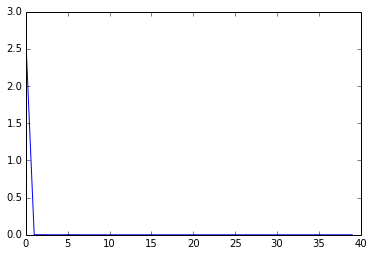

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost_rec[0:20000:500])
plt.show()

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


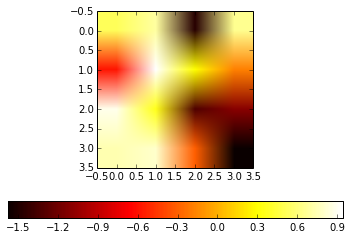

In [27]:
from matplotlib.pyplot import imshow
fig, ax = plt.subplots()
im = ax.imshow(Wmodel[0]['W'] ,cmap='hot')
plt.colorbar(im, orientation='horizontal')
plt.show()


DataXy_ = np.loadtxt(open("iris_prep.txt", "rb"), delimiter=",", skiprows=1)
print DataXy_.shape
rand_idx = np.random.permutation(149)
DataXy =  DataXy_[rand_idx,:]
print DataXy[0:4,:]
num_train = 100
num_test = 49
trainX = DataXy[0:num_train,:-1]
meanX = trainX.mean()
#print trainX
trainX = 0.1*(trainX-meanX) 
trainY = DataXy[0:num_train,-1]
trainY_onehot = np.zeros([num_train,3])
trainY_onehot[np.arange(num_train), trainY.astype(int)] = 1
trainY = trainY_onehot
testX = 0.1*(DataXy[num_train:,:-1]-meanX) 
testY = DataXy[num_train:,-1]
testY_onehot = np.zeros([num_test,3])
testY_onehot[np.arange(num_test), testY.astype(int)] = 1
testY = testY_onehot
#print trainX

model_hyper2 = {}
model_hyper2['num_classes'] = 3
model_hyper2['input_dim']=4
model_hyper2['num_hidden_layers']=3
model_hyper2['learnrate']=0.0001
layer_size = [None] * model_hyper2['num_hidden_layers']
layer_size[0] = 5
layer_size[1] = 4
layer_size[2] = 5
#layer_size[3] = 6
model_hyper2['layer_sizes'] = layer_size    

batch_size =1
num_train_batch = num_train/batch_size
num_rec = num_train
cost_rec = np.zeros(num_rec,dtype=np.float)
iris_nn = NeuralNet_Piano(model_hyper2)
#iris_nn.reset_cache()
for i in range(50000):
    th_batch = i%num_train_batch
    Xbatch = trainX[th_batch*batch_size:th_batch*batch_size+batch_size,:]
    #print Xbatch
    Ybatch = trainY[th_batch*batch_size:th_batch*batch_size+batch_size].astype(int)  
    #print Ybatch
    loss_iris,dz_iris = iris_nn.forward_train(Xbatch,Ybatch)
    if i < num_rec:
        cost_rec[i] = loss_iris
    print loss_iris
    iris_nn.backward_train(dz_iris)
    #iris_nn.check_grad_numgrad(Xbatch,Ybatch,0.0001,True)
    iris_nn.Apply_UpdateW()

import matplotlib.pyplot as plt
plt.plot(cost_rec[0:100])
plt.show()

In [28]:
print sigmoid_forward(1)*3

2.19317573589
